In [1]:
import mysql.connector
import pandas as pd
conn = mysql.connector.connect(
    host="database-1.cd2is2gsweff.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="admin",
    password="kim82458529",
    database="amr_base"
)
cursor = conn.cursor(buffered=True)
cursor.execute("SELECT * FROM yousinsa")
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(cursor.fetchall(), columns=columns)
cursor.close()
conn.close()
df

ranking                                               link  \
0           0  https://www.musinsa.com/app/goods/1778404?loc=...   
1           1  https://www.musinsa.com/app/goods/3777826?loc=...   
2           2  https://www.musinsa.com/app/goods/3493145?loc=...   
3           3  https://www.musinsa.com/app/goods/2897038?loc=...   
4           4  https://www.musinsa.com/app/goods/2730700?loc=...   
...       ...                                                ...   
5665       85  https://www.musinsa.com/app/goods/320924?loc=g...   
5666       86  https://www.musinsa.com/app/goods/392776?loc=g...   
5667       87  https://www.musinsa.com/app/goods/426885?loc=g...   
5668       88  https://www.musinsa.com/app/goods/451852?loc=g...   
5669       89  https://www.musinsa.com/app/goods/451853?loc=g...   

                                                   name            brand  \
0                          2WAY 스웻 후드 집업 (MELANGE GREY)           toffee   
1               LONELY/LOVELY WASHED HOODIE ZIP-UP_GRAY           nohant   
2     [SET] Very Beloa Hood Zip-up & Very Beloa Pant...             avan   
3                            폴라베어 와펜 후드집업 (JM5TZU764IV)             jeep   
4                             [SET] 크롭후디 OR 하프집업 셋업_멜란지  partimentowomen   
...                                                 ...              ...   
5665                                    소가죽 첼시부츠 로빈 브라운          daytrip   
5666             4.7cm 카스타솔 미니멀 지퍼 앵클부츠 3335 [BLACK FG]   firenzeatelier   
5667       [비브람] 군용워커 모티브 풀그레인 지퍼디테일 워커 9300 [BLACK FG]   firenzeatelier   
5668                    여성 팀버랜드 6인치 프리미엄 부츠 / 10361-713       timberland   
5669               남성 팀버랜드 6인치 프리미엄 부츠 - 블랙 / 10073-001       timberland   

               sex  sale sort  sort1   likes  review  price_member  \
0     ['남성', '여성']    13  아우터  후드 집업  218205   81445         34710   
1           ['여성']     0  아우터  후드 집업      56       0        186120   
2           ['여성']     0  아우터  후드 집업    5040     428         80899   
3           ['남성']     0  아우터  후드 집업    1689      36         69500   
4           ['여성']    25  아우터  후드 집업   17096     905         57874   
...            ...   ...  ...    ...     ...     ...           ...   
5665        ['남성']     0   신발     부츠      16       1         88021   
5666        ['남성']    10   신발     부츠     176      15        164020   
5667        ['남성']     0   신발     부츠     339      10        208826   
5668        ['여성']     0   신발     부츠    6084     414        265052   
5669        ['남성']     0   신발     부츠    1163     187        265052   

      price_nomember                                                tag  \
0              45000  후드, 집업후드, 트레이닝세트, 셋업, 세트, 후드티, 오버핏후드티, 무지, 그레이...   
1             188000              후드집업, 후드\집업, 후드집업추천, 오버핏, 집업후드, 론리러블리   
2             130000                  후드집업, 후드, 집업후드, 스웻셔츠, 후디, 집업, 패키지   
3             139000                                   아울렛, 후드티, 오버핏후드티   
4              86900                스웻셔츠, 오버핏, 맨투맨, 스웨트셔츠, 집업, 후디, 후드집업   
...              ...                                                ...   
5665           89000                                       신발, 워커, 첼시부츠   
5666          205000                  앵글부츠, 블랙, 가죽부츠, 수제화부츠, 지퍼부츠, 앵클부츠   
5667          261000               군용워커, 군화, 레이스업부츠, 블랙, 남자부츠, 수제화, 비브람   
5668          268000  부츠, 6인치, 6인치프리미엄, 팀버랜드우먼, 팀버랜드부츠, 6인치부츠, 시그니처,...   
5669          268000  부츠, 6인치, 6인치프리미엄, 팀버랜드부츠, 팀버랜드워커, 남성부츠, 남성워커, ...   

       number   sold         age like_sex  
0     1778404  99541  19~23,  남성       남성  
1     3777826      0           0        0  
2     3493145   1335  19~23,  여성       여성  
3     2897038    242     18,  여성       여성  
4     2730700   1193  24~28,  여성       여성  
...       ...    ...         ...      ...  
5665   320924      0           0        0  
5666   392776      0           0        0  
5667   426885      0           0        0  
5668   451852    263  19~23,  여성       여성  
5669   451853     73  24~28,  남성       남성  

[5670

# 1. 대분류별 브랜드 선호도

In [2]:

import pandas as pd
from glob import glob
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy as np

In [3]:
yss= df

In [4]:
yss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ranking         5670 non-null   int64 
 1   link            5670 non-null   object
 2   name            5670 non-null   object
 3   brand           5670 non-null   object
 4   sex             5670 non-null   object
 5   sale            5670 non-null   int64 
 6   sort            5670 non-null   object
 7   sort1           5670 non-null   object
 8   likes           5670 non-null   int64 
 9   review          5670 non-null   int64 
 10  price_member    5670 non-null   int64 
 11  price_nomember  5670 non-null   int64 
 12  tag             5670 non-null   object
 13  number          5670 non-null   int64 
 14  sold            5670 non-null   int64 
 15  age             5670 non-null   object
 16  like_sex        5670 non-null   object
dtypes: int64(8), object(9)
memory usage: 753.2+ KB


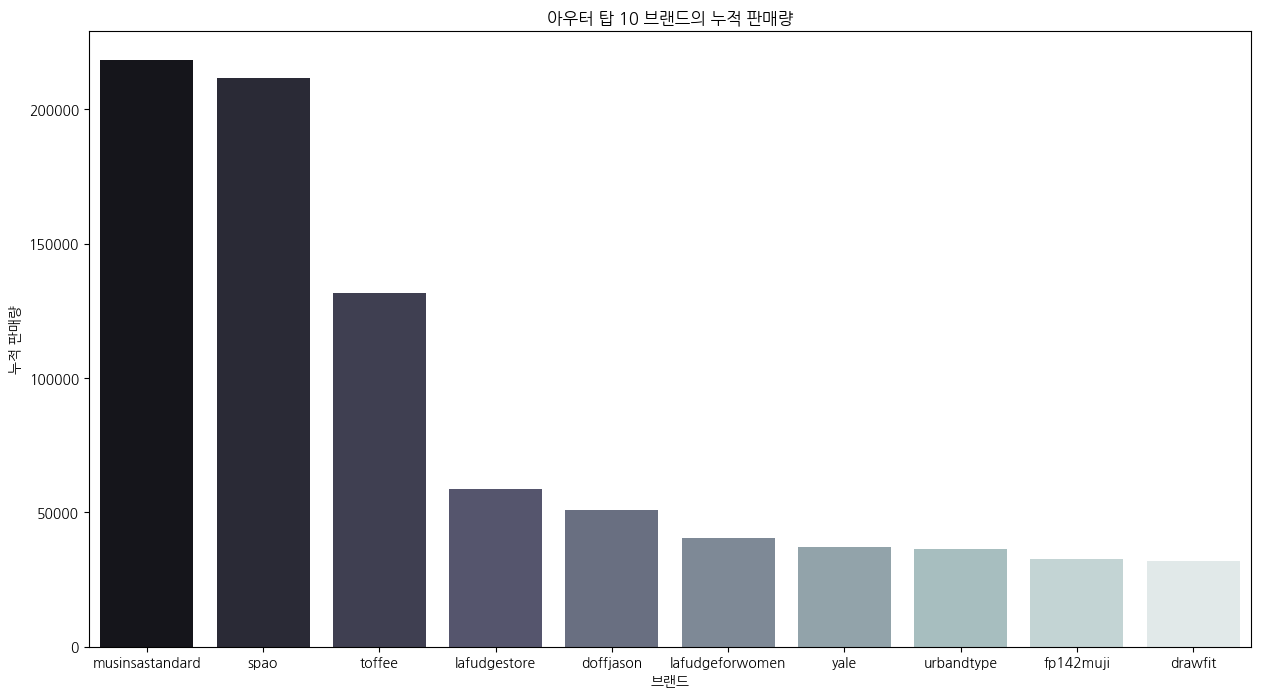

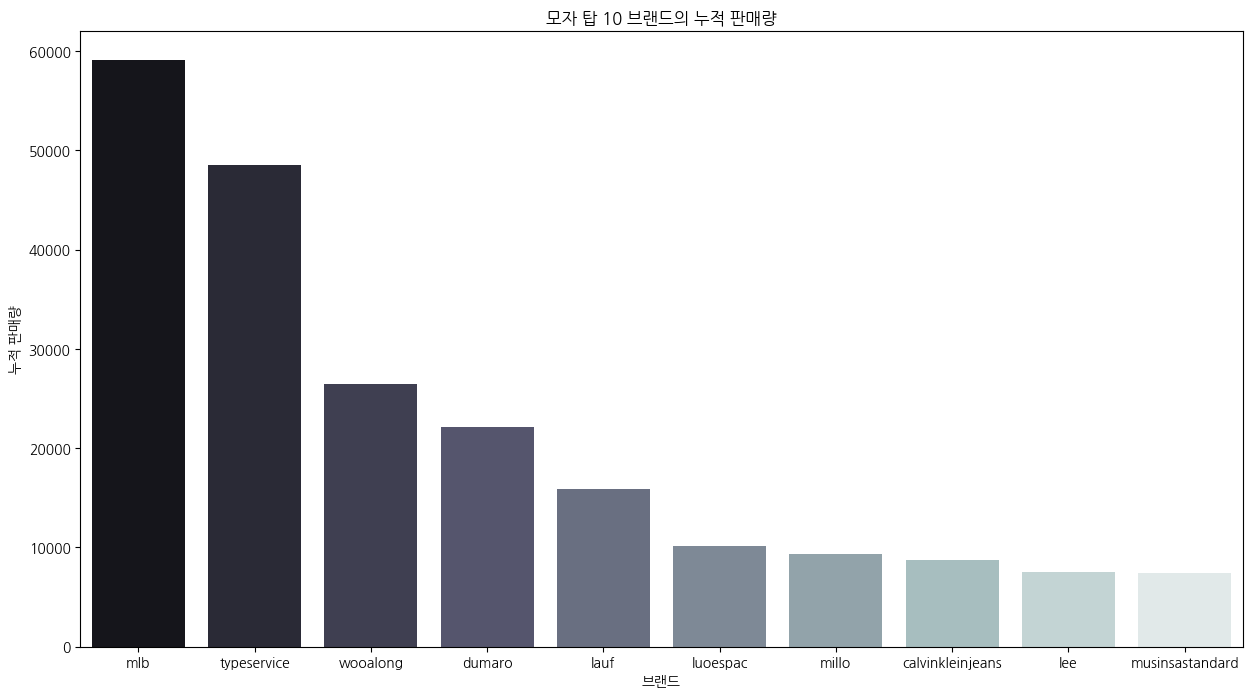

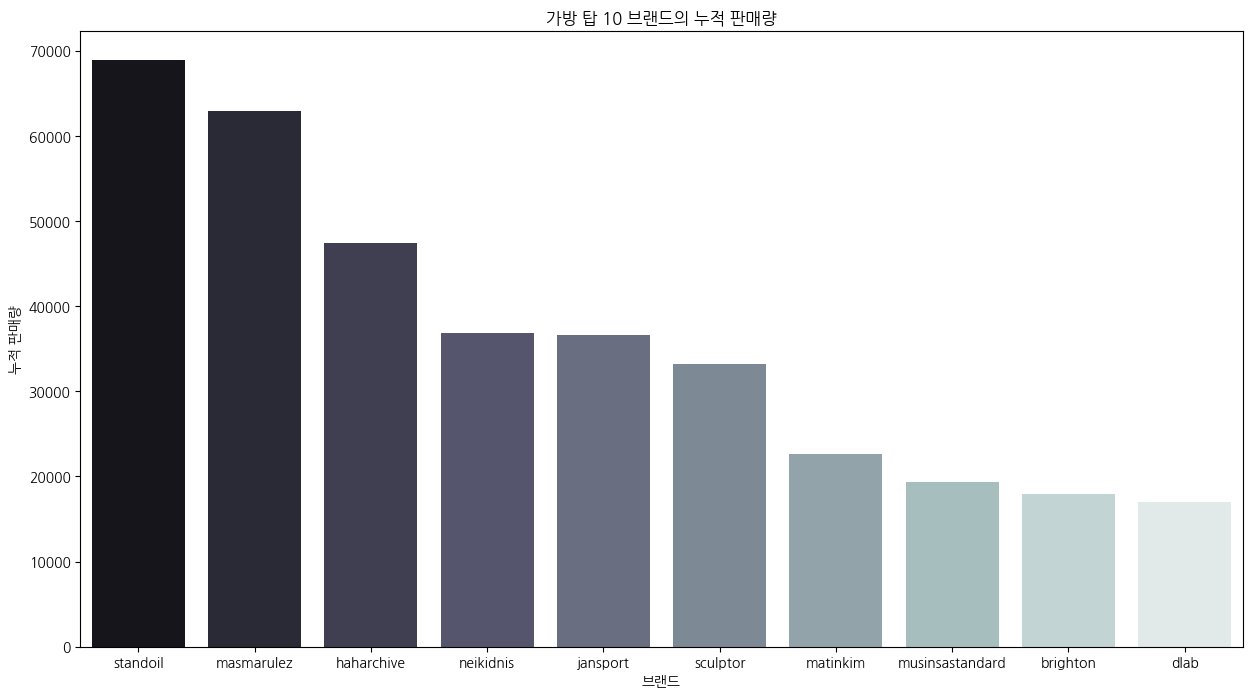

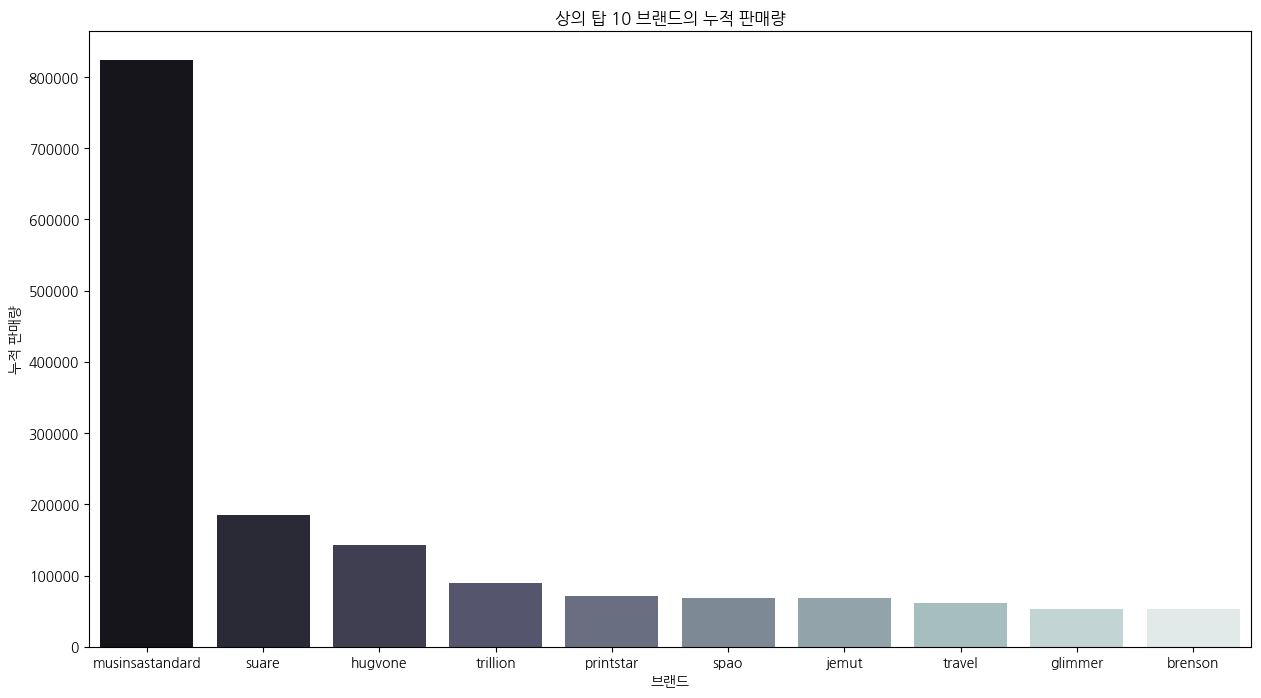

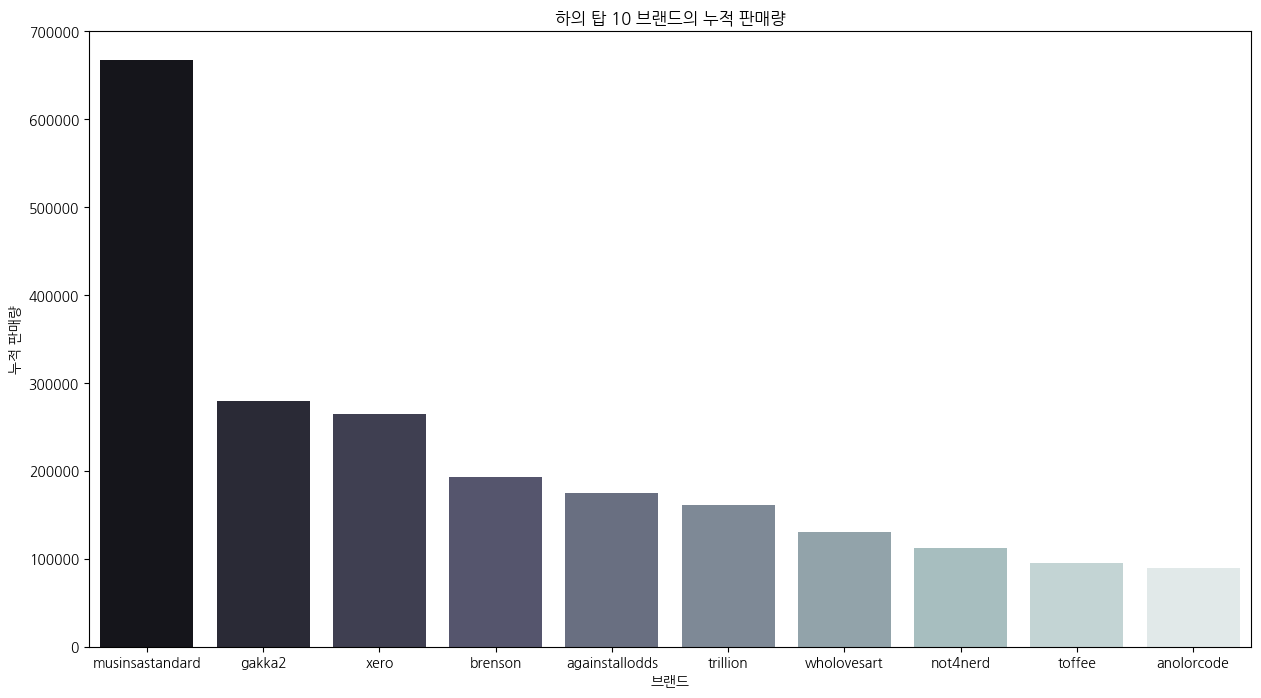

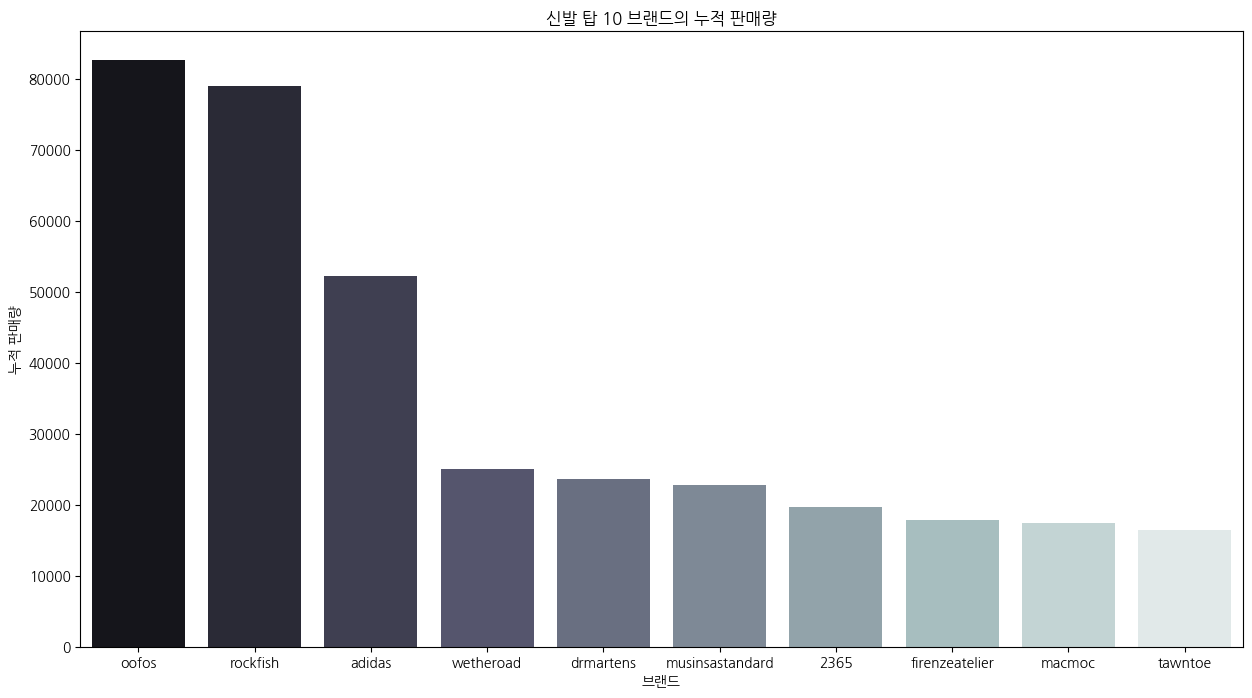

In [5]:
brands = yss['sort'].unique()

for category in brands:
    # 대분류별로 브랜드의 좋아요수 합산
    brand_likes = df[df['sort'] == category].groupby(['brand'])['sold'].sum().reset_index()
    
    # 상위 10개 브랜드 추출
    top_brands_likes = brand_likes.nlargest(10, 'sold')
    
    # 시각화
    plt.figure(figsize=(15, 8))
    sns.barplot(x='brand', y='sold', hue='brand',data=top_brands_likes, palette='bone')
    plt.title(f'{category} 탑 10 브랜드의 누적 판매량')
    plt.xlabel('브랜드')
    plt.ylabel('누적 판매량')
    plt.show()

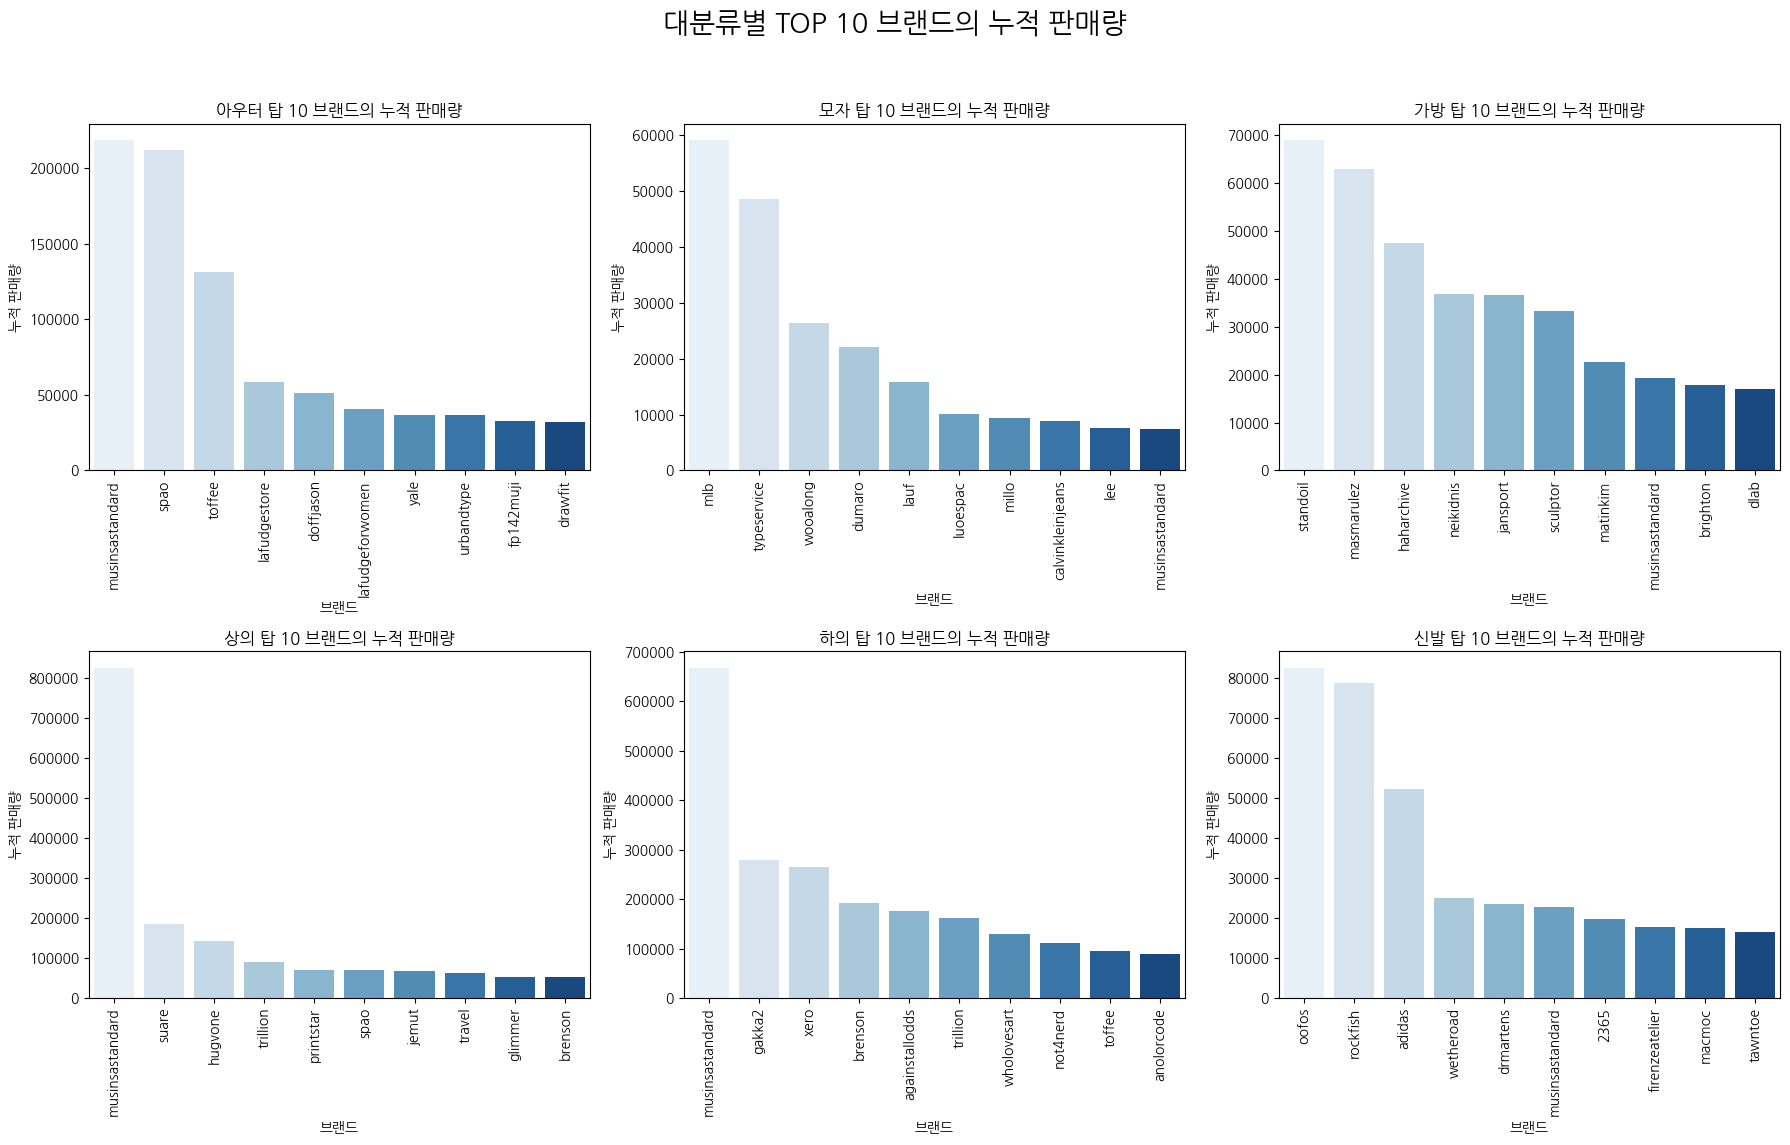

In [6]:
from matplotlib import font_manager, rc
font_path = "/home/addinedu/Downloads/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
brands = yss['sort'].unique()

# 2x3의 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('대분류별 TOP 10 브랜드의 누적 판매량', fontsize=20)
plt.style.use(['seaborn-v0_8'])
# axes를 1차원 배열로 펼침
axes = axes.flatten()

for i, category in enumerate(brands):
    # 대분류별로 브랜드의 좋아요수 합산
    brand_likes = df[df['sort'] == category].groupby(['brand'])['sold'].sum().reset_index()
    
    # 상위 10개 브랜드 추출
    top_brands_likes = brand_likes.nlargest(10, 'sold')
    
    # 시각화
    sns.barplot(x='brand', y='sold', hue='brand', data=top_brands_likes, palette='Blues', ax=axes[i])
    axes[i].set_title(f'{category} 탑 10 브랜드의 누적 판매량')
    axes[i].set_xlabel('브랜드')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel('누적 판매량')
    #axes[i].legend([])

# 나머지 서브플롯은 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목과 서브플롯 간의 간격 조절
plt.show()

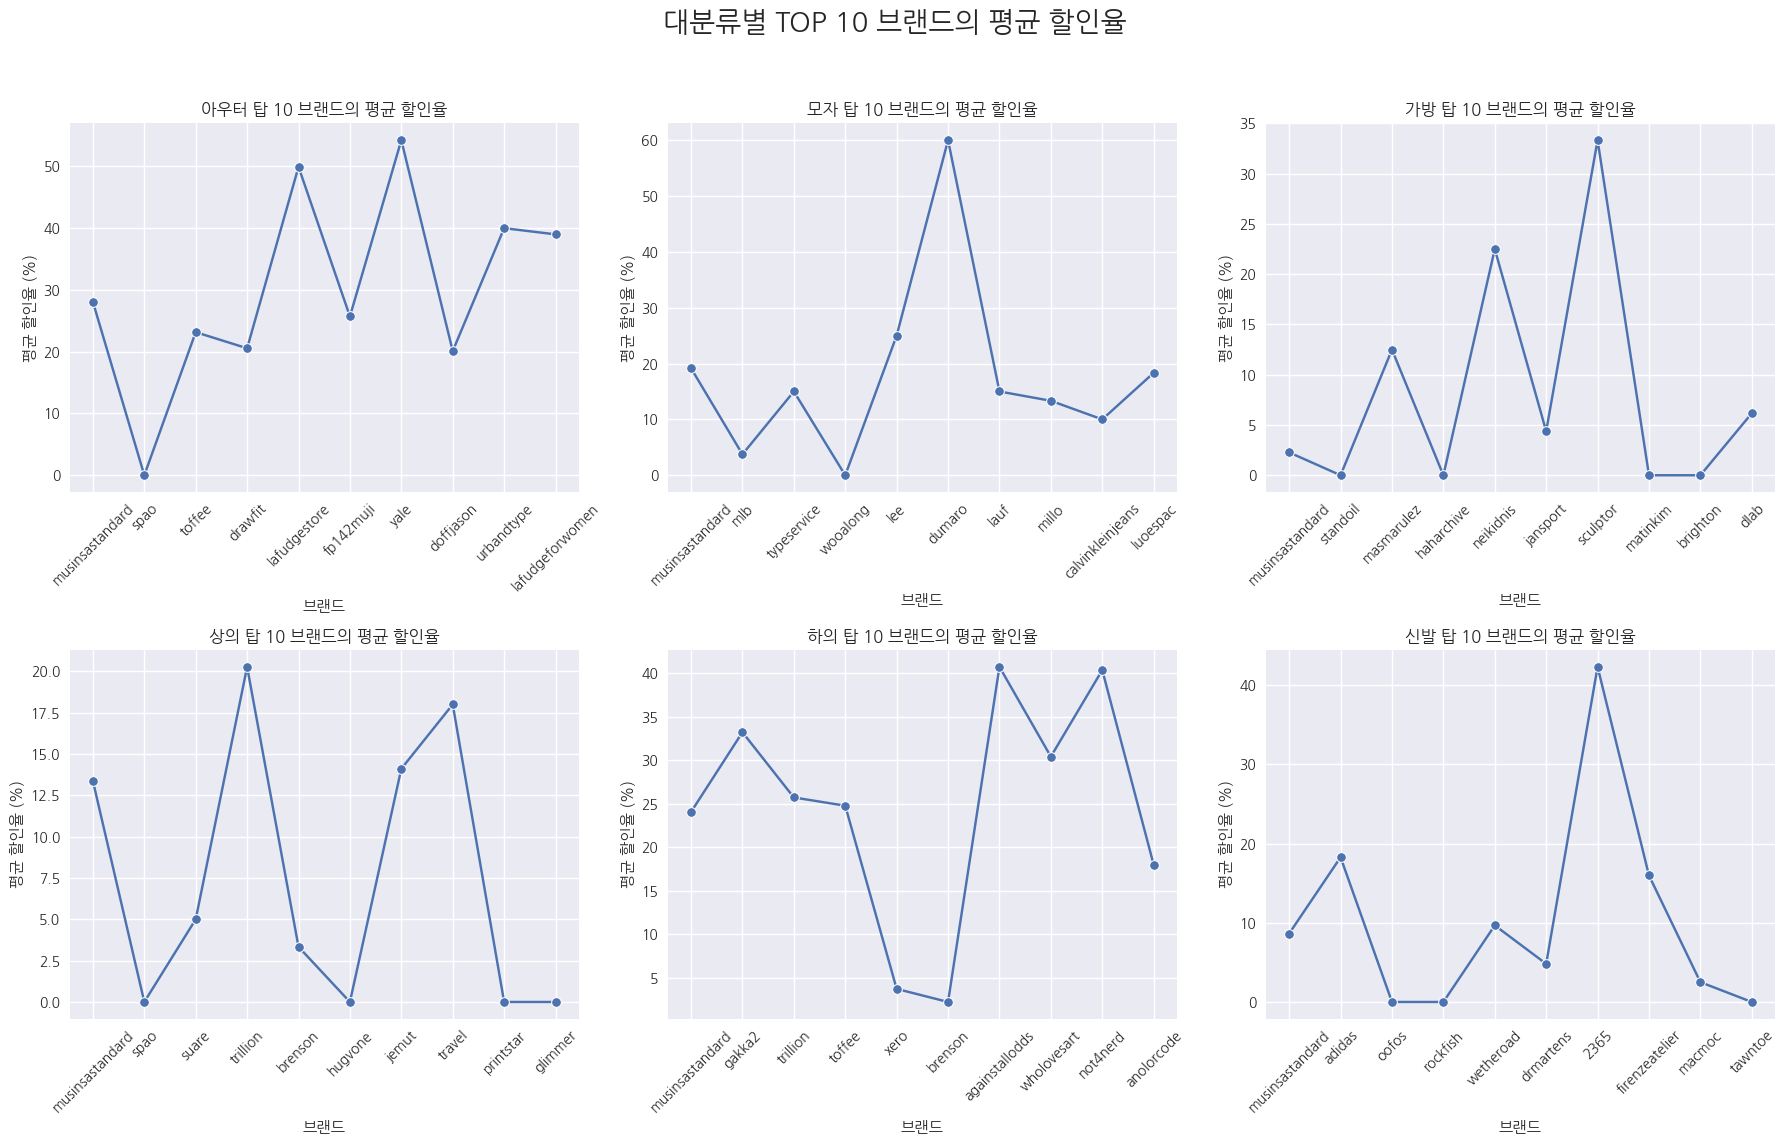

In [7]:
from matplotlib import font_manager, rc
font_path = "/home/addinedu/Downloads/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

# 2x3의 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('대분류별 TOP 10 브랜드의 평균 할인율', fontsize=20)
plt.style.use(['seaborn-v0_8'])
# axes를 1차원 배열로 펼침
axes = axes.flatten()

for i, category in enumerate(brands):
    # 대분류별로 브랜드의 평균 할인율 및 판매량 계산
    brand_data = df[df['sort'] == category]
    top_brands_sold = brand_data.groupby('brand')['sold'].sum().nlargest(10).index
    top_brands_data = brand_data[brand_data['brand'].isin(top_brands_sold)]
    average_discounts = top_brands_data.groupby('brand')['sale'].mean().reset_index()
    
    # Sort brands based on total sold values across all sorts
    total_sold_by_brand = df.groupby('brand')['sold'].sum()
    average_discounts['total_sold'] = average_discounts['brand'].map(total_sold_by_brand)
    average_discounts = average_discounts.sort_values(by='total_sold', ascending=False).drop('total_sold', axis=1)
    
    # 시각화 (line plot for average discount rates)
    sns.lineplot(x='brand', y='sale', marker='o', data=average_discounts, ax=axes[i])
    axes[i].set_title(f'{category} 탑 10 브랜드의 평균 할인율')
    axes[i].set_xlabel('브랜드')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('평균 할인율 (%)')

# 나머지 서브플롯은 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목과 서브플롯 간의 간격 조절
plt.show()


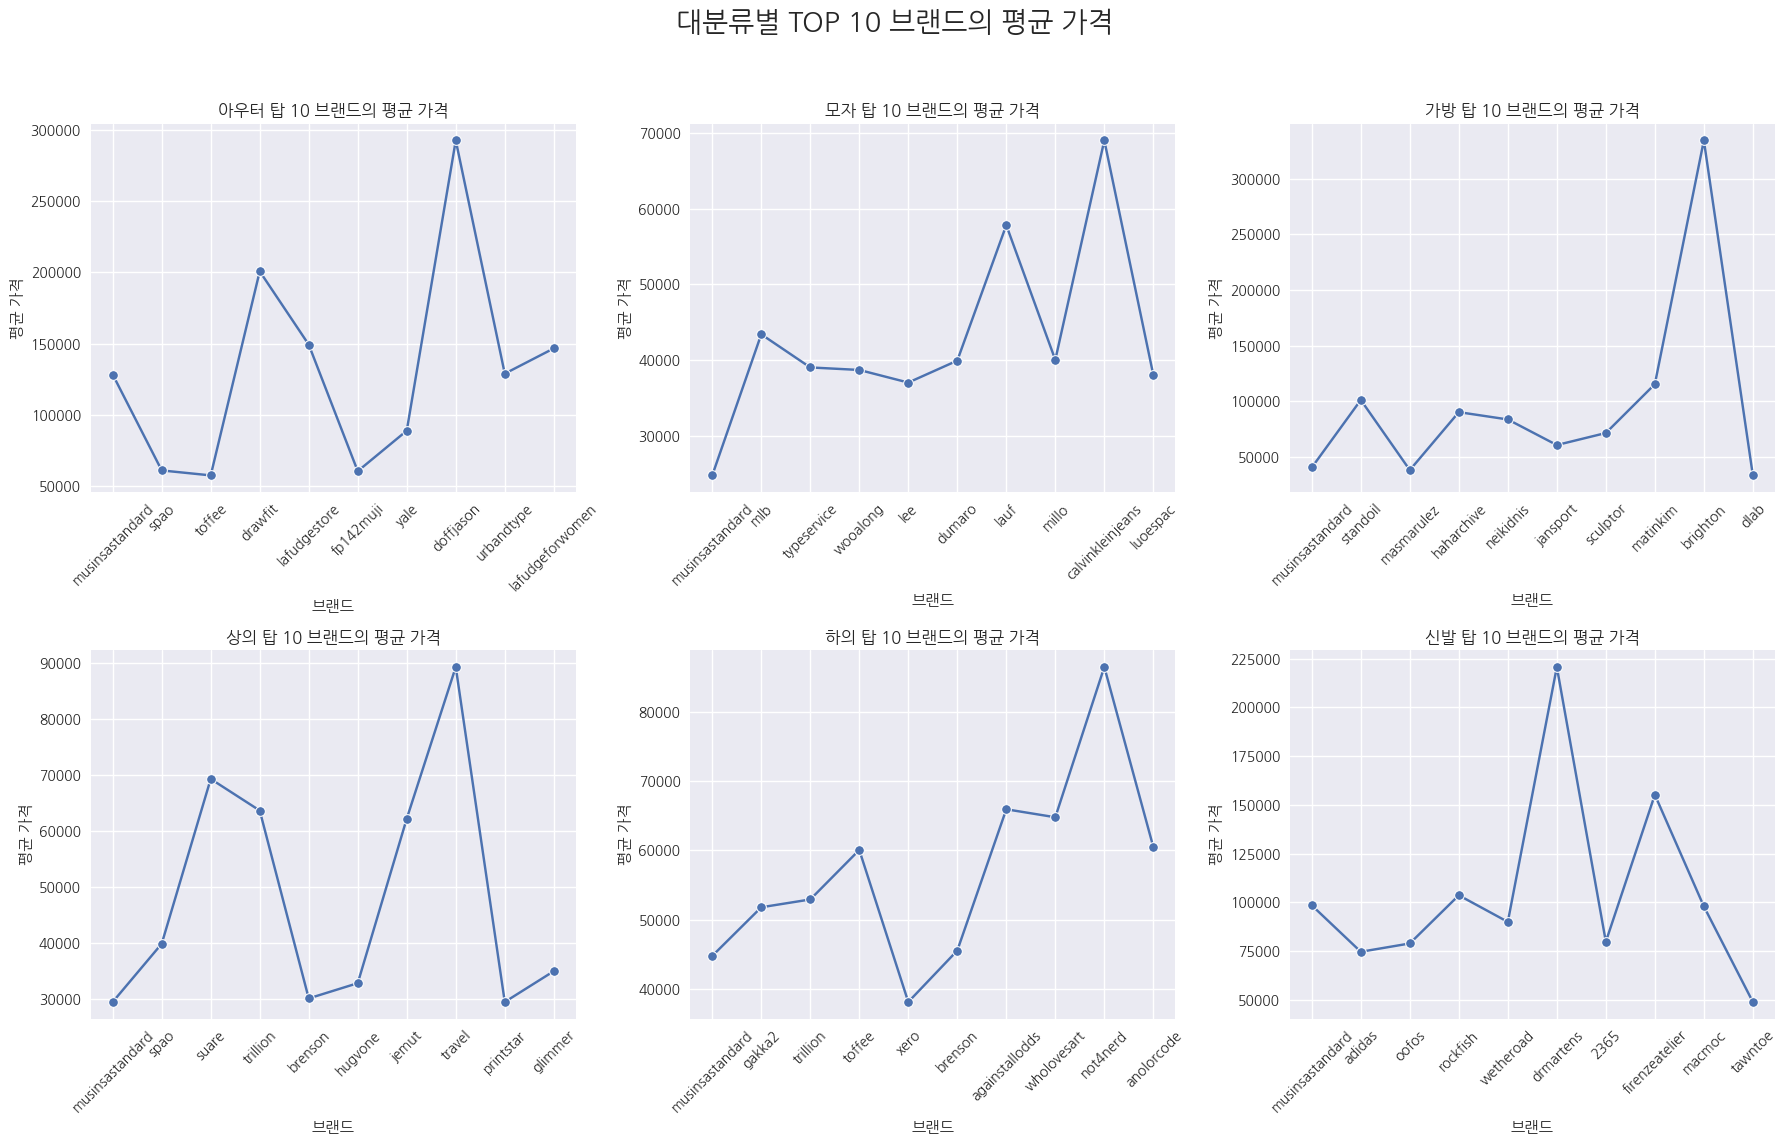

In [8]:
from matplotlib import font_manager, rc
font_path = "/home/addinedu/Downloads/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
# 2x3의 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('대분류별 TOP 10 브랜드의 평균 가격', fontsize=20)
plt.style.use(['seaborn-v0_8'])
# axes를 1차원 배열로 펼침
axes = axes.flatten()

for i, category in enumerate(brands):
    # 대분류별로 브랜드의 평균 가격 및 판매량 계산
    brand_data = df[df['sort'] == category]
    top_brands_sold = brand_data.groupby('brand')['sold'].sum().nlargest(10).index
    top_brands_data = brand_data[brand_data['brand'].isin(top_brands_sold)]
    average_prices = top_brands_data.groupby('brand')['price_nomember'].mean().reset_index()
    
    # Sort brands based on total sold values across all sorts
    total_sold_by_brand = df.groupby('brand')['sold'].sum()
    average_prices['total_sold'] = average_prices['brand'].map(total_sold_by_brand)
    average_prices = average_prices.sort_values(by='total_sold', ascending=False).drop('total_sold', axis=1)
    
    # 시각화 (line plot for average prices)
    sns.lineplot(x='brand', y='price_nomember', marker='o', data=average_prices, ax=axes[i])
    axes[i].set_title(f'{category} 탑 10 브랜드의 평균 가격')
    axes[i].set_xlabel('브랜드')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('평균 가격')

# 나머지 서브플롯은 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목과 서브플롯 간의 간격 조절
plt.show()


In [32]:
yss =df

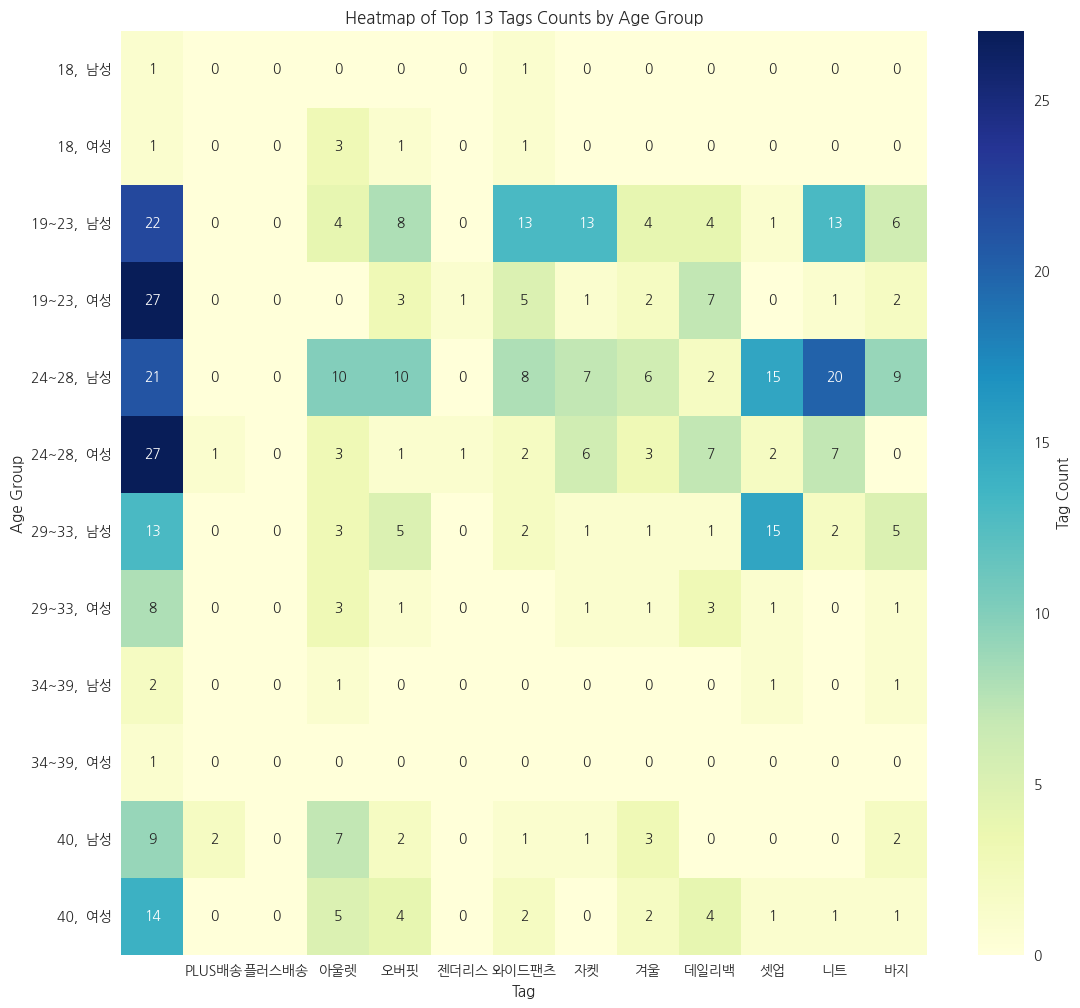

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# 'no data' 및 0 값을 가진 행 제외
filtered_df = yss[(yss['tag'] != 'no data') & (yss['age'] != '0')].copy()

# 'sort'에 포함된 6가지 값을 태그에서 제외
for category in filtered_df['sort'].unique():
    filtered_df['tag'] = filtered_df['tag'].apply(lambda x: x.replace(category, '').strip())

# 태그를 분리하여 새로운 열 생성
filtered_df['tags_split'] = filtered_df['tag'].str.replace("[\[\]']", "").str.split(',')

# 태그 리스트를 flatten하여 모든 태그 추출
all_tags = [tag.strip() for tags in filtered_df['tags_split'] for tag in tags]

# 태그 빈도 계산
tags_counter = Counter(all_tags)

# 상위 13개 태그 추출
top_tags = dict(tags_counter.most_common(13))

# 새로운 데이터프레임 생성
tag_df = pd.DataFrame()

# 태그별로 해당되는 행에 1 표시
for tag in top_tags.keys():
    tag_df[tag] = filtered_df['tags_split'].apply(lambda x: 1 if tag in x else 0)

# 연령별 태그 빈도 데이터 생성
age_tag_counts = pd.concat([filtered_df['age'], tag_df], axis=1)

# 히트맵 생성
plt.figure(figsize=(13, 12))
sns.heatmap(age_tag_counts.groupby('age').sum(), cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Tag Count'})
plt.title('Heatmap of Top 13 Tags Counts by Age Group')
plt.xlabel('Tag')
plt.ylabel('Age Group')
plt.show()


/tmp/ipykernel_62428/16652842.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_62428/16652842.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_62428/16652842.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_62428/16652842.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_62428/16652842.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated a

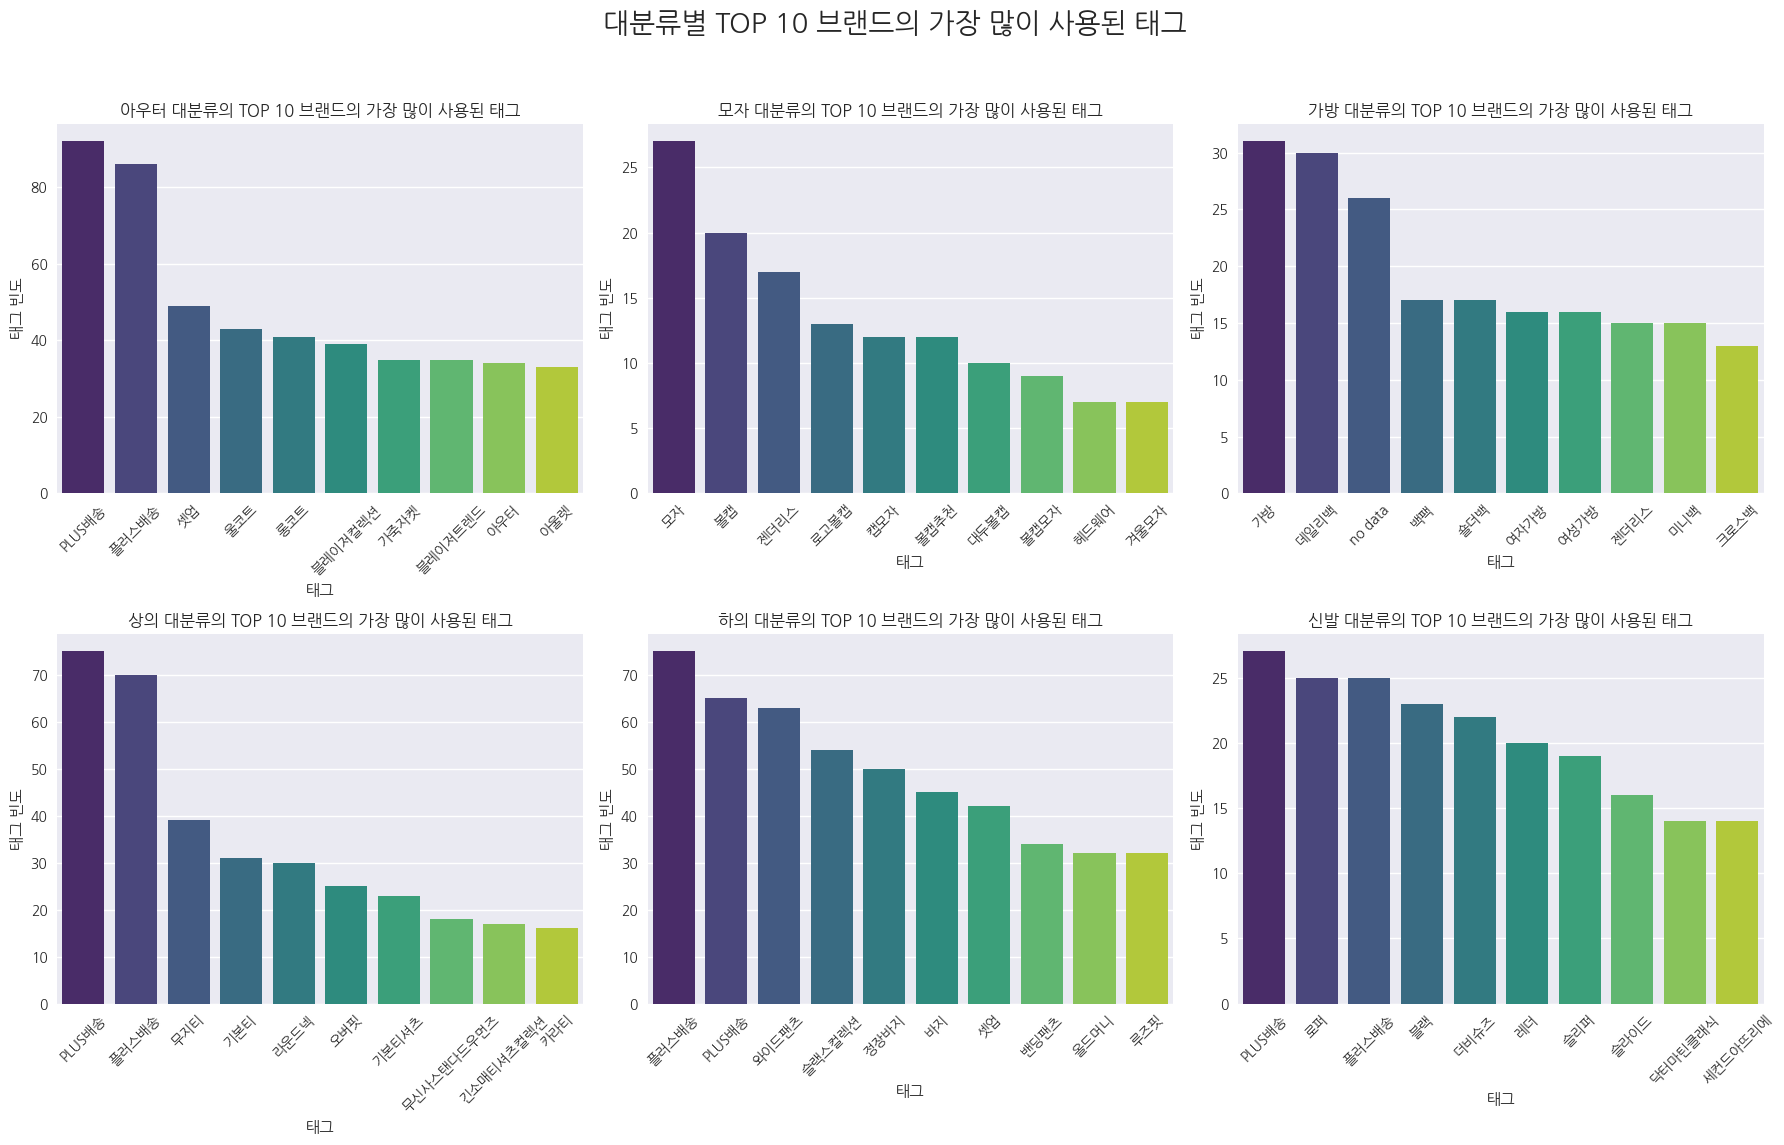

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# 대분류별 Top 10 브랜드 찾기
brands = yss['sort'].unique()
top_brands_by_category = {}

for category in brands:
    brand_likes = yss[yss['sort'] == category].groupby(['brand'])['sold'].sum().reset_index()
    top_brands = brand_likes.nlargest(10, 'sold')['brand'].tolist()
    top_brands_by_category[category] = top_brands

# 대분류별 Top 10 브랜드들의 태그 통합
top_tags_by_category = {}

for category, top_brands in top_brands_by_category.items():
    category_df = yss[(yss['sort'] == category) & (yss['brand'].isin(top_brands))]
    tags = category_df['tag'].str.replace("[\[\]']", "").str.split(',').explode().apply(lambda x: x.strip())
    top_tags_by_category[category] = tags

# 대분류별 Top 10 브랜드들의 가장 많이 사용된 태그 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('대분류별 TOP 10 브랜드의 가장 많이 사용된 태그', fontsize=20)

# axes를 1차원 배열로 펼침
axes = axes.flatten()

for i, (category, top_tags) in enumerate(top_tags_by_category.items()):
    tags_counter = Counter(top_tags)
    top_tags_dict = dict(tags_counter.most_common(10))

    # 시각화
    sns.barplot(x=list(top_tags_dict.keys()), y=list(top_tags_dict.values()), palette='viridis', ax=axes[i])
    axes[i].set_title(f'{category} 대분류의 TOP 10 브랜드의 가장 많이 사용된 태그')
    axes[i].set_xlabel('태그')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('태그 빈도')

# 나머지 서브플롯은 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목과 서브플롯 간의 간격 조절
plt.show()


Age Group: 0


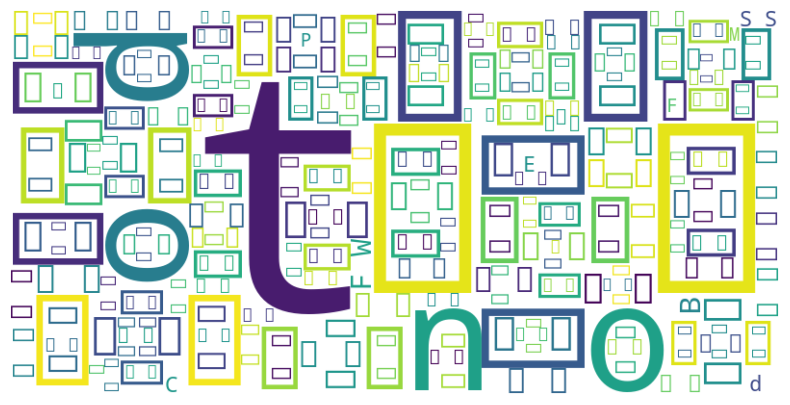

Age Group: 18,  남성


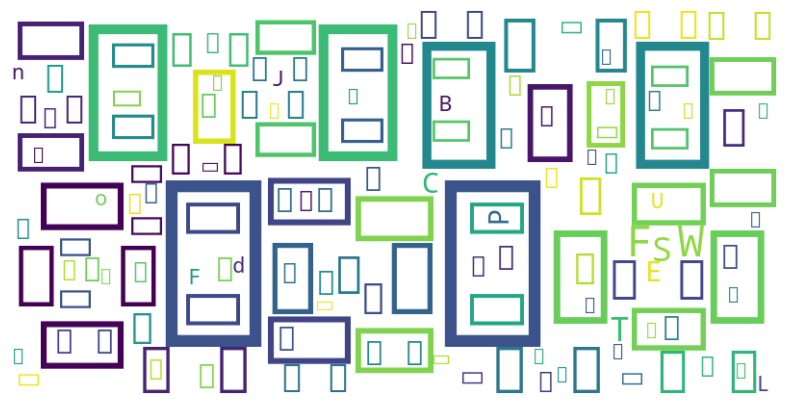

Age Group: 18,  여성


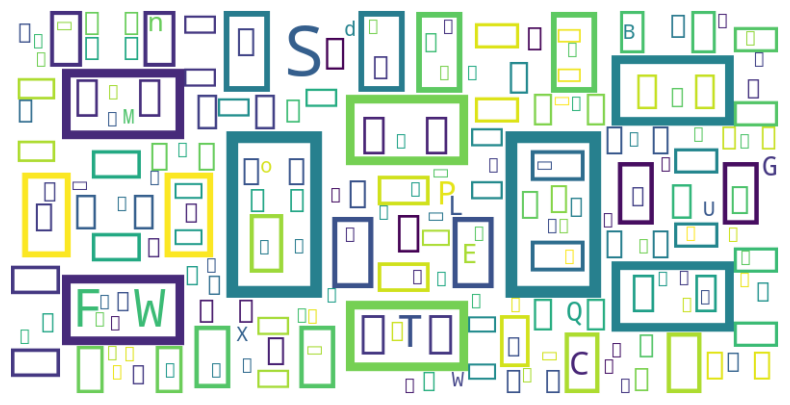

Age Group: 19~23,  남성


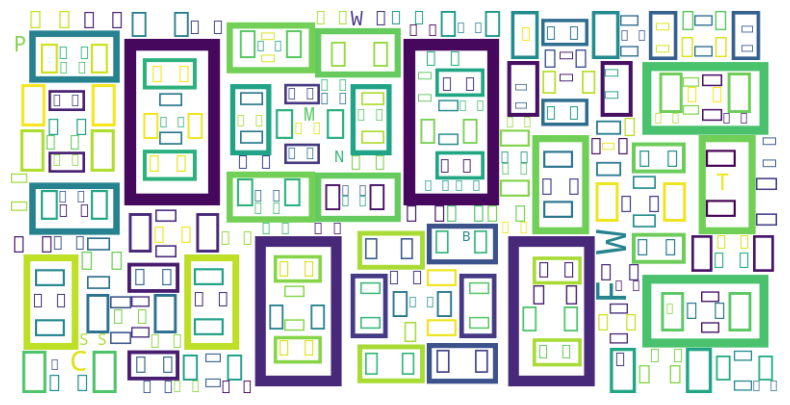

Age Group: 19~23,  여성


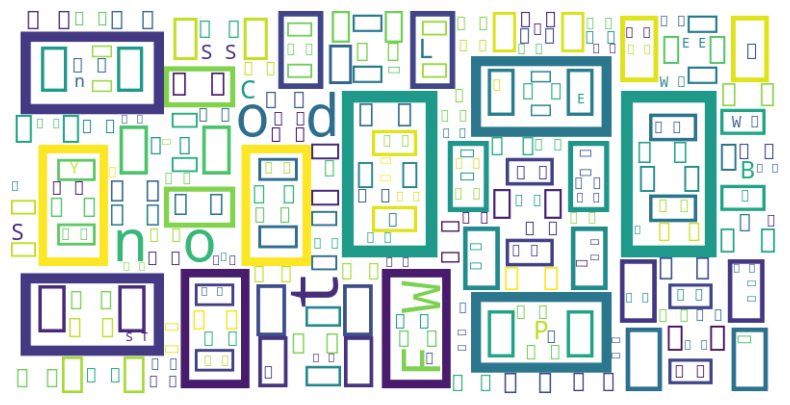

Age Group: 24~28,  남성


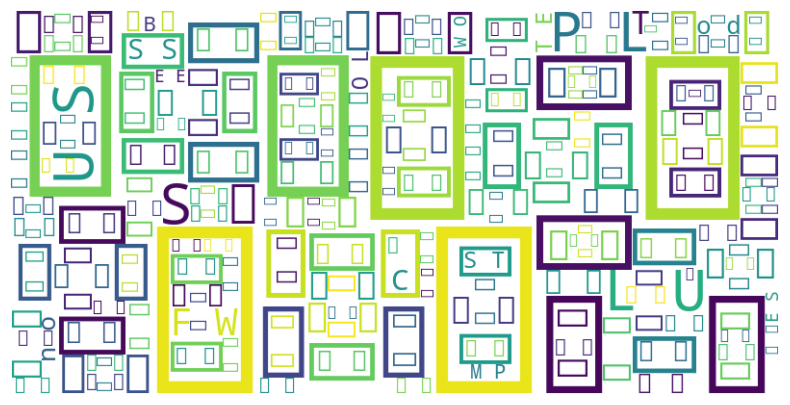

Age Group: 24~28,  여성


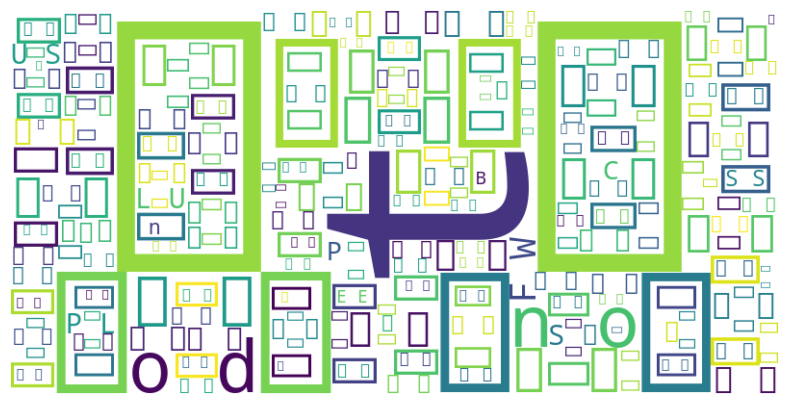

Age Group: 29~33,  남성


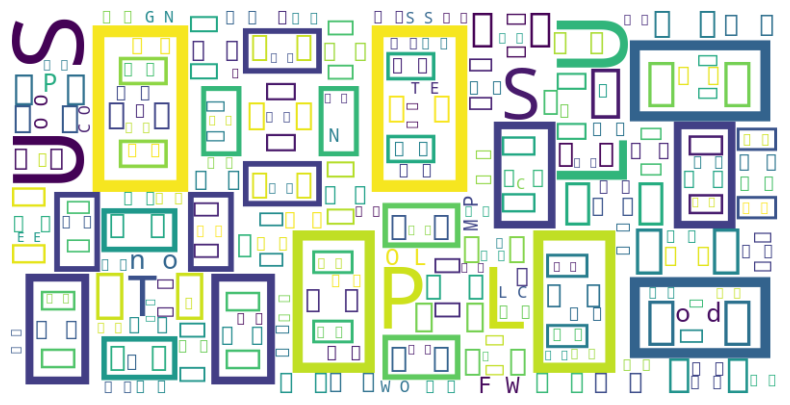

Age Group: 29~33,  여성


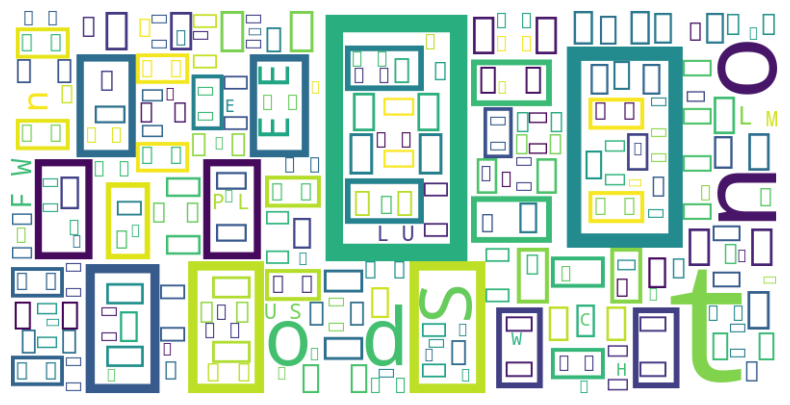

Age Group: 34~39,  남성


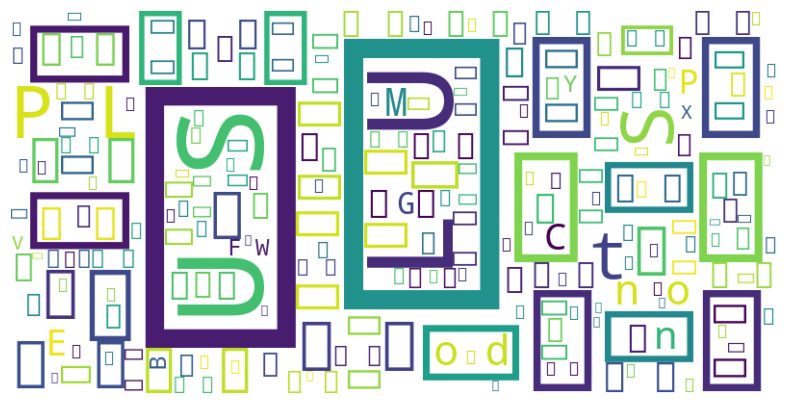

Age Group: 34~39,  여성


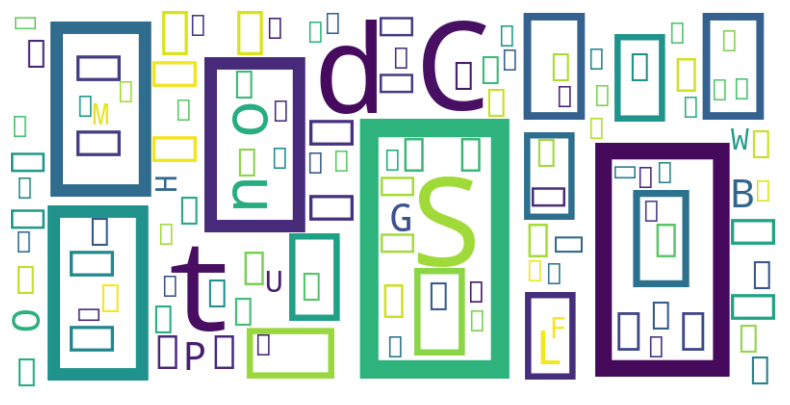

Age Group: 40,  남성


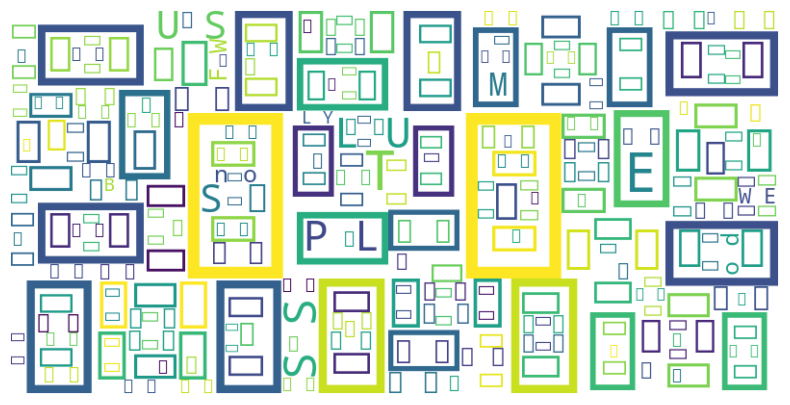

Age Group: 40,  여성


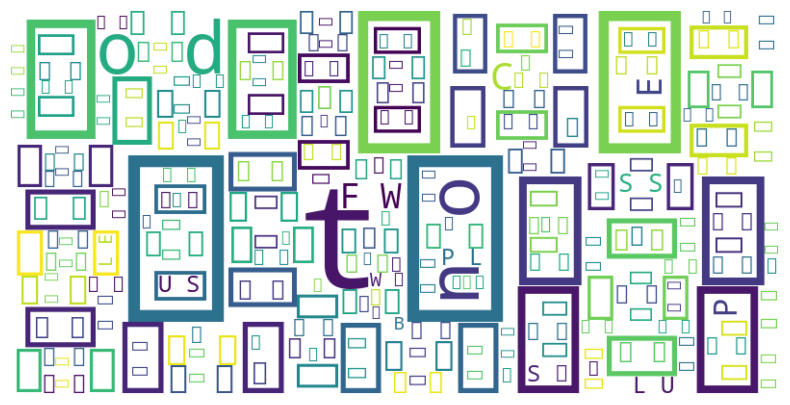

Gender: ['남성', '여성']


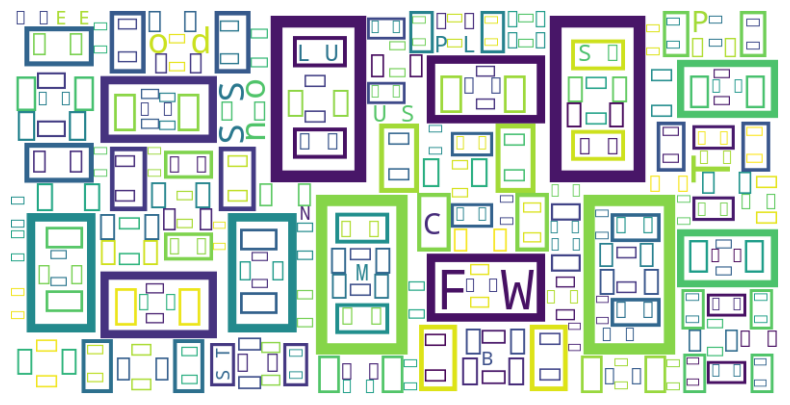

Gender: ['남성']


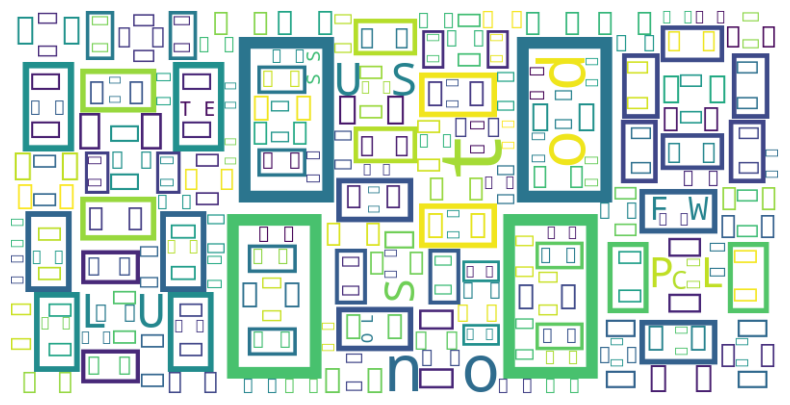

Gender: ['라이프']


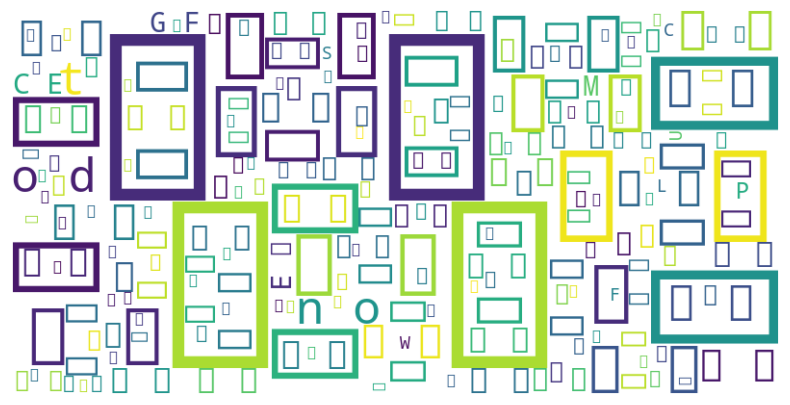

Gender: ['여성']


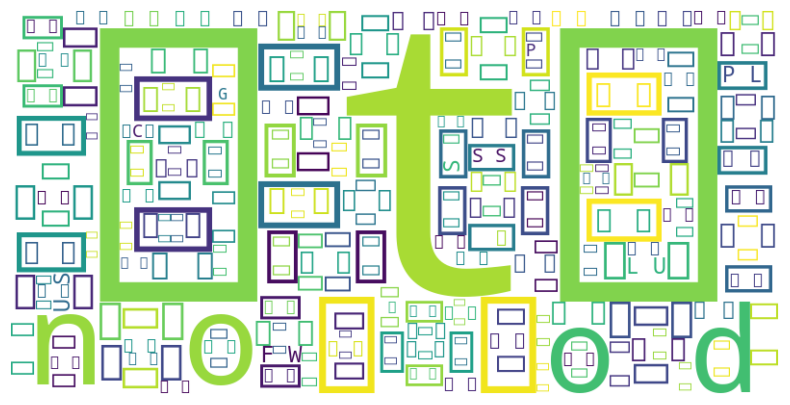

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 연령별 태그 빈도 데이터 생성 (예시)
age_tag_counts = df.groupby('age')['tag'].apply(lambda x: ','.join(x)).reset_index()
age_tag_counts['tag'] = age_tag_counts['tag'].str.split(',')
age_tag_counts['tag'] = age_tag_counts['tag'].apply(lambda x: [item.strip() for sublist in x for item in sublist])

# 성별 태그 빈도 데이터 생성 (예시)
gender_tag_counts = df.groupby('sex')['tag'].apply(lambda x: ','.join(x)).reset_index()
gender_tag_counts['tag'] = gender_tag_counts['tag'].str.split(',')
gender_tag_counts['tag'] = gender_tag_counts['tag'].apply(lambda x: [item.strip() for sublist in x for item in sublist])

# 워드 클라우드 예시
from wordcloud import WordCloud

def generate_wordcloud(tags):
    tag_text = ' '.join(tags)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tag_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 연령별 워드 클라우드
for index, row in age_tag_counts.iterrows():
    print(f'Age Group: {row["age"]}')
    generate_wordcloud(row['tag'])

# 성별 워드 클라우드
for index, row in gender_tag_counts.iterrows():
    print(f'Gender: {row["sex"]}')
    generate_wordcloud(row['tag'])


In [10]:
# Import necessary libraries
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font path
font_path = "/home/addinedu/Downloads/NanumGothic.ttf"

# Specify the font properties
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Rest of your code...
# (Copy and paste your existing code here)

# Show the plot
plt.show()

# 대분류별 TOP 인기 브랜드 상품들의 태그 워드클라우드

/tmp/ipykernel_62428/112783378.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['tag'] = category_df['tag'].apply(lambda x: x.replace(category, '').strip())


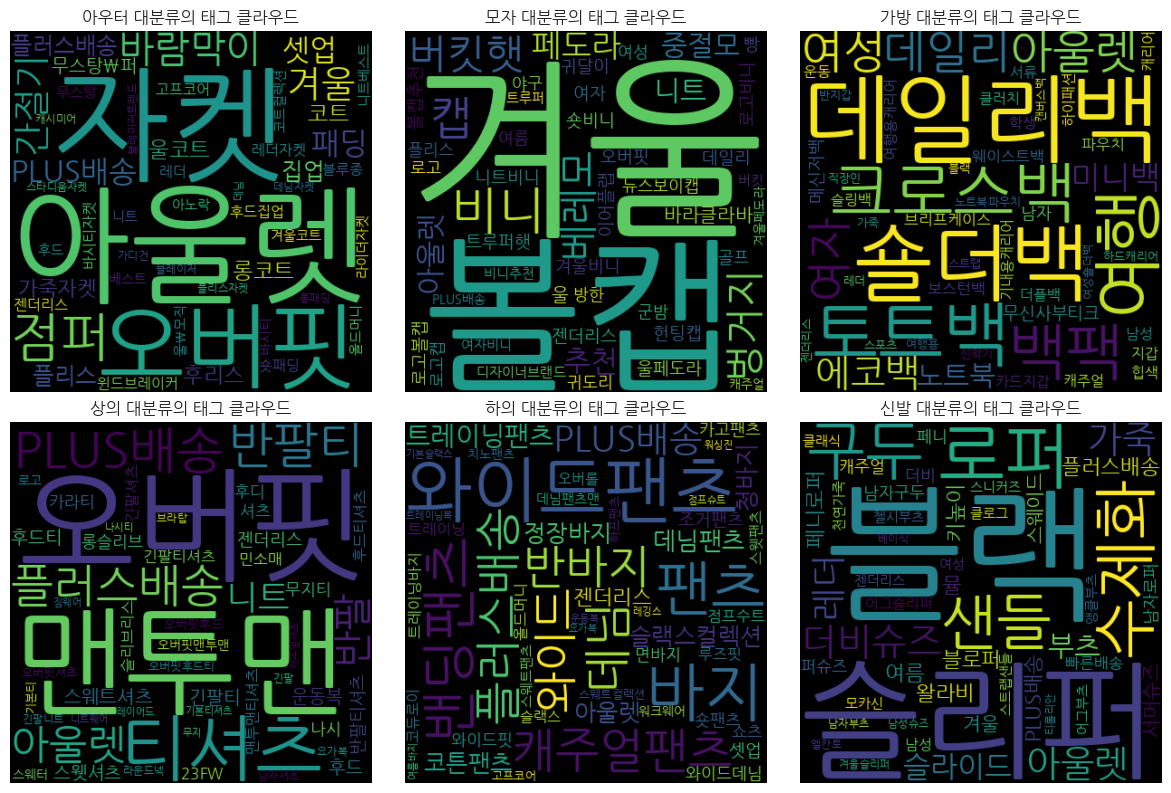

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np

filtered_df = yss[(yss['tag'] != '[]') & (yss['tag'] != f"[{yss['sort']}]")].copy()

filtered_df['tag'] = filtered_df['tag'].replace("[", "").replace("]", "").replace("'", "")
categories = filtered_df['sort'].unique()
images = ["/home/addinedu/outer.png", "/home/addinedu/hat.png", "/home/addinedu/bag.png", "/home/addinedu/top.png","/home/addinedu/pants.png","/home/addinedu/shoes.png"]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for idx, category in enumerate(categories):
    mask_image = np.array(Image.open(images[idx]))

    category_df = filtered_df[filtered_df['sort'] == category]

    category_df['tag'] = category_df['tag'].apply(lambda x: x.replace(category, '').strip())
    category_df = category_df[category_df['tag'] != 'no data']

    tags_counter = Counter(category_df['tag'].str.split(',').explode().apply(lambda x: x.strip()))
    top_tags = dict(tags_counter.most_common(50))

    wordcloud = WordCloud(width=400, height=400, background_color='black', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(top_tags)

    row_idx, col_idx = divmod(idx, 3)
    ax = axes[row_idx, col_idx]

    # 시각화
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'{category} 대분류의 태그 클라우드')
    ax.axis('off')

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [12]:
yss=df

# 대분류별 TOp 10 인기 브랜드

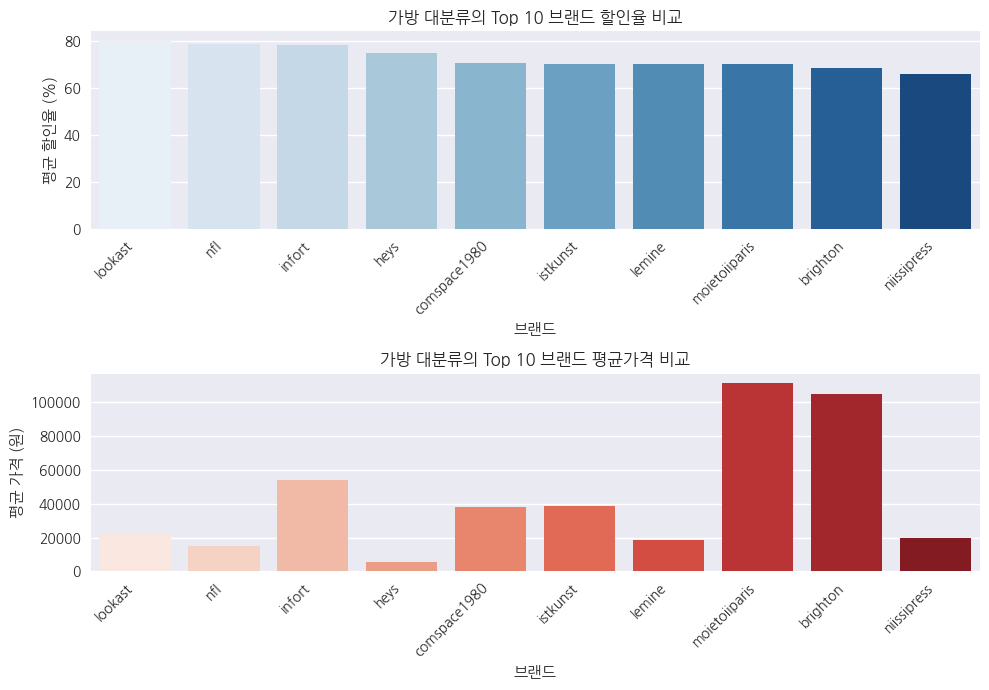

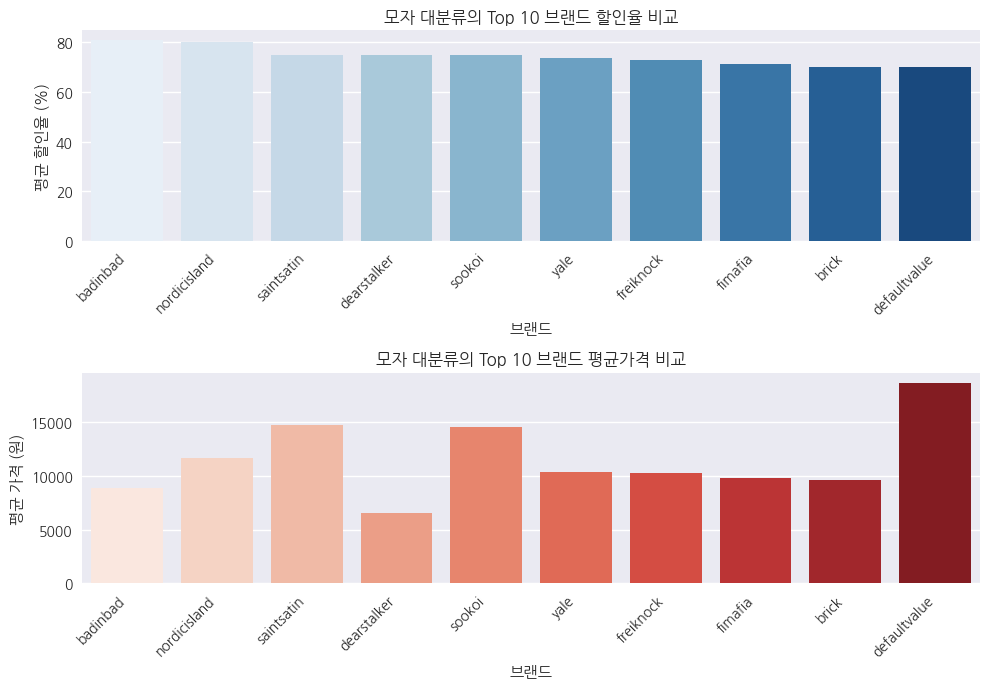

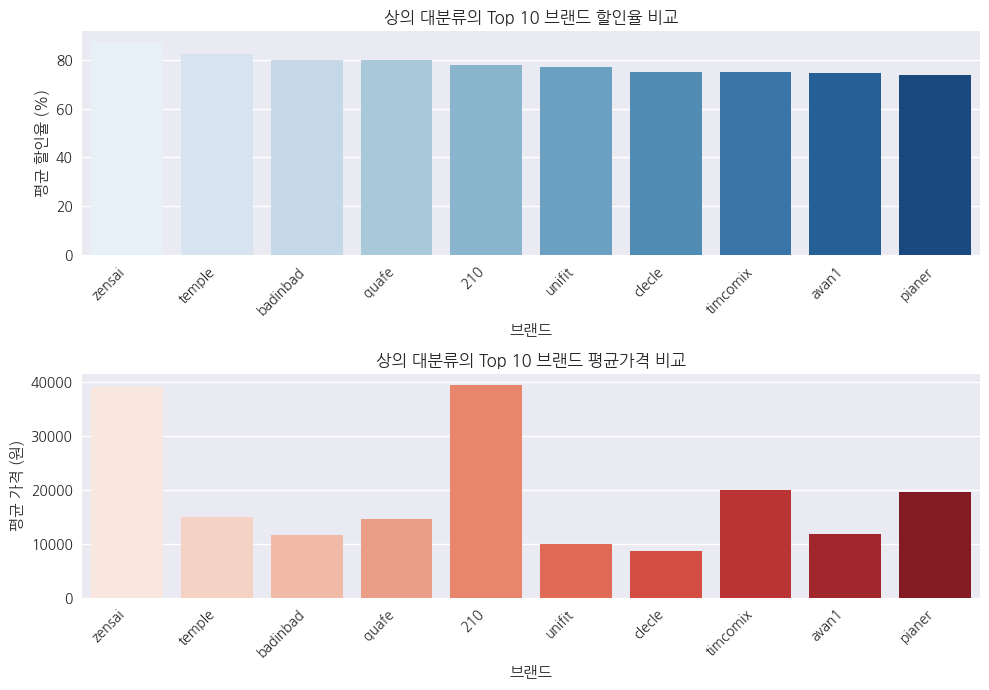

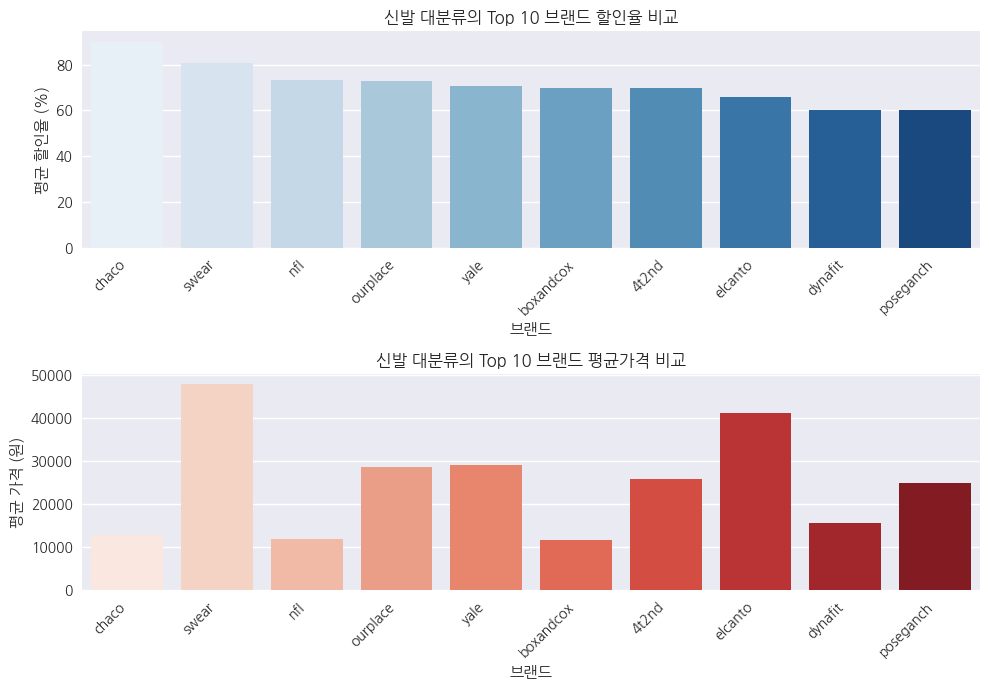

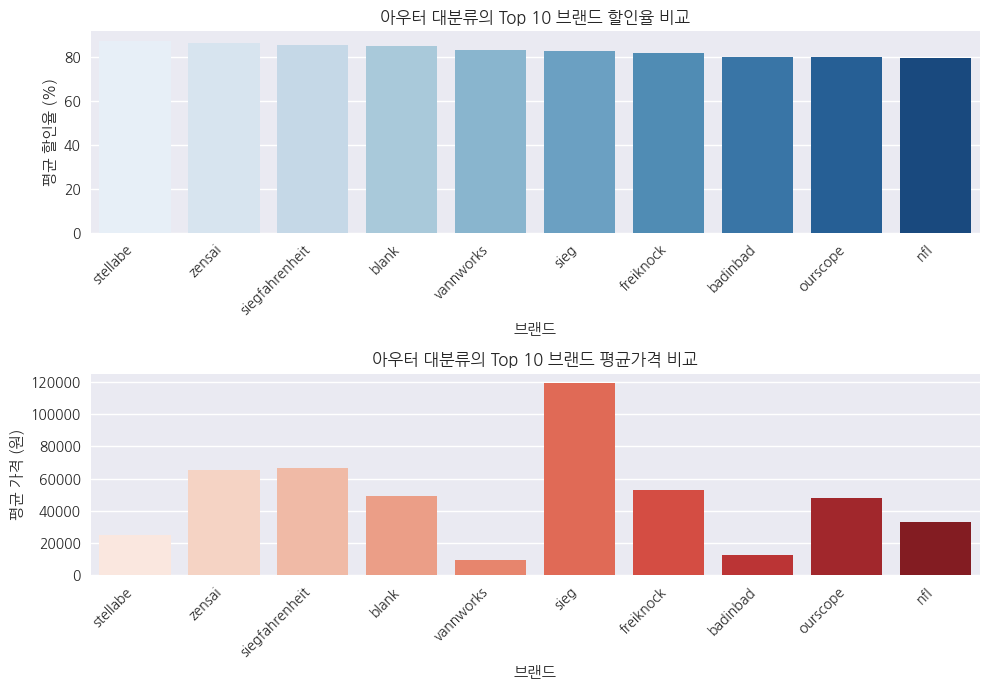

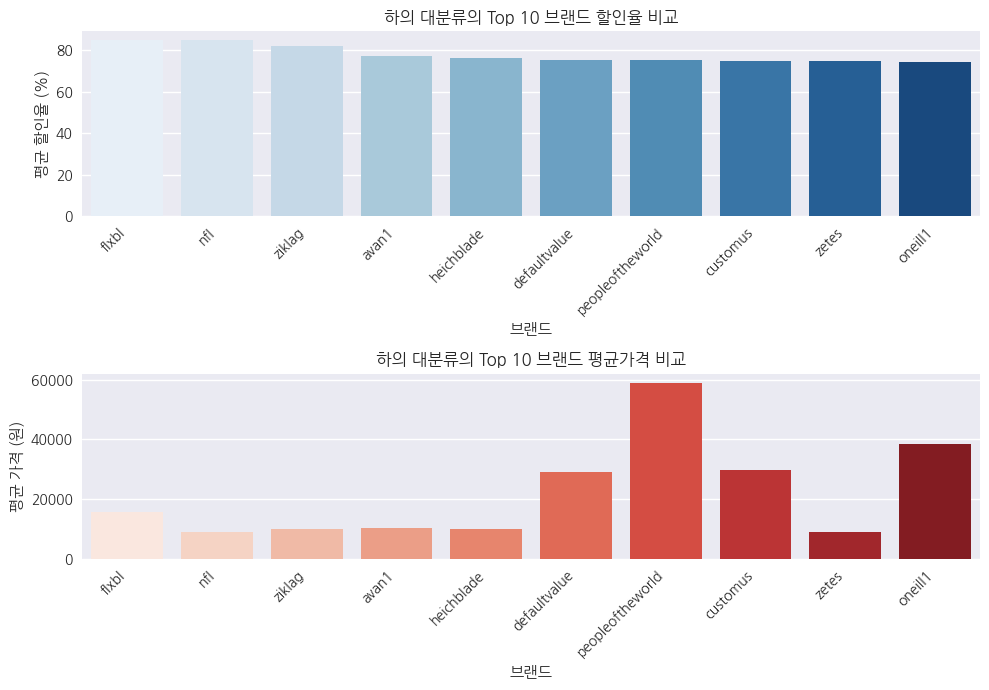

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 라이브러리 및 데이터 로딩
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 할인율 계산 함수
def calculate_discount_rate(row):
    return (row['price_nomember'] - row['price_member']) / row['price_nomember'] * 100

# 할인율 컬럼 추가
df['discount_rate'] = df.apply(calculate_discount_rate, axis=1)

# 대분류별로 top 10 브랜드 추출
top_brands_df = df.groupby(['sort', 'brand']).agg({'discount_rate': 'mean', 'price_member': 'mean', 'price_nomember': 'mean'}).reset_index()
top_brands_df = top_brands_df.sort_values(['sort', 'discount_rate'], ascending=[True, False]).groupby('sort').head(10)

# 6개의 차트를 그리기 위한 함수
def plot_analysis_charts(data, title):
    plt.figure(figsize=(10, 7))
    
    # 할인율 분석
    plt.subplot(2, 1, 1)
    sns.barplot(x='brand', y='discount_rate', hue='brand', data=data, palette='Blues')
    plt.title(f'{title} 대분류의 Top 10 브랜드 할인율 비교')
    plt.xlabel('브랜드')
    plt.ylabel('평균 할인율 (%)')
    plt.xticks(rotation=45, ha='right')
    
    # 평균가격 비교
    plt.subplot(2, 1, 2)
    sns.barplot(x='brand', y='price_member', hue='brand', data=data, palette='Reds')
    plt.title(f'{title} 대분류의 Top 10 브랜드 평균가격 비교')
    plt.xlabel('브랜드')
    plt.ylabel('평균 가격 (원)')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# 대분류별로 차트 그리기
categories = top_brands_df['sort'].unique()
for category in categories:
    category_data = top_brands_df[top_brands_df['sort'] == category]
    plot_analysis_charts(category_data, category)


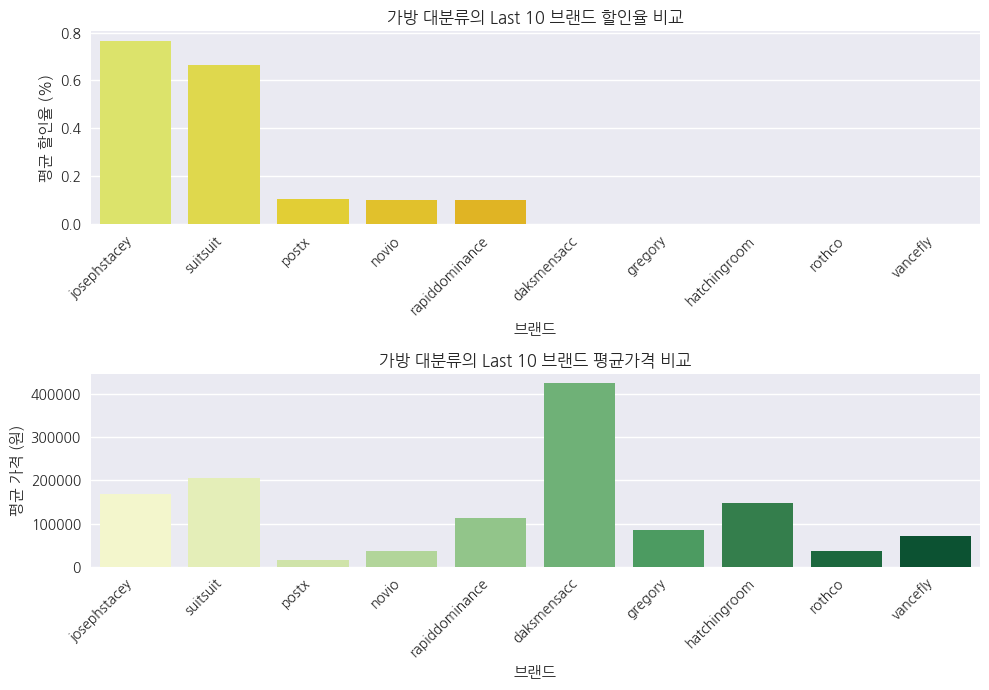

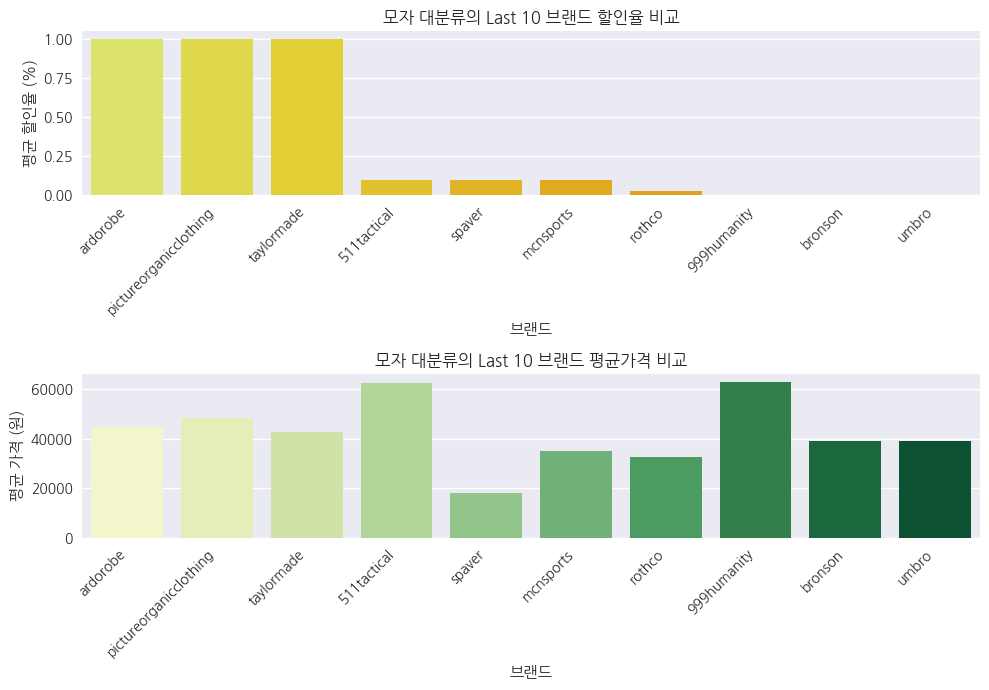

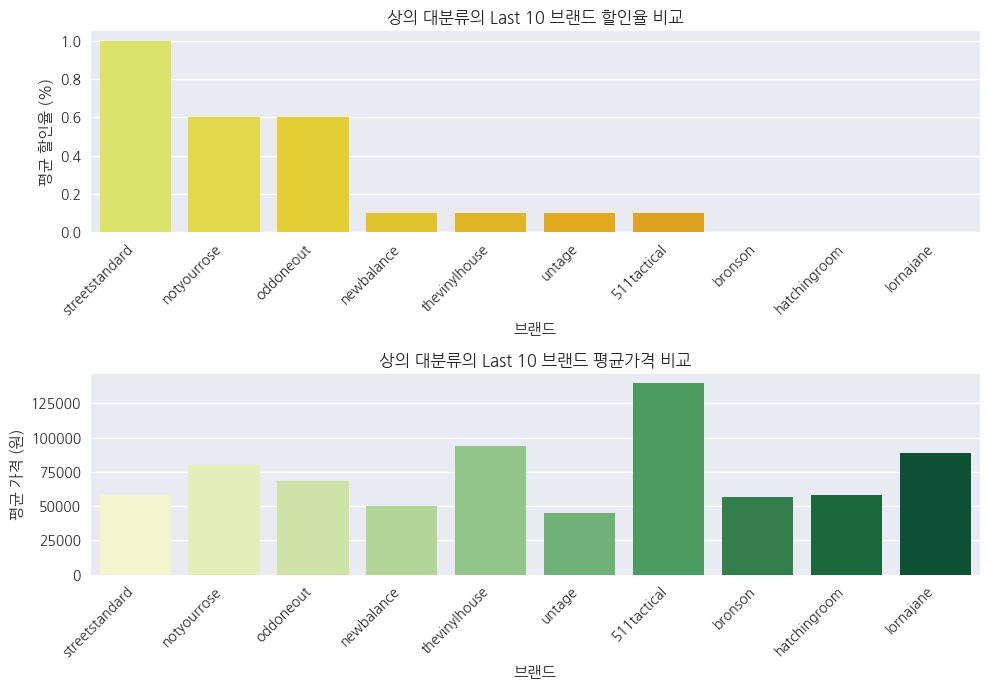

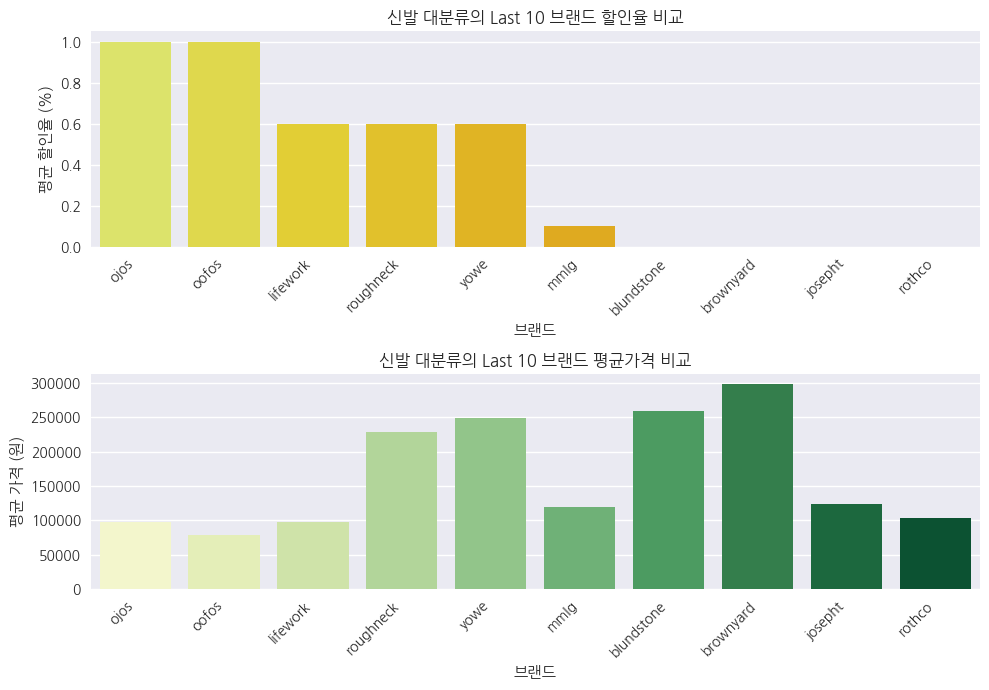

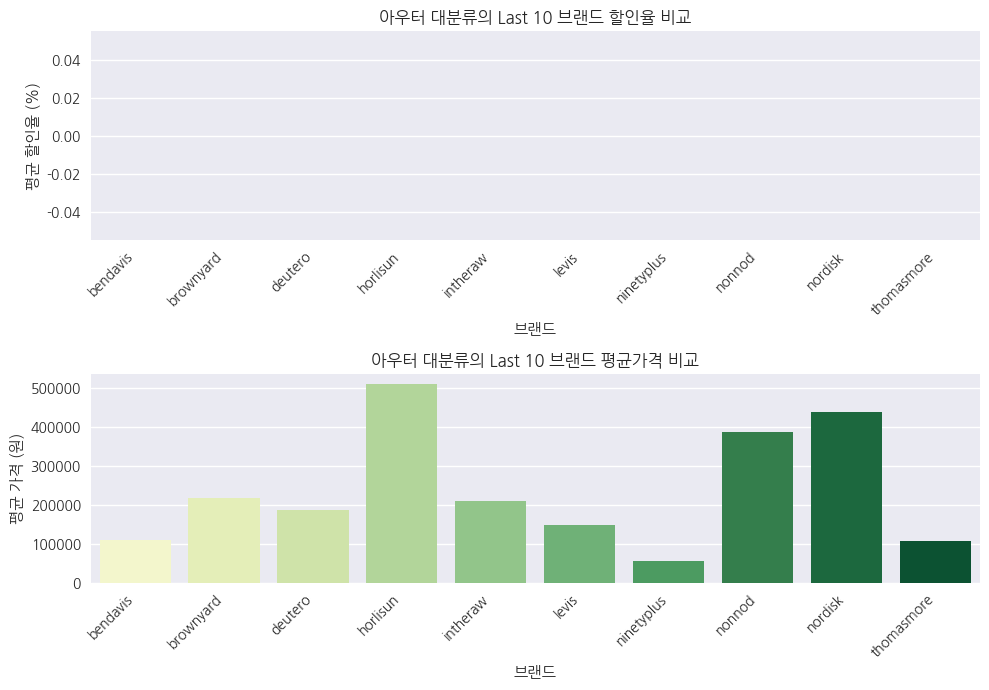

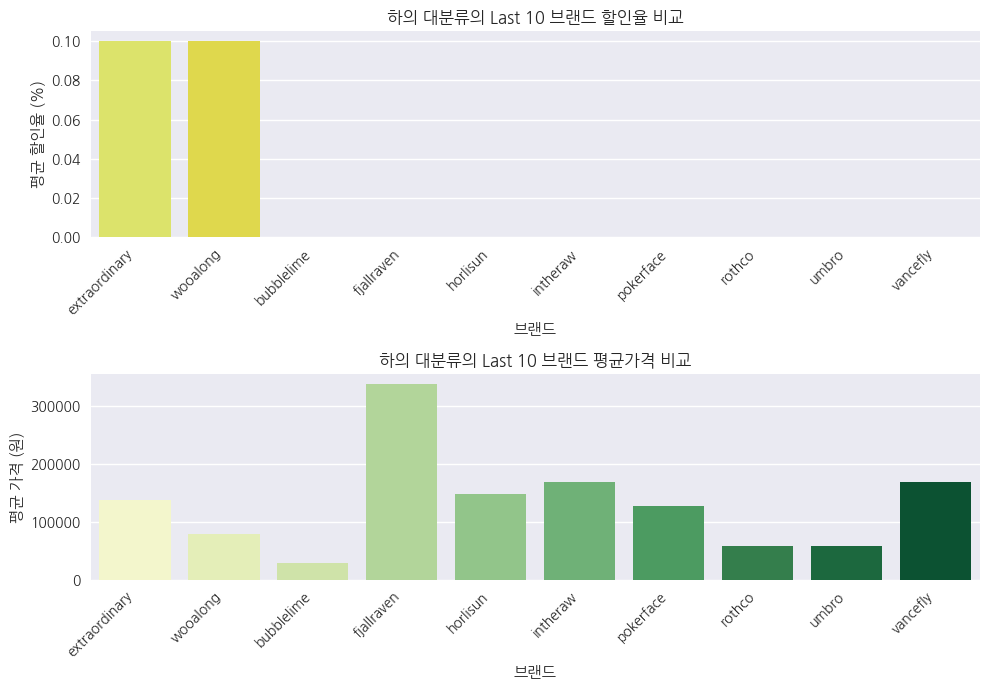

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 라이브러리 및 데이터 로딩
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 할인율 계산 함수
def calculate_discount_rate(row):
    return (row['price_nomember'] - row['price_member']) / row['price_nomember'] * 100

# 할인율 컬럼 추가
df['discount_rate'] = df.apply(calculate_discount_rate, axis=1)

# 대분류별로 top 10 브랜드 추출
top_brands_df = df.groupby(['sort', 'brand']).agg({'discount_rate': 'mean', 'price_member': 'mean', 'price_nomember': 'mean'}).reset_index()
top_brands_df = top_brands_df.sort_values(['sort', 'discount_rate'], ascending=[True, False]).groupby('sort').tail(10)

# 6개의 차트를 그리기 위한 함수
def plot_analysis_charts(data, title):
    plt.figure(figsize=(10, 7))
    
    # 할인율 분석
    plt.subplot(2, 1, 1)
    sns.barplot(x='brand', y='discount_rate', hue='brand', data=data, palette='Wistia')
    plt.title(f'{title} 대분류의 Last 10 브랜드 할인율 비교')
    plt.xlabel('브랜드')
    plt.ylabel('평균 할인율 (%)')
    plt.xticks(rotation=45, ha='right')
    
    # 평균가격 비교
    plt.subplot(2, 1, 2)
    sns.barplot(x='brand', y='price_member', hue='brand', data=data, palette='YlGn')
    plt.title(f'{title} 대분류의 Last 10 브랜드 평균가격 비교')
    plt.xlabel('브랜드')
    plt.ylabel('평균 가격 (원)')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# 대분류별로 차트 그리기
categories = top_brands_df['sort'].unique()
for category in categories:
    category_data = top_brands_df[top_brands_df['sort'] == category]
    plot_analysis_charts(category_data, category)


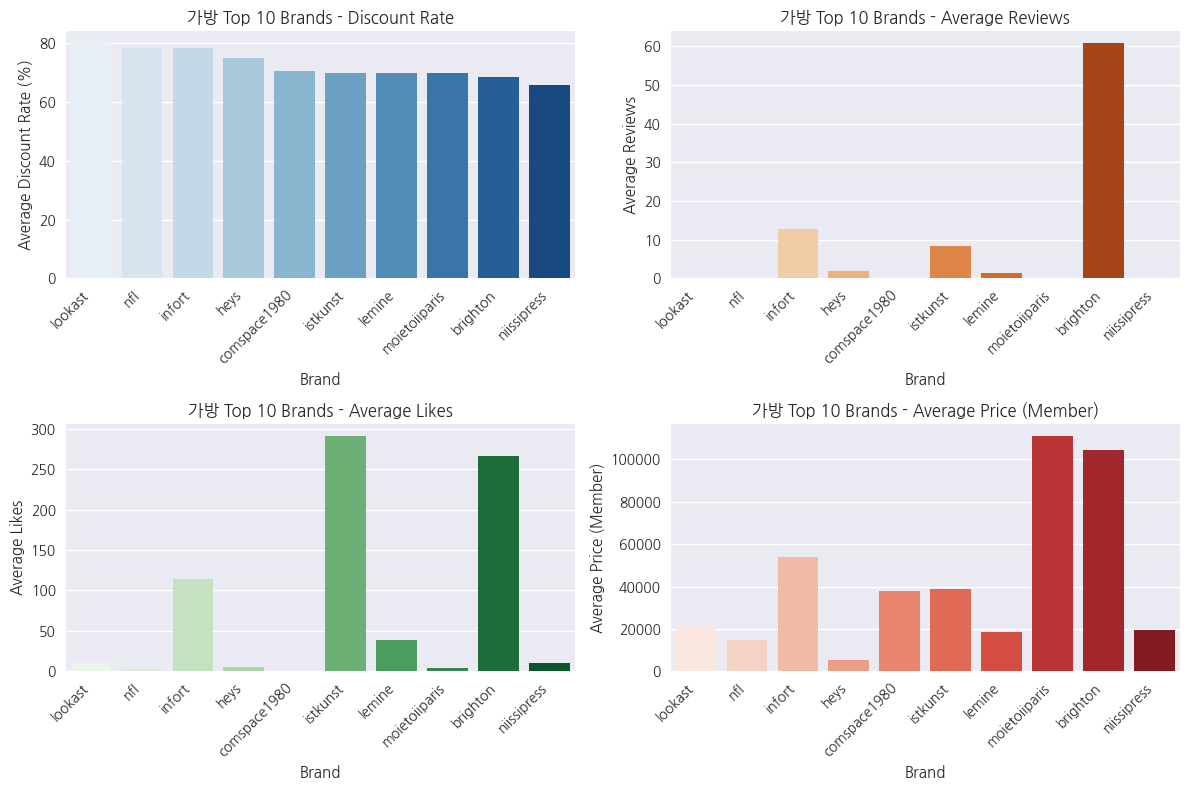

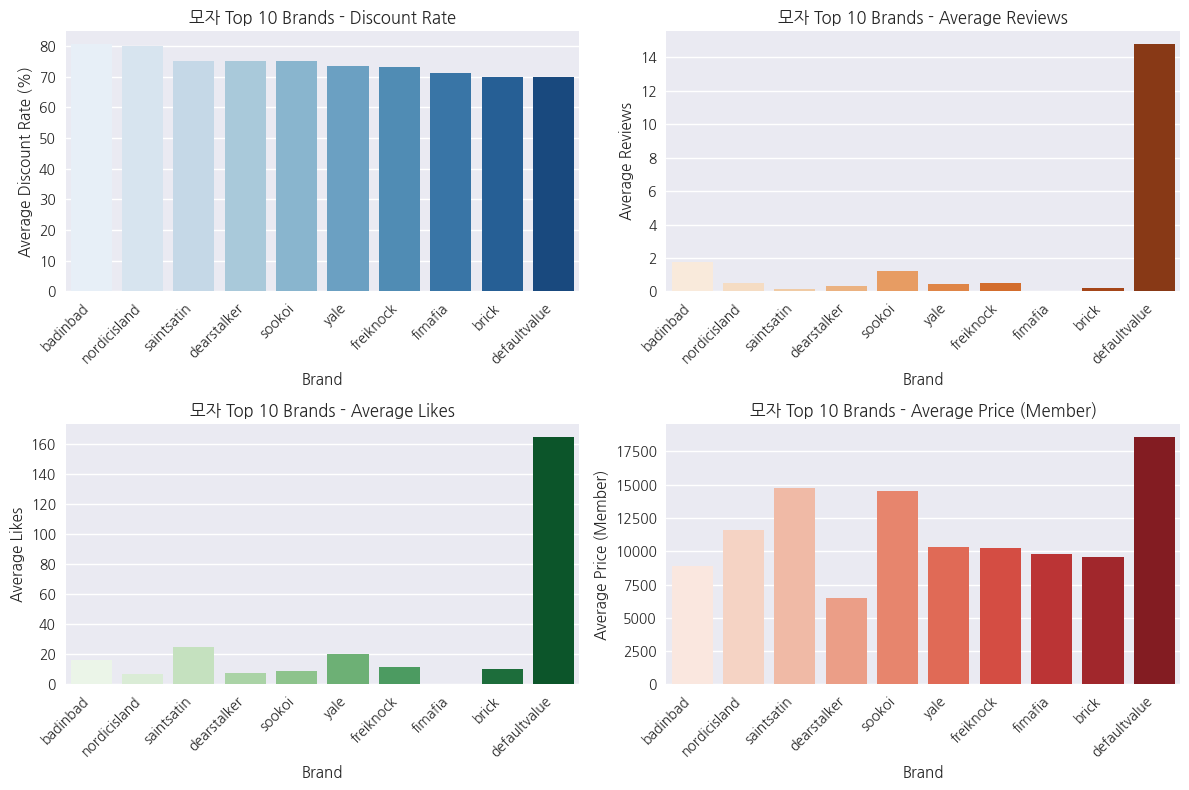

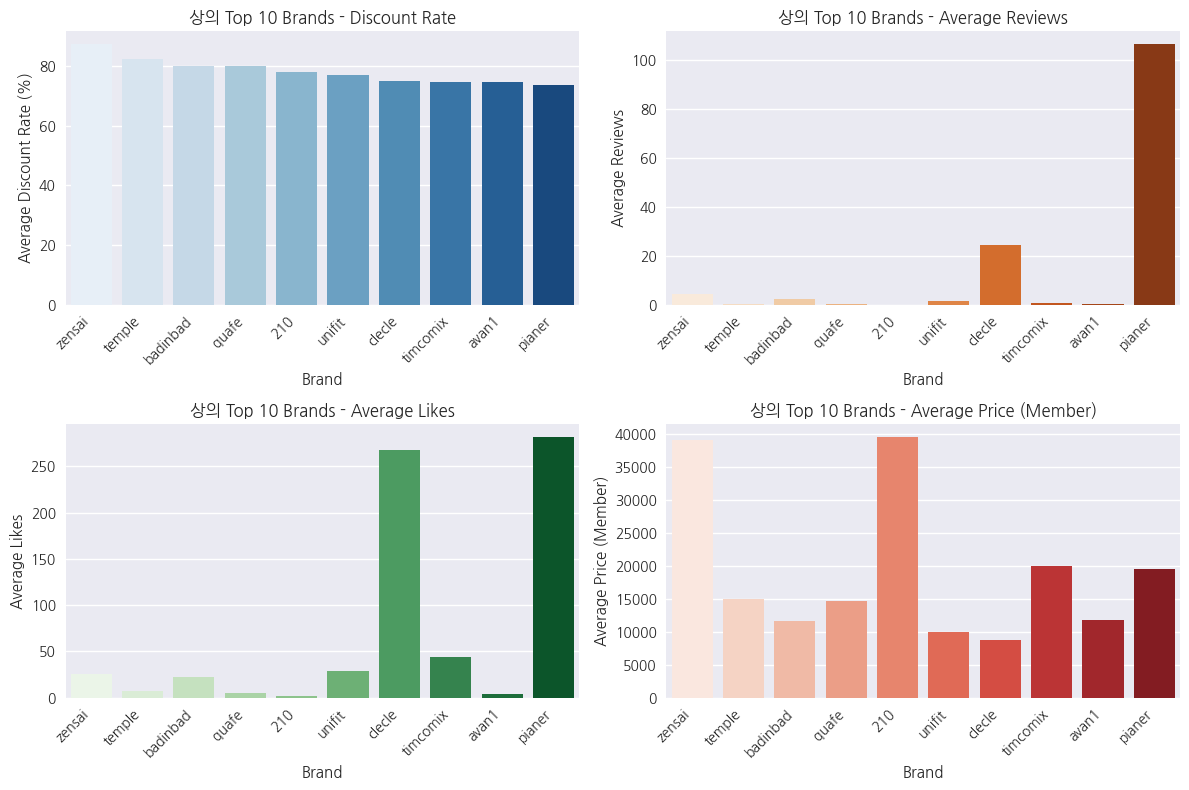

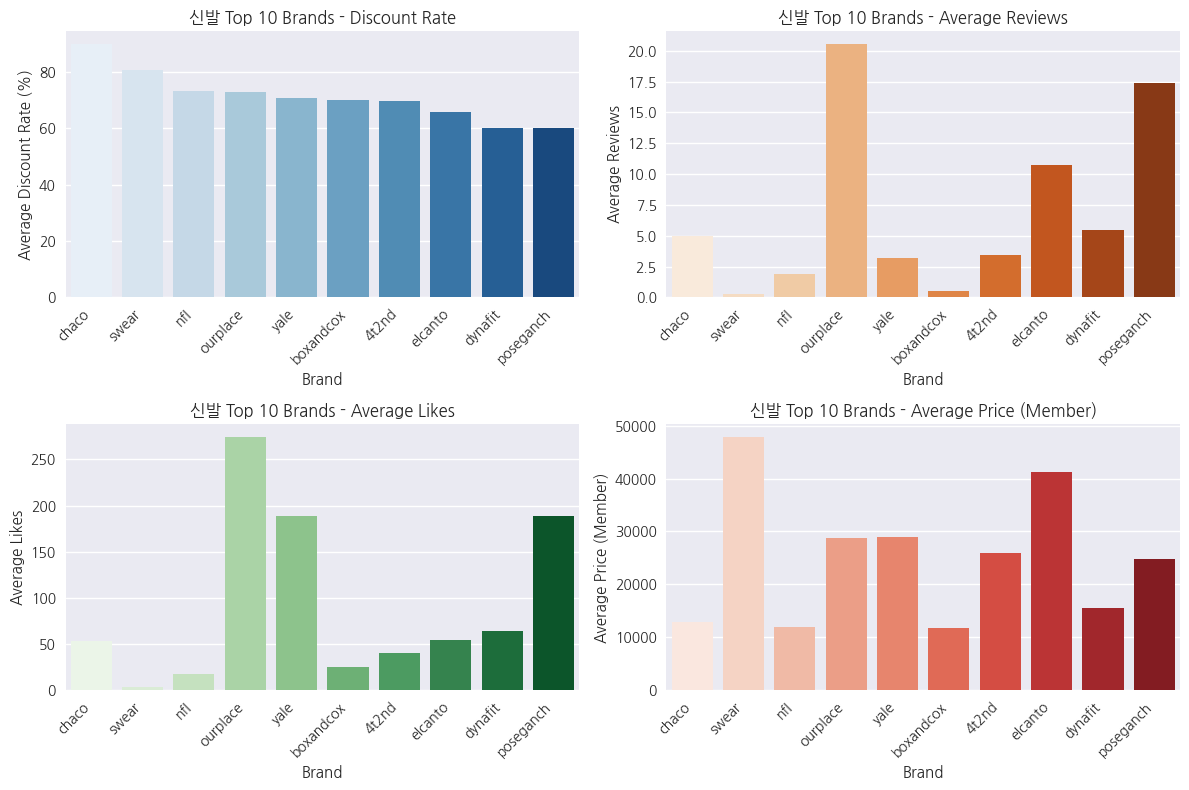

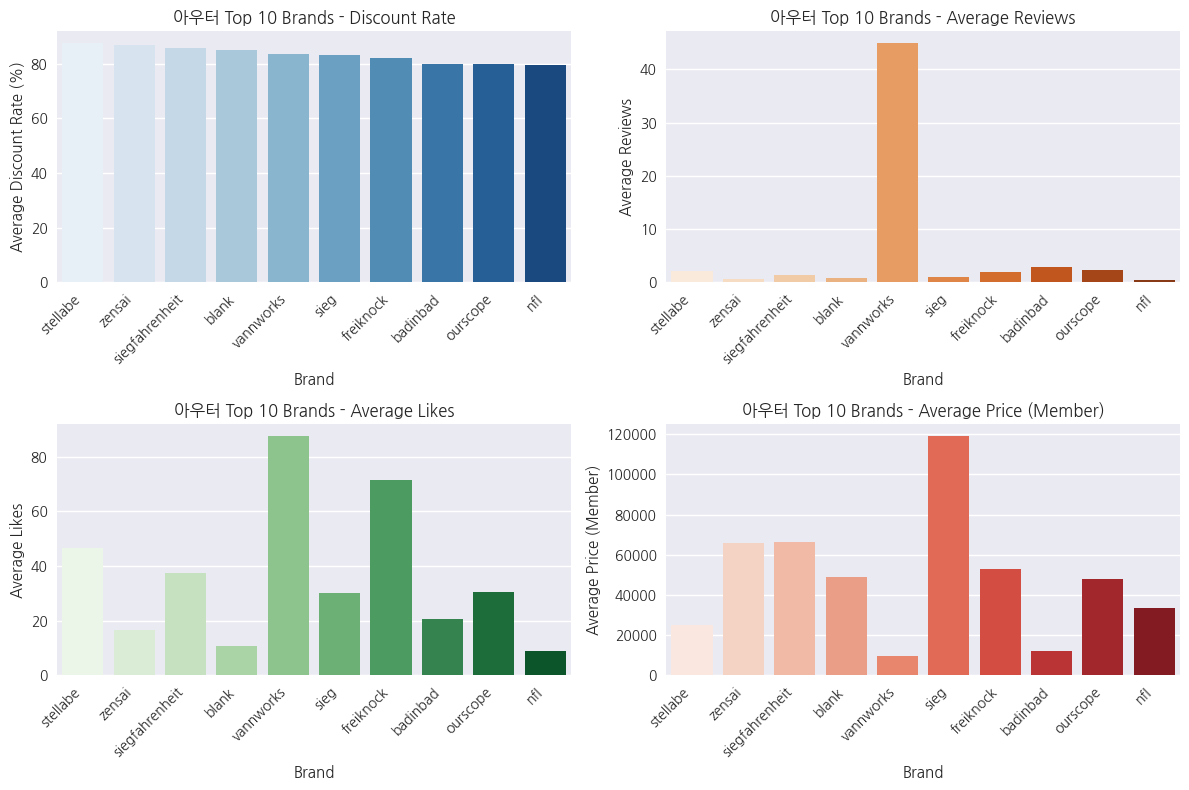

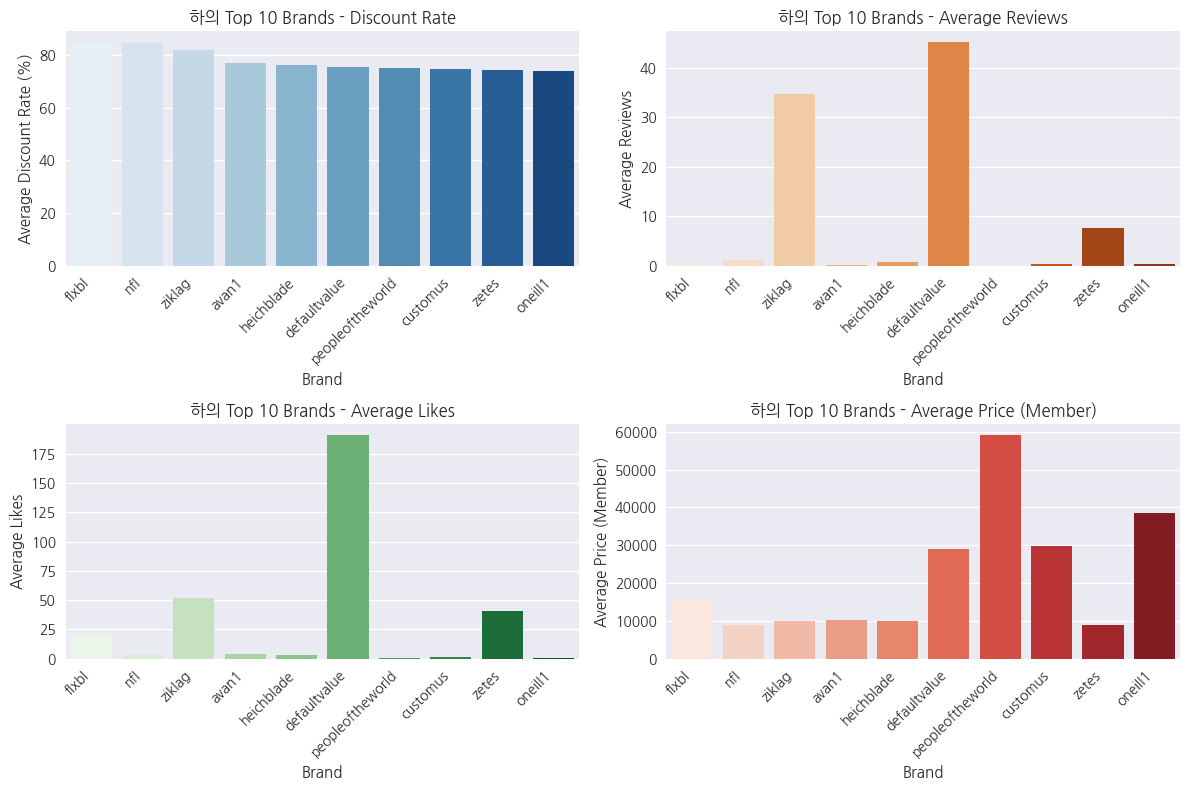

In [15]:
# Calculate average reviews and likes for each brand
df['average_review'] = df['review'] / 10  # Assuming 10 is the maximum number of reviews for normalization
df['average_likes'] = df['likes'] / 10  # Assuming 10 is the maximum number of likes for normalization

# Sorting and selecting top brands
top_brands_df = df.groupby(['sort', 'brand']).agg({
    'discount_rate': 'mean',
    'price_member': 'mean',
    'average_review': 'mean',
    'average_likes': 'mean'
}).reset_index()
top_brands_df = top_brands_df.sort_values(['sort', 'discount_rate'], ascending=[True, False]).groupby('sort').head(10)

# Function to plot double bar chart
def plot_double_bar_chart(data, title):
    plt.figure(figsize=(12, 8))
    
    # Bar chart for discount rate
    plt.subplot(2, 2, 1)
    sns.barplot(x='brand', y='discount_rate', hue='brand', data=data, palette='Blues')
    plt.title(f'{title} Top 10 Brands - Discount Rate')
    plt.xlabel('Brand')
    plt.ylabel('Average Discount Rate (%)')
    plt.xticks(rotation=45, ha='right')
    
    # Bar chart for average reviews
    plt.subplot(2, 2, 2)
    sns.barplot(x='brand', y='average_review', hue='brand', data=data, palette='Oranges')
    plt.title(f'{title} Top 10 Brands - Average Reviews')
    plt.xlabel('Brand')
    plt.ylabel('Average Reviews')
    plt.xticks(rotation=45, ha='right')
    
    # Bar chart for average likes
    plt.subplot(2, 2, 3)
    sns.barplot(x='brand', y='average_likes', hue='brand', data=data, palette='Greens')
    plt.title(f'{title} Top 10 Brands - Average Likes')
    plt.xlabel('Brand')
    plt.ylabel('Average Likes')
    plt.xticks(rotation=45, ha='right')
    
    # Bar chart for price_member
    plt.subplot(2, 2, 4)
    sns.barplot(x='brand', y='price_member', hue='brand', data=data, palette='Reds')
    plt.title(f'{title} Top 10 Brands - Average Price (Member)')
    plt.xlabel('Brand')
    plt.ylabel('Average Price (Member)')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# Plotting double bar charts for each category
categories = top_brands_df['sort'].unique()
for category in categories:
    category_data = top_brands_df[top_brands_df['sort'] == category]
    plot_double_bar_chart(category_data, category)

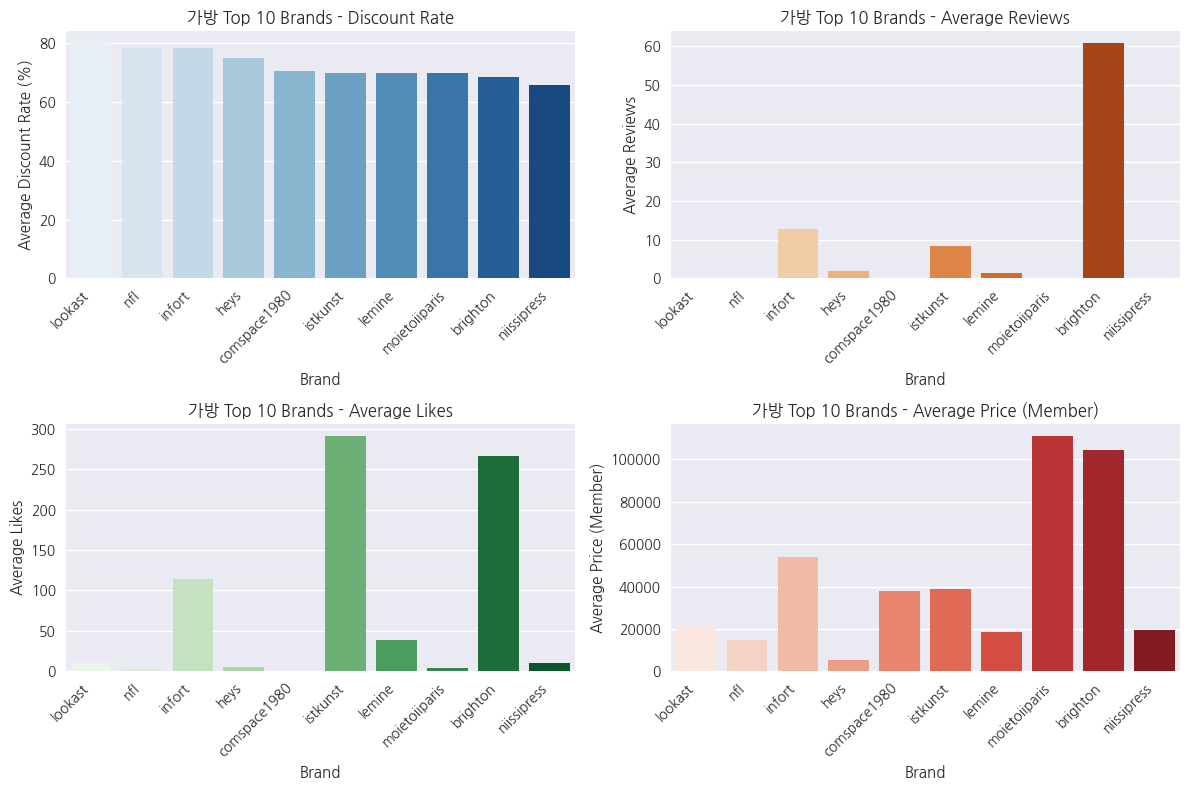

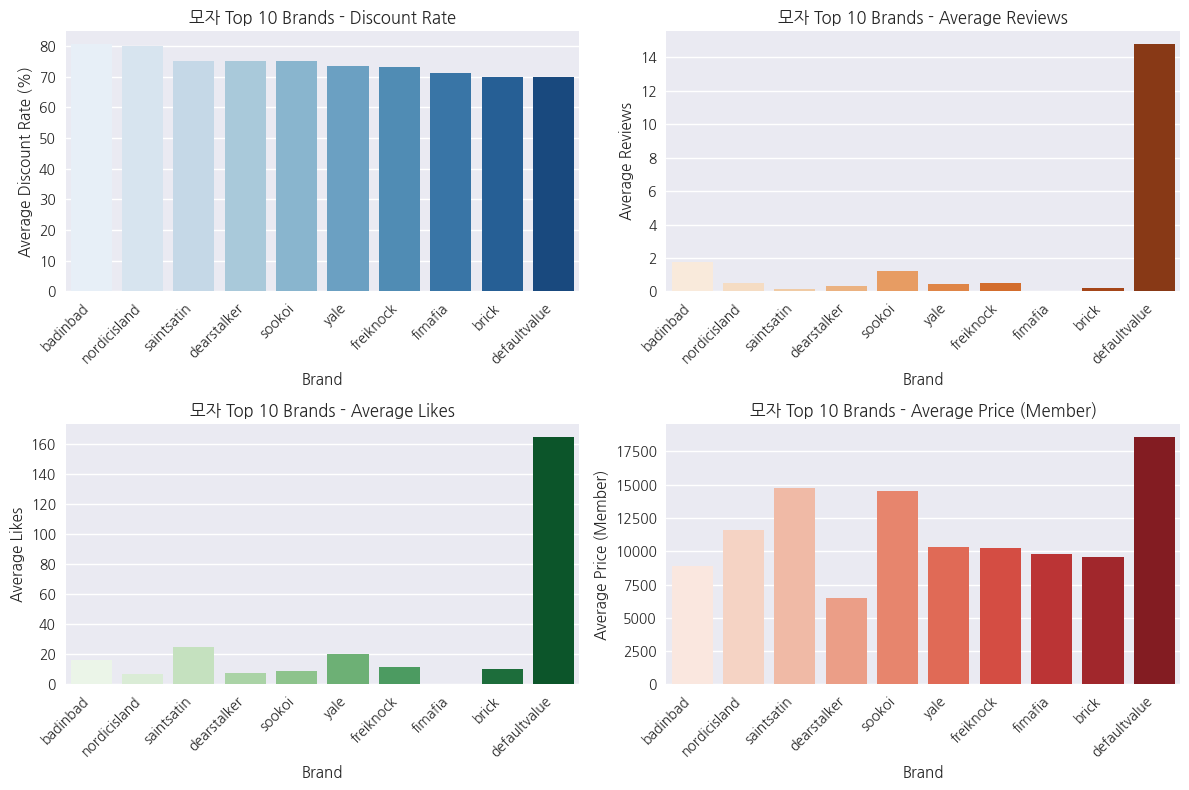

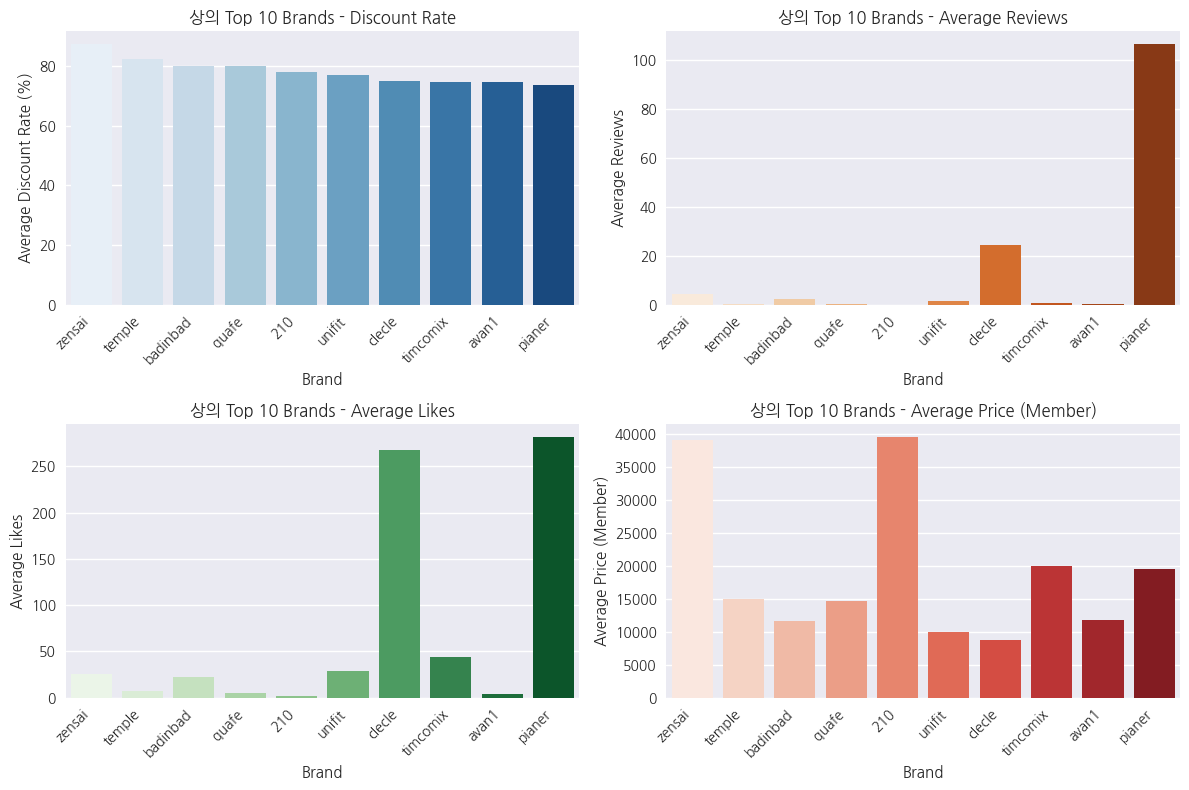

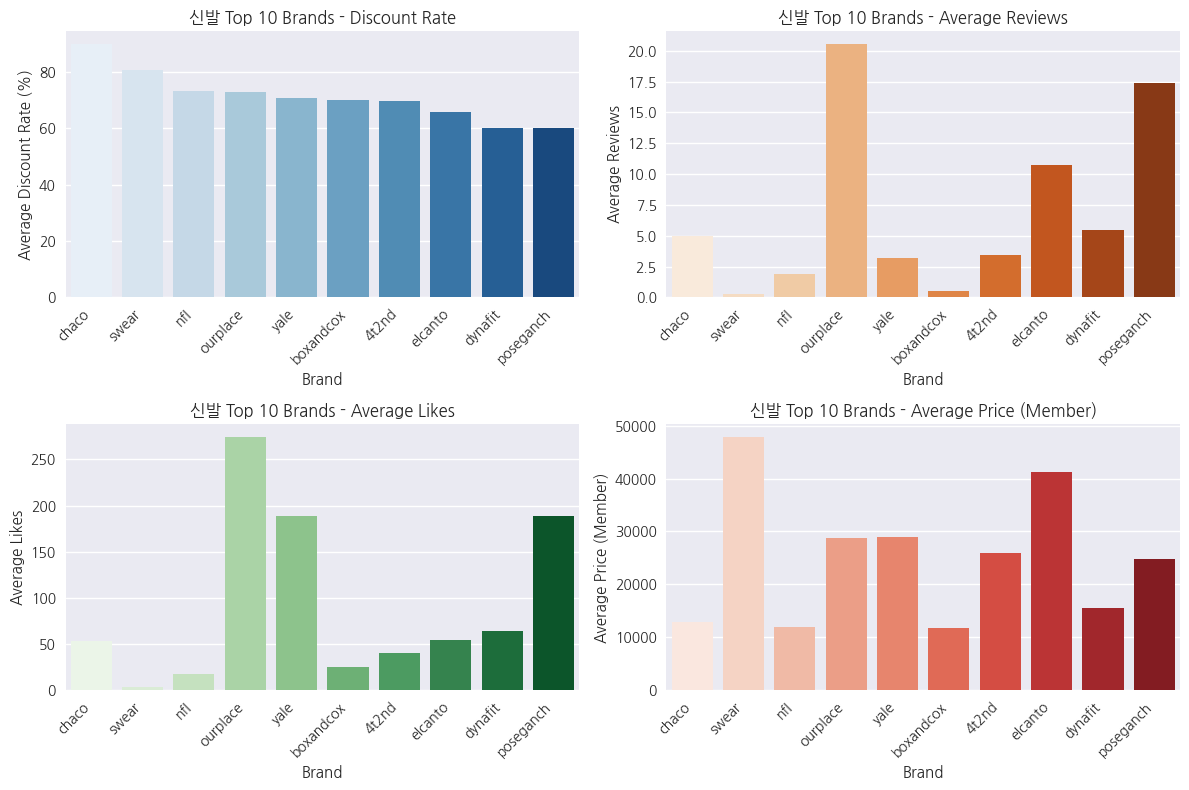

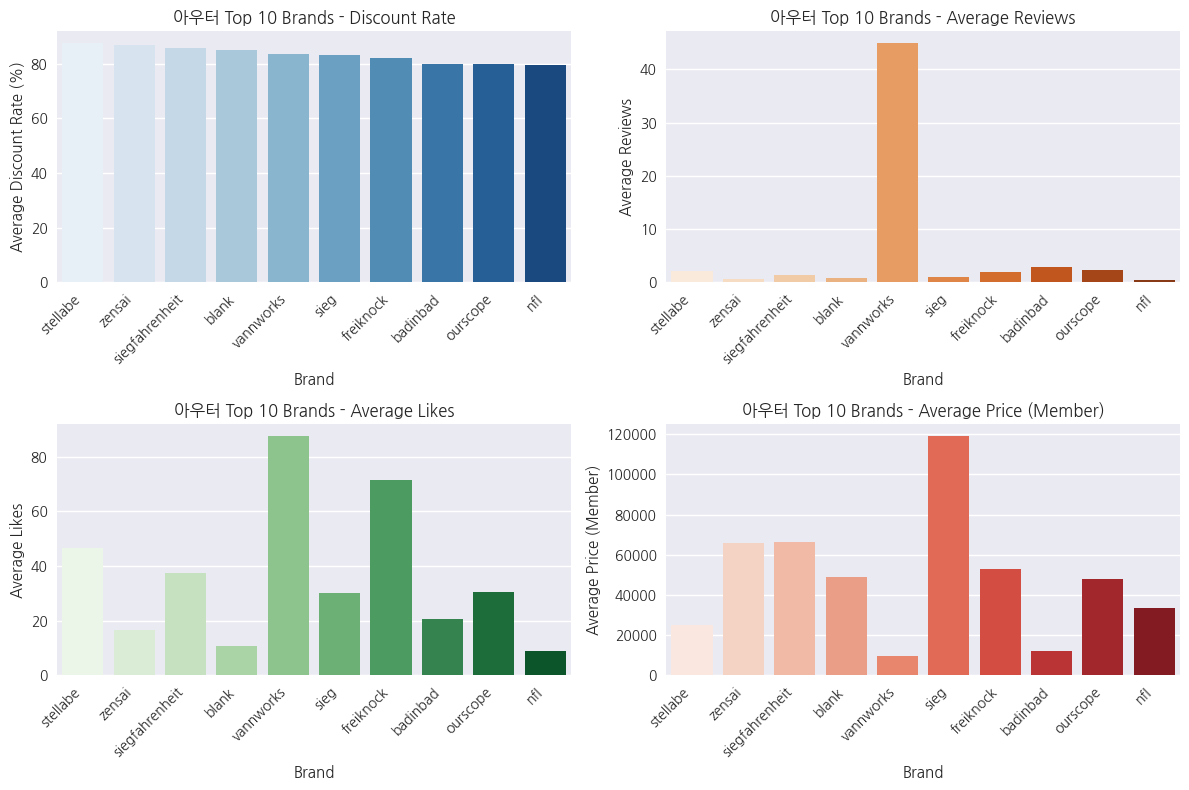

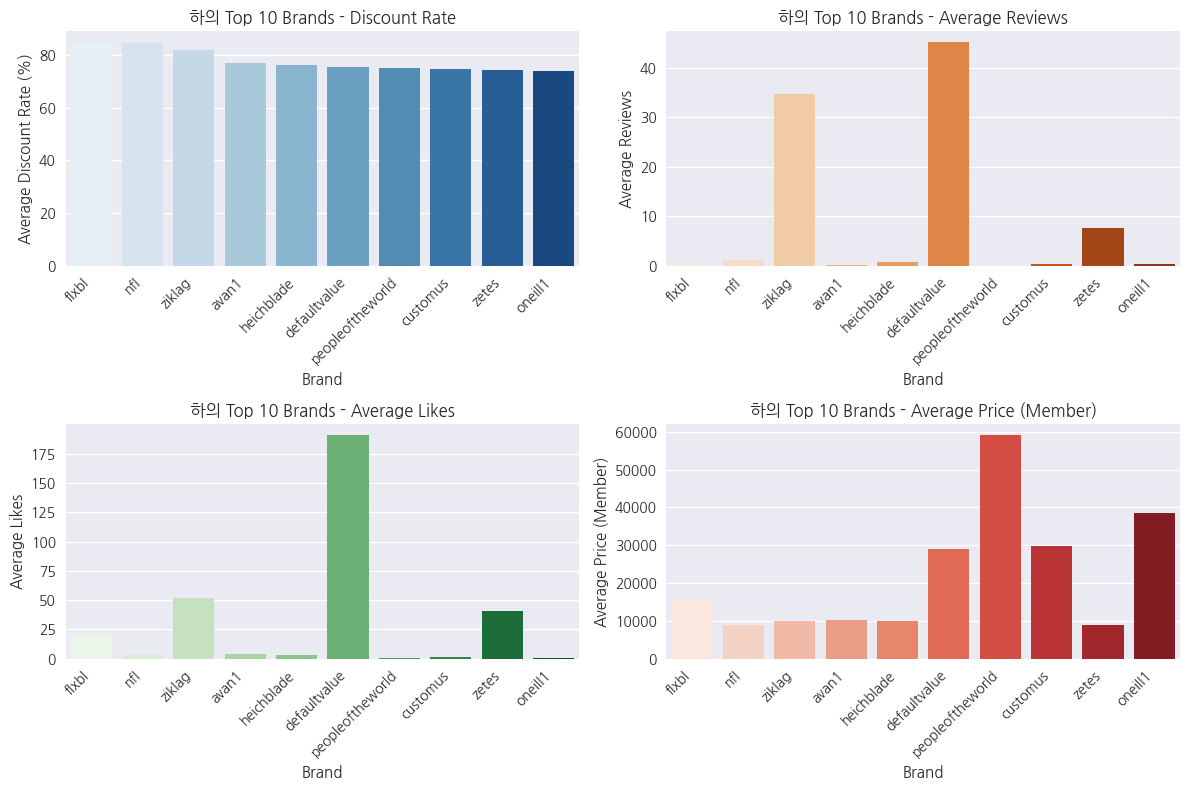

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average reviews and likes for each brand
df['average_reviews'] = df['review'] / 10  # Assuming 10 is the maximum number of reviews for normalization
df['average_likes'] = df['likes'] / 10  # Assuming 10 is the maximum number of likes for normalization

# Sorting and selecting top brands
top_brands_df = df.groupby(['sort', 'brand']).agg({
    'discount_rate': 'mean',
    'price_member': 'mean',
    'average_reviews': 'mean',
    'average_likes': 'mean'
}).reset_index()
top_brands_df = top_brands_df.sort_values(['sort', 'discount_rate'], ascending=[True, False]).groupby('sort').head(10)

# Function to plot double bar chart
def plot_double_bar_chart(data, title):
    plt.figure(figsize=(12, 8))
    
    # Bar chart for discount rate
    plt.subplot(2, 2, 1)
    sns.barplot(x='brand', y='discount_rate', hue='brand', data=data, palette='Blues')
    plt.title(f'{title} Top 10 Brands - Discount Rate')
    plt.xlabel('Brand')
    plt.ylabel('Average Discount Rate (%)')
    plt.xticks(rotation=45, ha='right')
    
    # Bar chart for average reviews
    plt.subplot(2, 2, 2)
    sns.barplot(x='brand', y='average_reviews', hue='brand', data=data, palette='Oranges')
    plt.title(f'{title} Top 10 Brands - Average Reviews')
    plt.xlabel('Brand')
    plt.ylabel('Average Reviews')
    plt.xticks(rotation=45, ha='right')
    
    # Bar chart for average likes
    plt.subplot(2, 2, 3)
    sns.barplot(x='brand', y='average_likes', hue='brand', data=data, palette='Greens')
    plt.title(f'{title} Top 10 Brands - Average Likes')
    plt.xlabel('Brand')
    plt.ylabel('Average Likes')
    plt.xticks(rotation=45, ha='right')
    
    # Bar chart for price_member
    plt.subplot(2, 2, 4)
    sns.barplot(x='brand', y='price_member', hue='brand', data=data, palette='Reds')
    plt.title(f'{title} Top 10 Brands - Average Price (Member)')
    plt.xlabel('Brand')
    plt.ylabel('Average Price (Member)')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# Plotting double bar charts for each category
categories = top_brands_df['sort'].unique()
for category in categories:
    category_data = top_brands_df[top_brands_df['sort'] == category]
    plot_double_bar_chart(category_data, category)


/tmp/ipykernel_62428/1735349793.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sort', y='review', data=data, palette='Blues')
/tmp/ipykernel_62428/1735349793.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sort', y='likes', data=data, palette='Oranges')


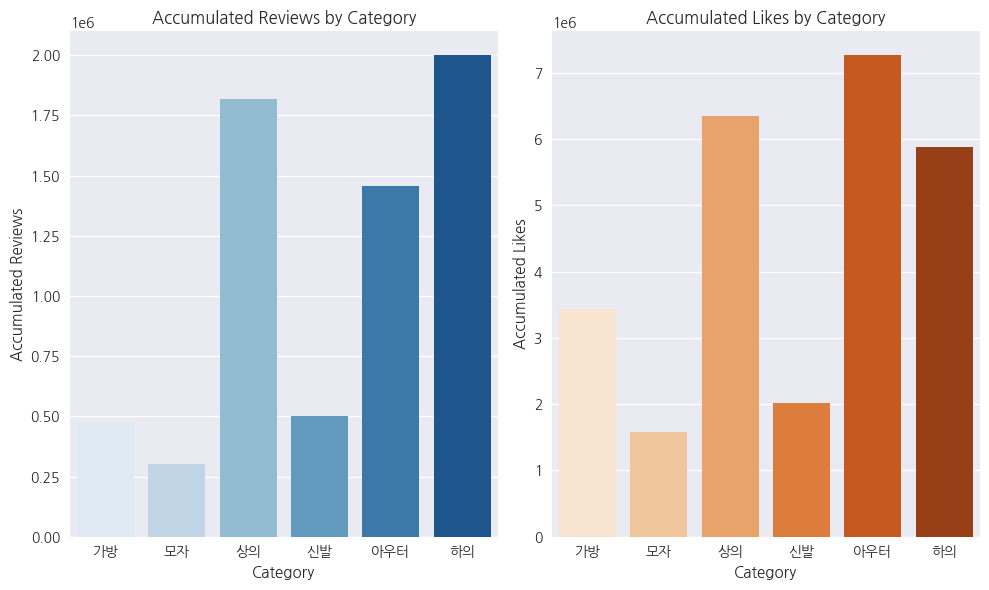

In [17]:
accumulated_data = df.groupby('sort').agg({
    'review': 'sum',
    'likes': 'sum'
}).reset_index()

# Function to plot accumulated bar chart
def plot_accumulated_bar_chart(data):
    plt.figure(figsize=(10, 6))
    
    # Bar chart for accumulated reviews
    plt.subplot(1, 2, 1)
    sns.barplot(x='sort', y='review', data=data, palette='Blues')
    plt.title('Accumulated Reviews by Category')
    plt.xlabel('Category')
    plt.ylabel('Accumulated Reviews')
    
    # Bar chart for accumulated likes
    plt.subplot(1, 2, 2)
    sns.barplot(x='sort', y='likes', data=data, palette='Oranges')
    plt.title('Accumulated Likes by Category')
    plt.xlabel('Category')
    plt.ylabel('Accumulated Likes')
    
    plt.tight_layout()
    plt.show()

# Plotting accumulated bar charts for each category
plot_accumulated_bar_chart(accumulated_data)

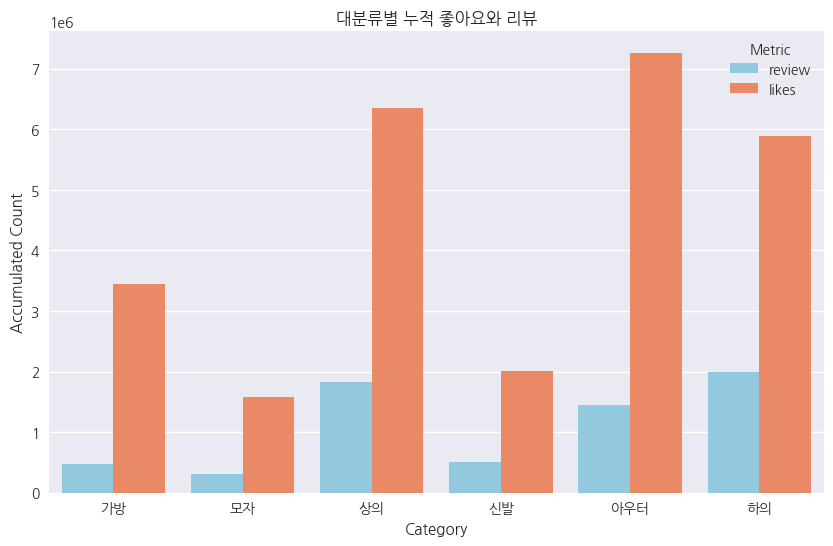

In [18]:
accumulated_data = df.groupby('sort').agg({
    'review': 'sum',
    'likes': 'sum'
}).reset_index()

# Melt the data for easier plotting
melted_data = pd.melt(accumulated_data, id_vars=['sort'], var_name='metric', value_name='accumulated_count')

# Plotting double-bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sort', y='accumulated_count', hue='metric', data=melted_data, palette=['skyblue', 'coral'])
plt.title('대분류별 누적 좋아요와 리뷰')
plt.xlabel('Category')
plt.ylabel('Accumulated Count')
plt.legend(title='Metric', loc='upper right')
plt.show()

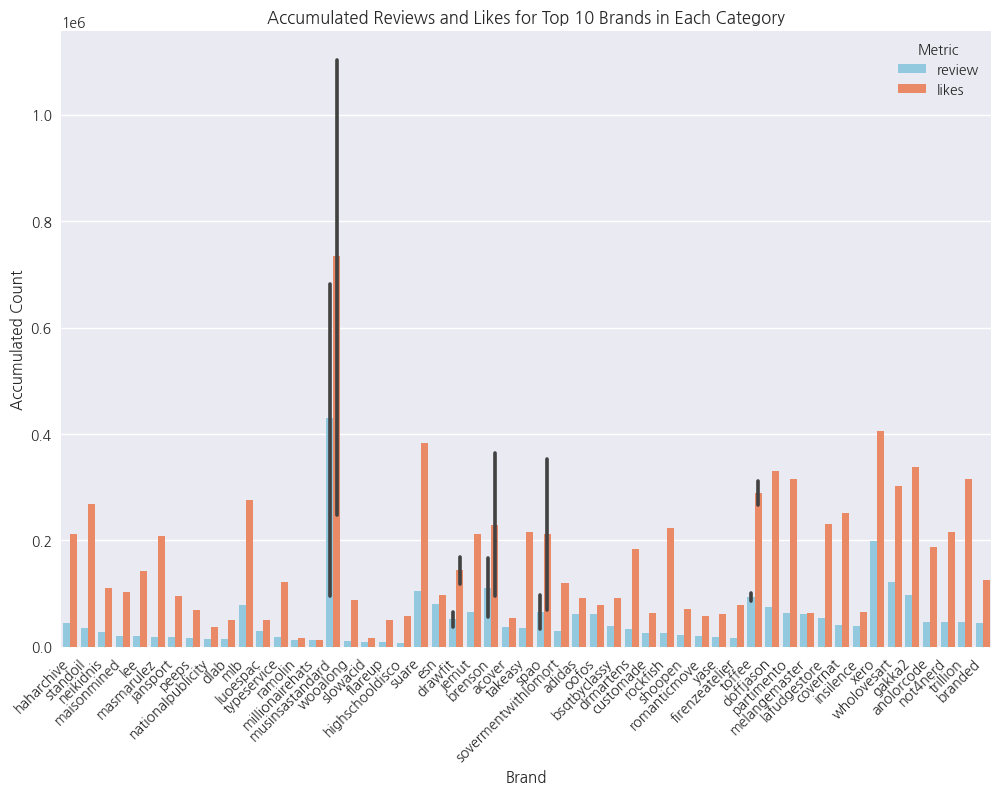

In [19]:
# Calculate accumulated reviews and likes for each category and brand
accumulated_data = df.groupby(['sort', 'brand']).agg({
    'review': 'sum',
    'likes': 'sum'
}).reset_index()

# Select top 10 brands for each category
top_brands_df = accumulated_data.sort_values(['sort', 'review'], ascending=[True, False]).groupby('sort').head(10)

# Melt the data for easier plotting
melted_data = pd.melt(top_brands_df, id_vars=['sort', 'brand'], var_name='metric', value_name='accumulated_count')

# Plotting double-bar plot for each category
plt.figure(figsize=(12, 8))
sns.barplot(x='brand', y='accumulated_count', hue='metric', data=melted_data, palette=['skyblue', 'coral'])
plt.title('Accumulated Reviews and Likes for Top 10 Brands in Each Category')
plt.xlabel('Brand')
plt.ylabel('Accumulated Count')
plt.legend(title='Metric', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

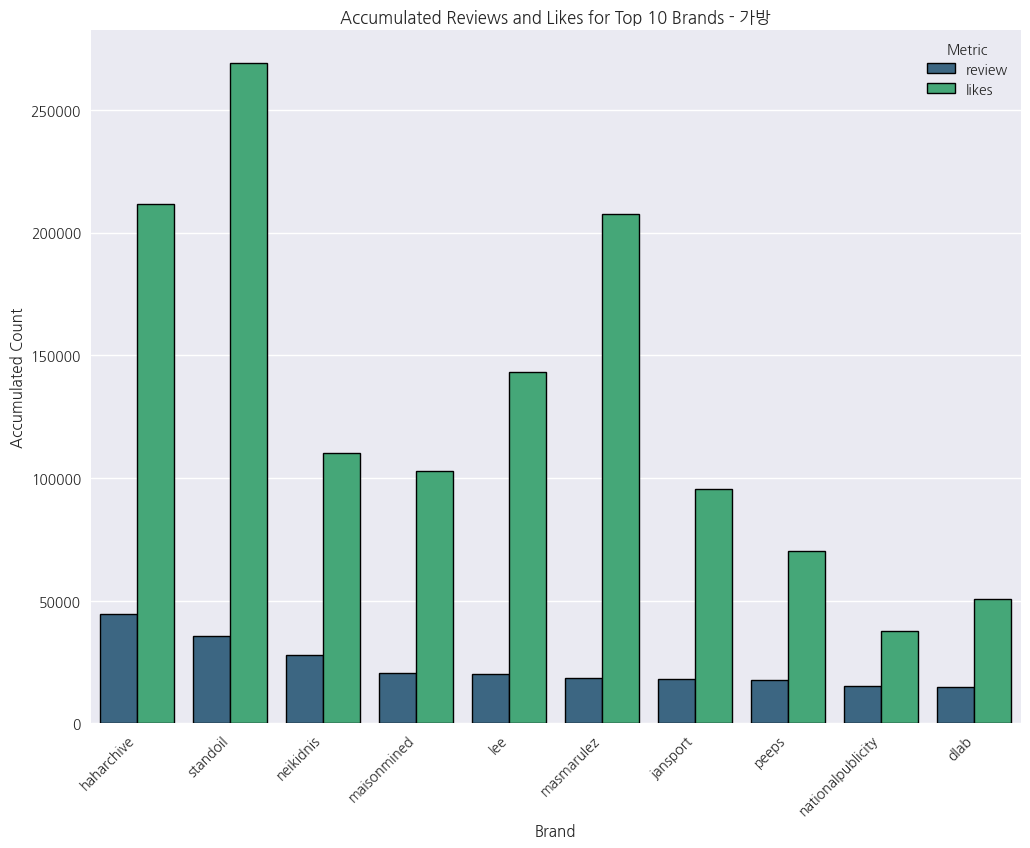

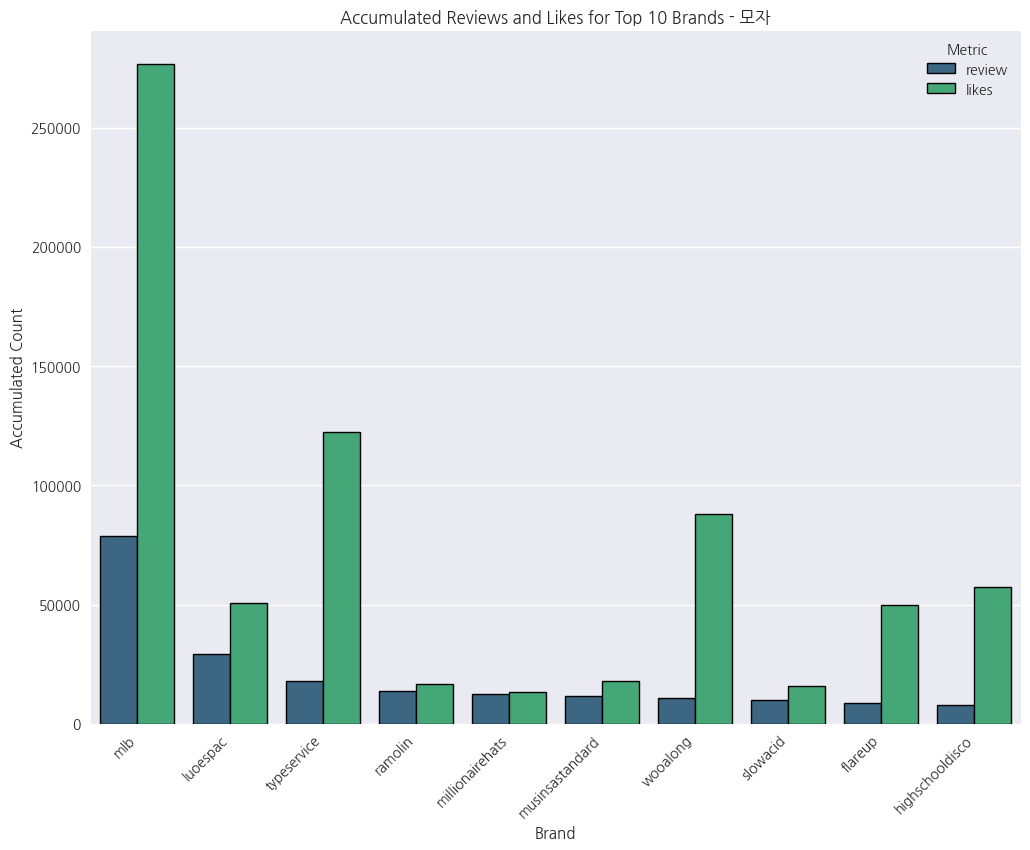

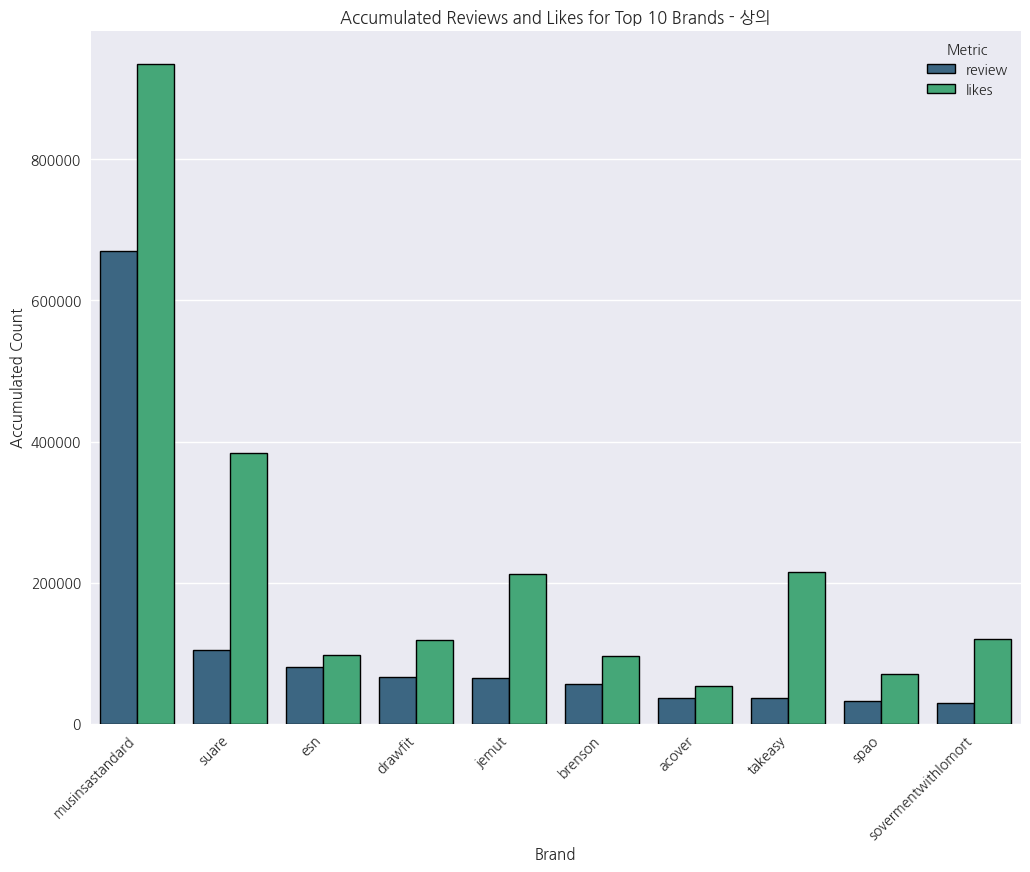

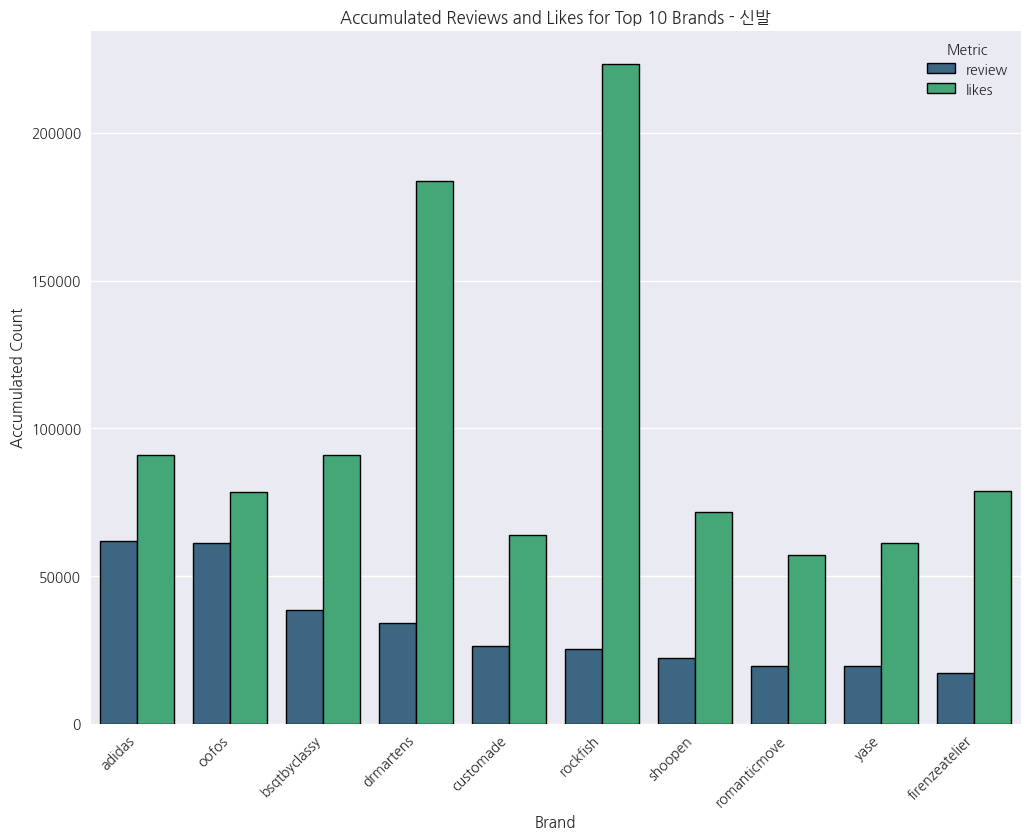

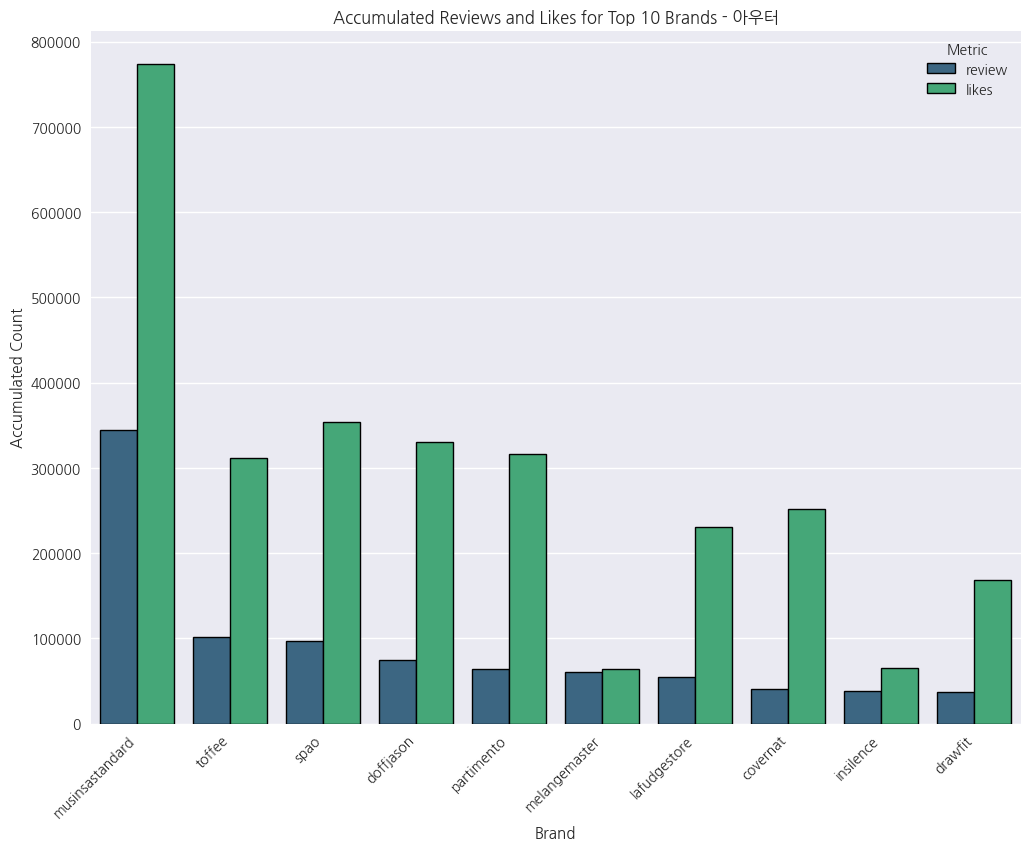

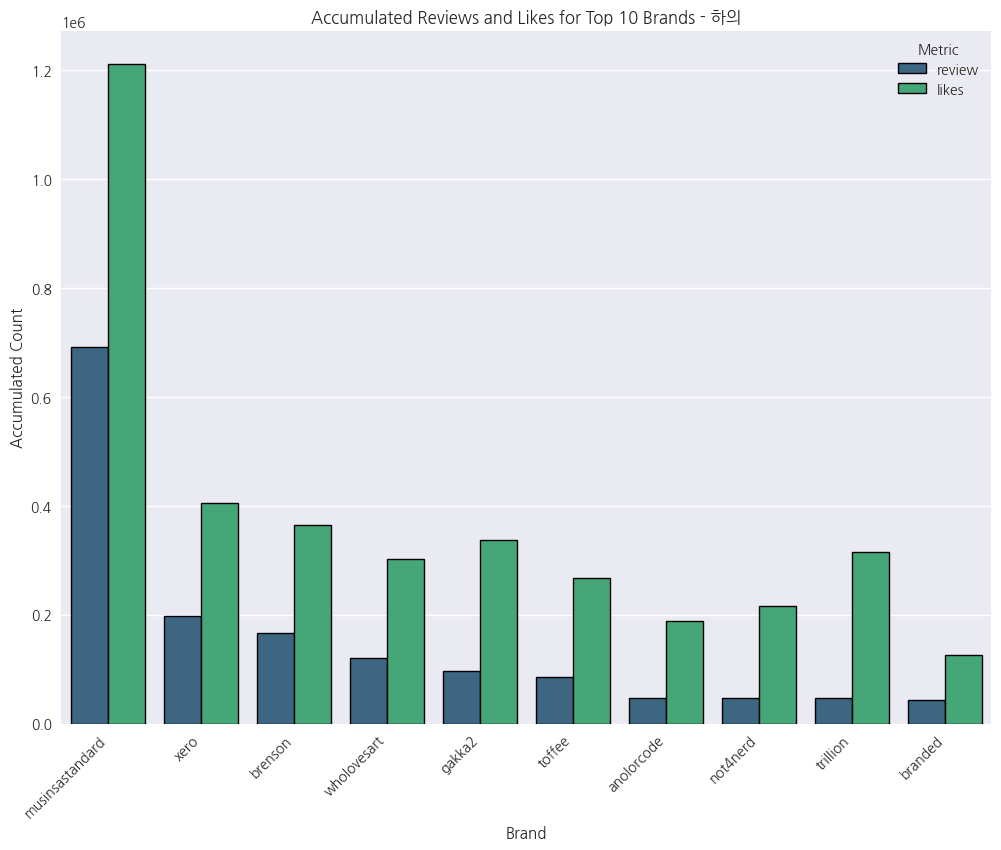

In [20]:
accumulated_data = df.groupby(['sort', 'brand']).agg({
    'review': 'sum',
    'likes': 'sum'
}).reset_index()

# Select top 10 brands for each category
top_brands_df = accumulated_data.sort_values(['sort', 'review'], ascending=[True, False]).groupby('sort').head(10)

# Melt the data for easier plotting
melted_data = pd.melt(top_brands_df, id_vars=['sort', 'brand'], var_name='metric', value_name='accumulated_count')

# Plotting separate double-bar plots for each category
categories = top_brands_df['sort'].unique()

for category in categories:
    category_data = melted_data[melted_data['sort'] == category]
    color_palette = sns.color_palette("viridis", n_colors=2)  
    plt.figure(figsize=(12, 9))

    sns.barplot(x='brand', y='accumulated_count', hue='metric', data=category_data, palette=color_palette,edgecolor='black',linewidth=1)
    plt.title(f'Accumulated Reviews and Likes for Top 10 Brands - {category}')
    plt.xlabel('Brand')
    plt.ylabel('Accumulated Count')
    plt.legend(title='Metric', loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.show()

/tmp/ipykernel_62428/1910652085.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_62428/1910652085.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_62428/1910652085.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_62428/1910652085.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xtic

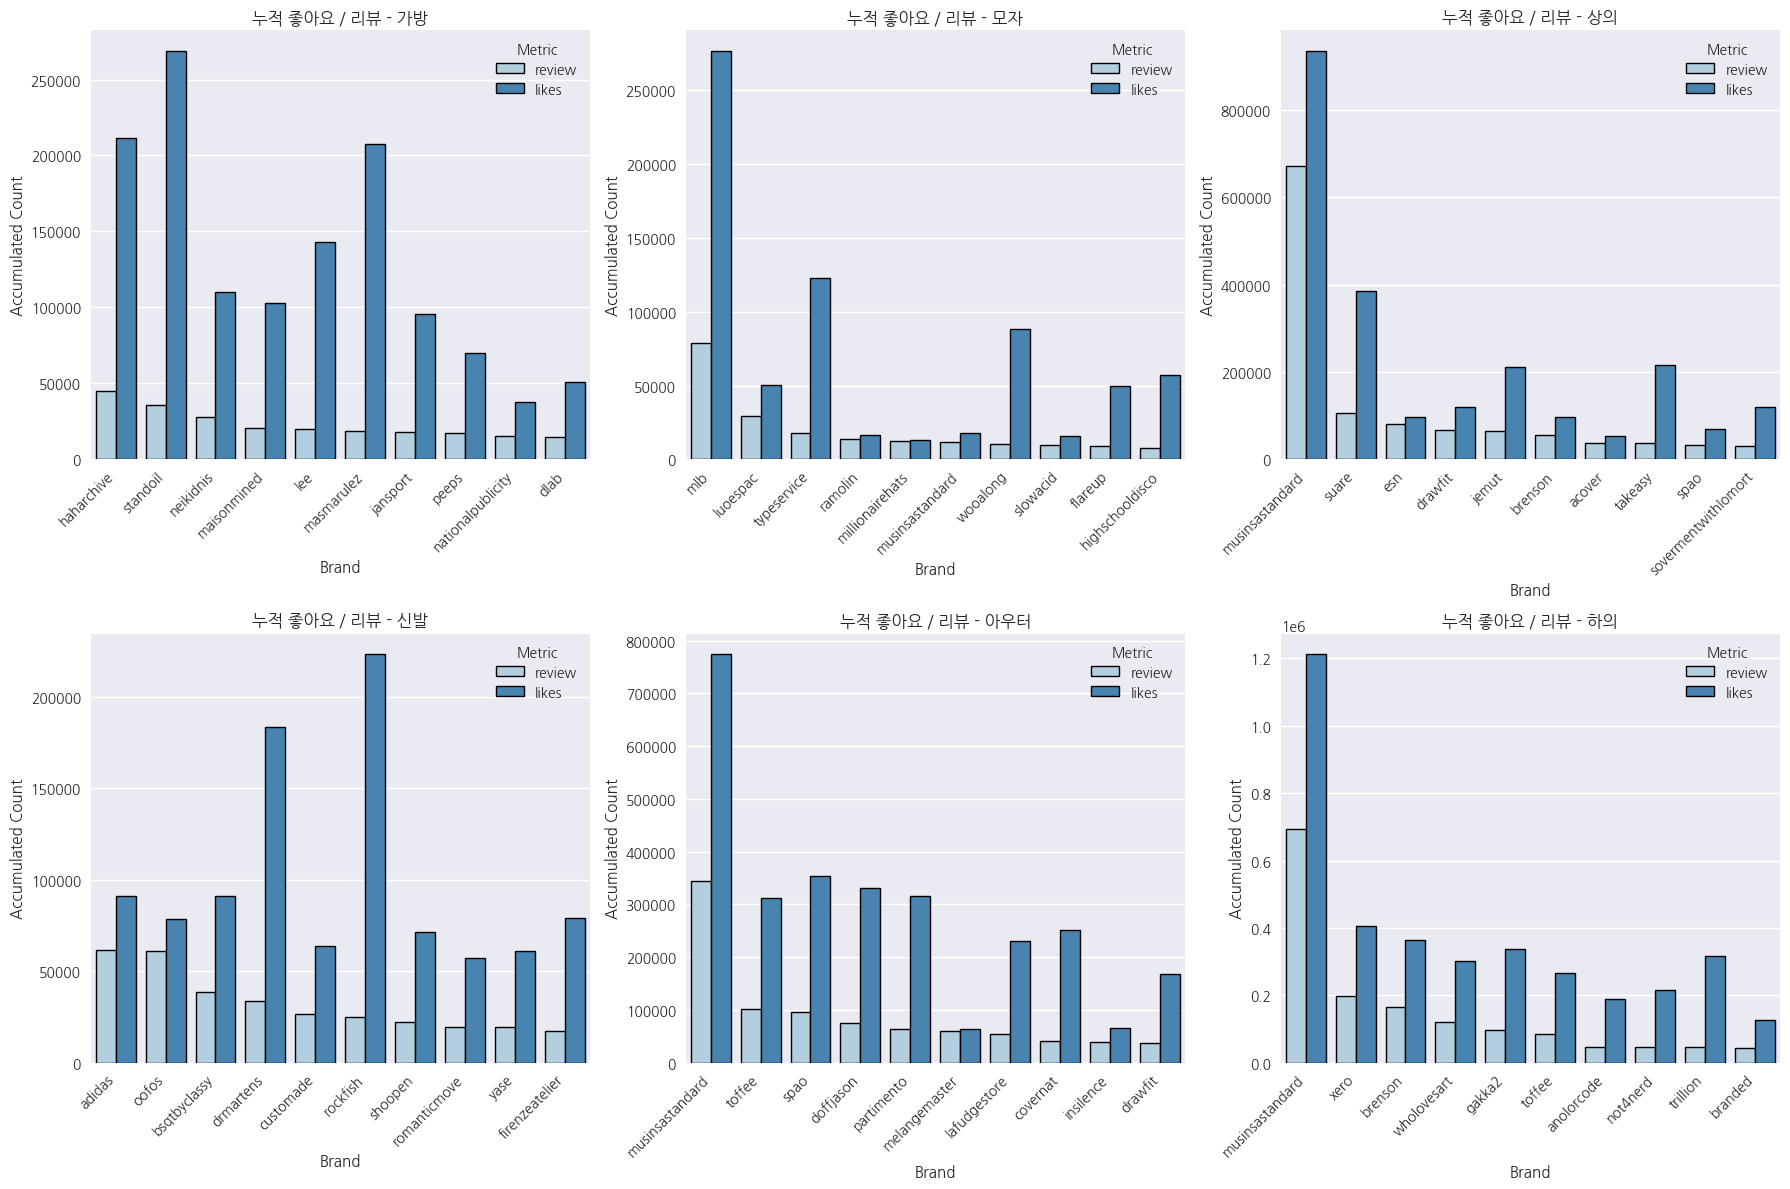

In [21]:
# Calculate accumulated reviews and likes for each category and brand
accumulated_data = df.groupby(['sort', 'brand']).agg({
    'review': 'sum',
    'likes': 'sum'
}).reset_index()

# Select top 10 brands for each category
top_brands_df = accumulated_data.sort_values(['sort', 'review'], ascending=[True, False]).groupby('sort').head(10)

# Melt the data for easier plotting
melted_data = pd.melt(top_brands_df, id_vars=['sort', 'brand'], var_name='metric', value_name='accumulated_count')

# Plotting separate double-bar plots for each category in a 2x3 format
categories = top_brands_df['sort'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, category in enumerate(categories):
    category_data = melted_data[melted_data['sort'] == category]
    color_palette = sns.color_palette("Blues", n_colors=2)
    
    # Determine subplot position
    row = i // 3
    col = i % 3
    
    # Plot in the specified subplot
    sns.barplot(
        x='brand',
        y='accumulated_count',
        hue='metric',
        data=category_data,
        palette=color_palette,
        edgecolor='black',
        linewidth=1,
        ax=axes[row, col]
    )
    
    axes[row, col].set_title(f'누적 좋아요 / 리뷰 - {category}')
    axes[row, col].set_xlabel('Brand')
    axes[row, col].set_ylabel('Accumulated Count')
    axes[row, col].legend(title='Metric', loc='upper right')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

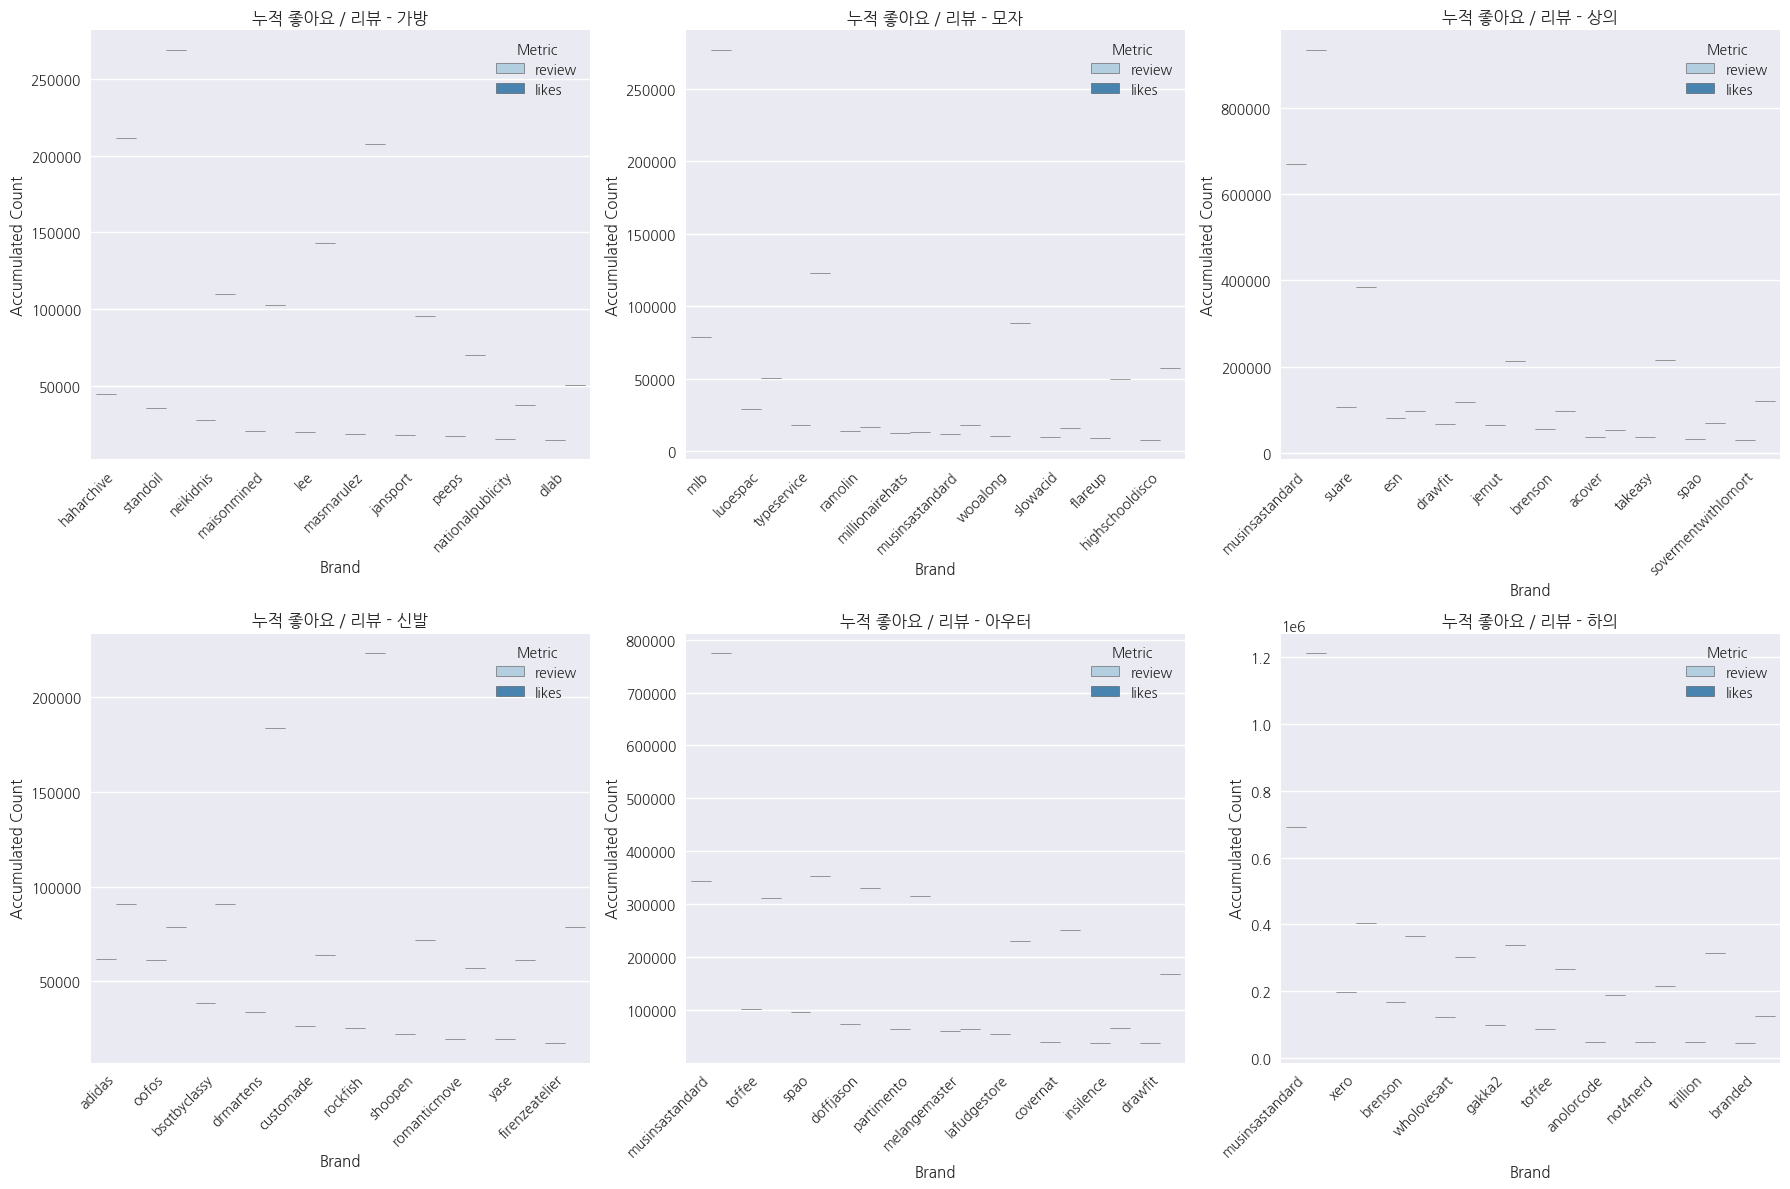

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

accumulated_data = df.groupby(['sort', 'brand']).agg({
    'review': 'sum',
    'likes': 'sum'
}).reset_index()

# Select top 10 brands for each category
top_brands_df = accumulated_data.sort_values(['sort', 'review'], ascending=[True, False]).groupby('sort').head(10)

# Melt the data for easier plotting
melted_data = pd.melt(top_brands_df, id_vars=['sort', 'brand'], var_name='metric', value_name='accumulated_count')

# Plotting separate violin plots for each category in a 2x3 format
categories = top_brands_df['sort'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, category in enumerate(categories):
    category_data = melted_data[melted_data['sort'] == category]
    color_palette = sns.color_palette("Blues", n_colors=2)
    
    # Determine subplot position
    row = i // 3
    col = i % 3
    
    # Plot in the specified subplot
    sns.violinplot(
        x='brand',
        y='accumulated_count',
        hue='metric',
        data=category_data,
        palette=color_palette,
        ax=axes[row, col]
    )
    
    axes[row, col].set_title(f'누적 좋아요 / 리뷰 - {category}')
    axes[row, col].set_xlabel('Brand')
    axes[row, col].set_ylabel('Accumulated Count')
    axes[row, col].legend(title='Metric', loc='upper right')
    
    # Set ticks and labels
    axes[row, col].set_xticks(range(len(category_data['brand'].unique())))
    axes[row, col].set_xticklabels(category_data['brand'].unique(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_62428/3851867339.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')  # Corrected line
/tmp/ipykernel_62428/3851867339.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')  # Corrected line
/tmp/ipykernel_62428/3851867339.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')  # Corrected line
/tmp/ipykernel_62428/3851867339.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

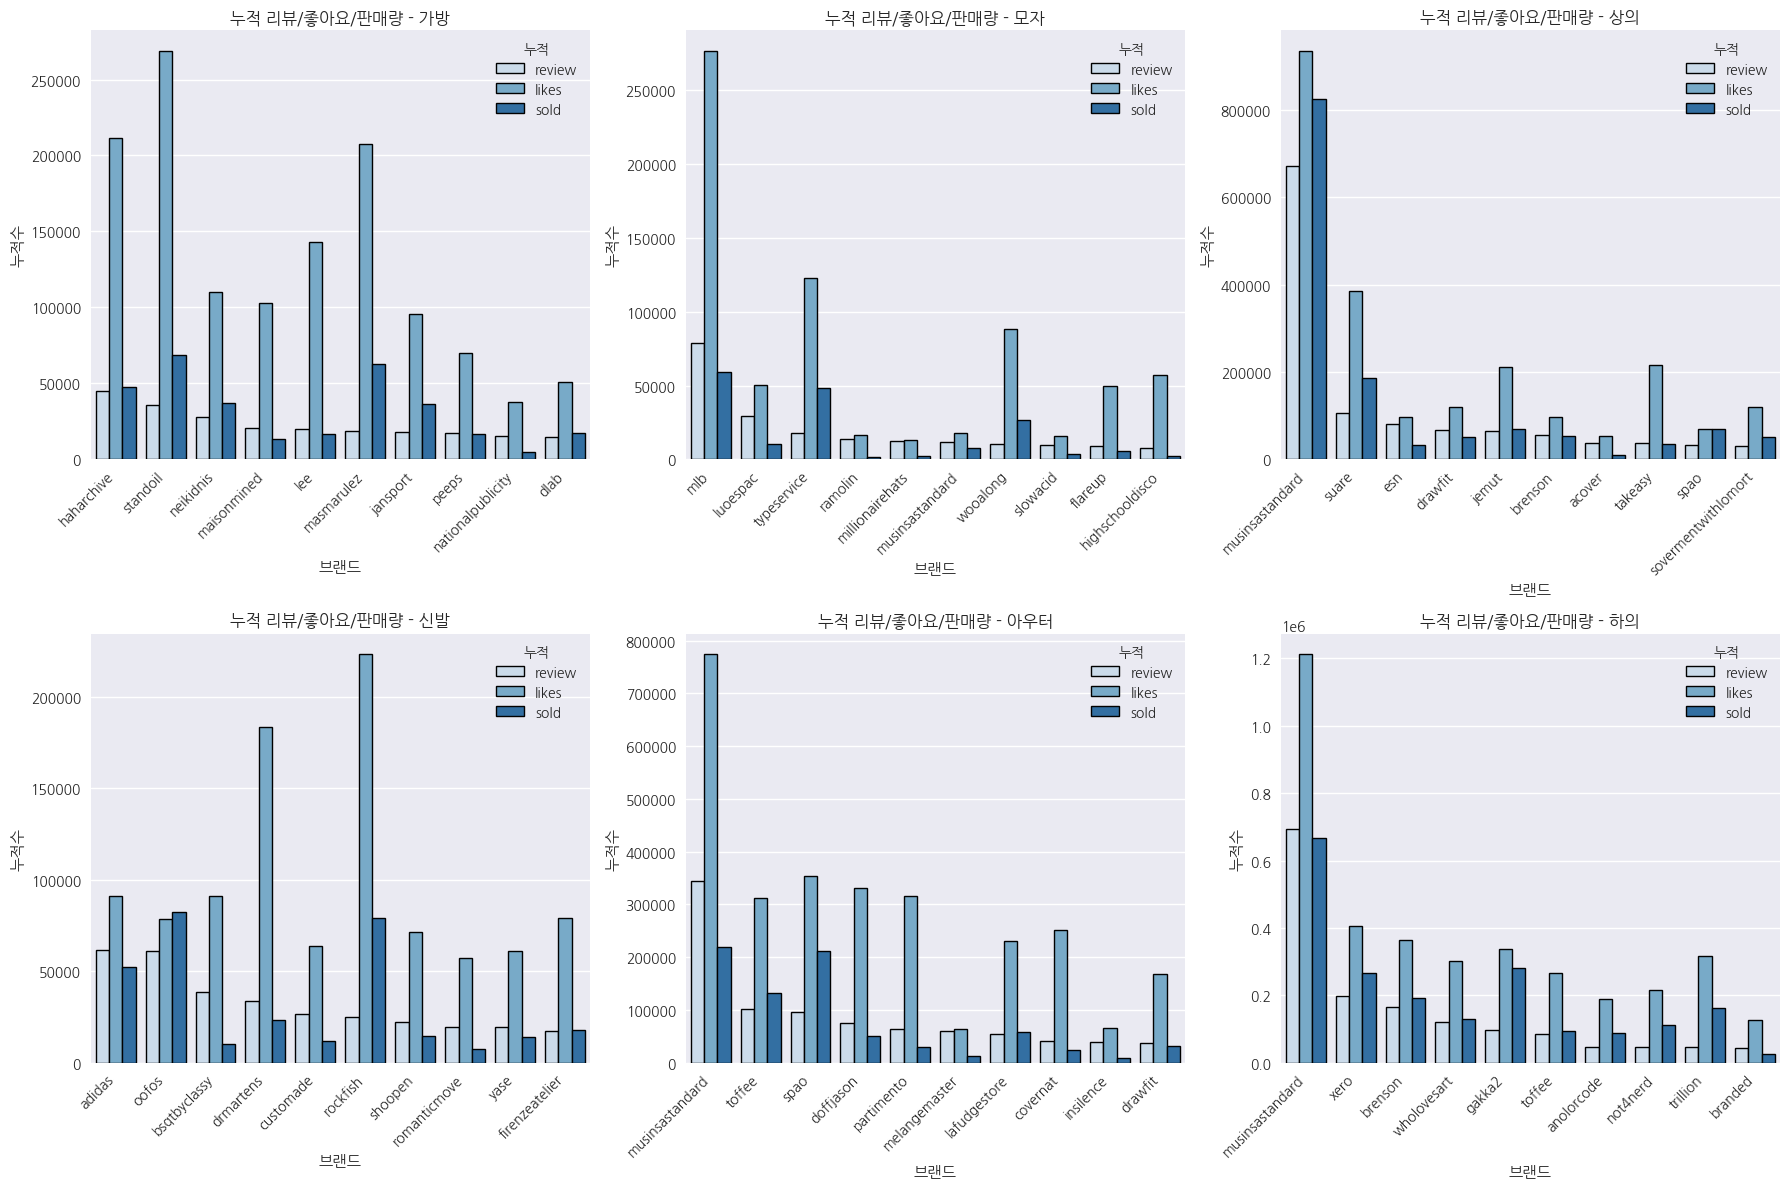

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accumulated reviews, likes, and products sold for each category and brand
accumulated_data = df.groupby(['sort', 'brand']).agg({
    'review': 'sum',
    'likes': 'sum',
    'sold': 'sum'
}).reset_index()

# Select top 10 brands for each category
top_brands_df = accumulated_data.sort_values(['sort', 'review'], ascending=[True, False]).groupby('sort').head(10)

# Melt the data for easier plotting
melted_data = pd.melt(top_brands_df, id_vars=['sort', 'brand'], var_name='metric', value_name='accumulated_count')

# Plotting separate triple-bar plots for each category in a 2x3 format
categories = top_brands_df['sort'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, category in enumerate(categories):
    category_data = melted_data[melted_data['sort'] == category]
    color_palette = sns.color_palette("Blues", n_colors=3)
    
    # Determine subplot position
    row = i // 3
    col = i % 3
    
    # Plot in the specified subplot
    sns.barplot(
        x='brand',
        y='accumulated_count',
        hue='metric',
        data=category_data,
        palette=color_palette,
        edgecolor='black',
        linewidth=1,
        ax=axes[row, col]
    )
    
    axes[row, col].set_title(f'누적 리뷰/좋아요/판매량 - {category}')
    axes[row, col].set_xlabel('브랜드')
    axes[row, col].set_ylabel('누적수')
    axes[row, col].legend(title='누적', loc='upper right')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')  # Corrected line

# Adjust layout
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import plotly.express as px


# Calculate accumulated reviews, likes, and products sold for each category and brand
accumulated_data = df.groupby(['sort', 'brand']).agg({
    'review': 'sum',
    'likes': 'sum',
    'sold': 'sum'
}).reset_index()

# Select top 10 brands for each category
top_brands_df = accumulated_data.sort_values(['sort', 'review'], ascending=[True, False]).groupby('sort').head(10)

# Melt the data for easier plotting
melted_data = pd.melt(top_brands_df, id_vars=['sort', 'brand'], var_name='metric', value_name='accumulated_count')

# Create an interactive bar chart using plotly
fig = px.bar(
    melted_data,
    x='brand',
    y='accumulated_count',
    color='metric',
    barmode='group',
    facet_col='sort',
    labels={'accumulated_count': 'Accumulated Count'},
    title='Accumulated Reviews, Likes, and Products Sold',
    category_orders={'sort': sorted(top_brands_df['sort'].unique())}
)

# Add tooltips to display values
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Customize layout
fig.update_layout(
    xaxis=dict(tickangle=45),
    showlegend=True,
    height=600,
    width=1200
)

# Show the plot
fig.show()


# 구매자 연령대 분석

### 브랜드별 평균 이용 연령대

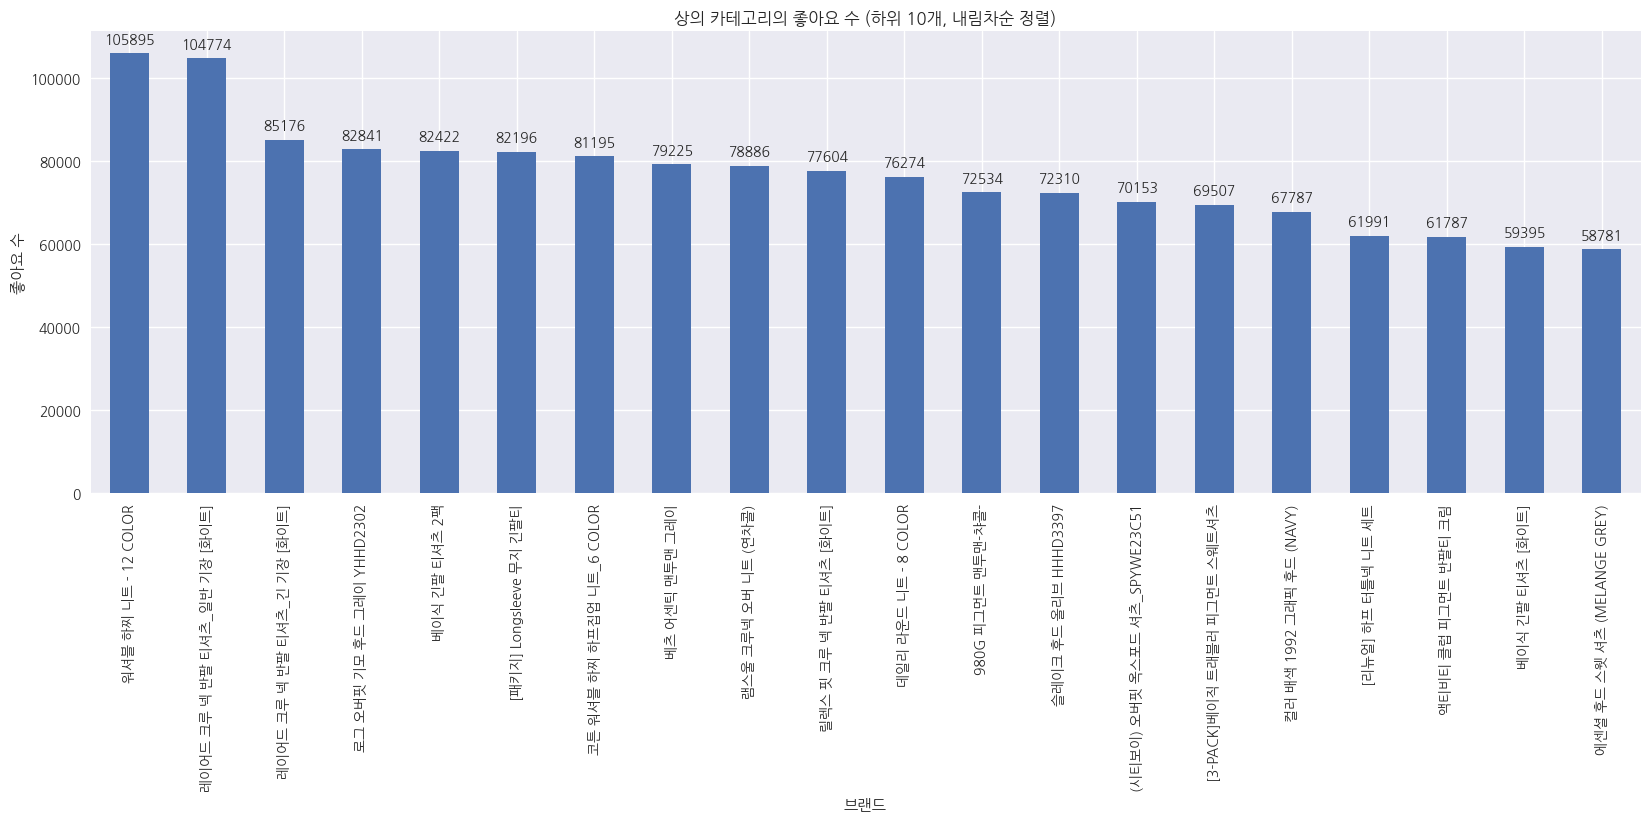

In [25]:
from matplotlib import font_manager, rc
font_path = "/home/addinedu/Downloads/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
df_subset = df[df['sort'] == '상의']
# 좋아요 수를 기준으로 내림차순 정렬
df_sorted = df_subset.sort_values(by='likes', ascending=False).head(20)
# 'brand' 열을 x 값으로 사용하여 그래프 그리기
fig, ax = plt.subplots(figsize=(20, 6))
bar_plot = df_sorted.plot(kind='bar', x='name', y='likes', ax=ax, legend=False)
# 각 막대 위에 숫자 표시
for p in bar_plot.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# 그래프 꾸미기
ax.set_title('상의 카테고리의 좋아요 수 (하위 10개, 내림차순 정렬)')
ax.set_xlabel('브랜드')
ax.set_ylabel('좋아요 수')
# 그래프 표시
plt.show()

In [26]:
df['age'].head(50)

0     19~23,  남성
1              0
2     19~23,  여성
3        18,  여성
4     24~28,  여성
5     19~23,  여성
6     24~28,  여성
7        40,  여성
8              0
9        40,  남성
10    19~23,  남성
11             0
12    24~28,  남성
13    24~28,  여성
14       18,  남성
15       40,  여성
16       40,  여성
17       40,  여성
18    24~28,  여성
19    24~28,  남성
20       40,  여성
21       18,  남성
22    24~28,  남성
23    19~23,  남성
24    24~28,  남성
25    19~23,  여성
26             0
27    34~39,  남성
28    24~28,  여성
29             0
30       40,  여성
31    19~23,  여성
32    24~28,  여성
33       18,  여성
34    29~33,  남성
35    24~28,  여성
36    19~23,  남성
37       18,  여성
38    19~23,  남성
39       18,  남성
40    19~23,  남성
41    19~23,  남성
42    24~28,  남성
43    24~28,  여성
44       40,  남성
45             0
46    19~23,  여성
47    19~23,  여성
48             0
49    19~23,  여성
Name: age, dtype: object

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Bar
from pyecharts import options as opts

# 0 값이 아닌 연령대만 남기기
df_filtered = df[df['age'] != '0']

# 2x3의 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('대분류별 TOP 10 브랜드의 평균 사용 연령대', fontsize=20)

# axes를 1차원 배열로 펼침
axes = axes.flatten()

for i, category in enumerate(brands):
    # 대분류별로 브랜드의 좋아요수 합산
    brand_likes = df[df['sort'] == category].groupby(['brand'])['sold'].sum().reset_index()
    
    # 상위 10개 브랜드 추출
    top_brands_likes = brand_likes.nlargest(10, 'sold')
    
    # 인기 브랜드들의 데이터 가져오기
    popular_brands_data = df_filtered[df_filtered['brand'].isin(top_brands_likes['brand'])]
    
    # 연령대를 숫자로 변환
    popular_brands_data['age'] = popular_brands_data['age'].apply(lambda x: int(x.split('~')[0]) if '~' in x else int(x))
    
    # 평균 사용 연령대 계산
    avg_age_by_brand = popular_brands_data.groupby('brand')['age'].mean().reset_index()
    
    # 시각화
    sns.barplot(x='brand', y='age', data=avg_age_by_brand, palette='Blues', hue='brand', ax=axes[i])
    axes[i].set_title(f'{category} TOP 10 브랜드의 평균 사용 연령대')
    axes[i].set_xlabel('브랜드')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel('평균 사용 연령대')
    axes[i].legend([])

# 나머지 서브플롯은 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])



plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목과 서브플롯 간의 간격 조절
plt.show()


ImportError: cannot import name 'Iterable' from 'collections' (/usr/lib/python3.10/collections/__init__.py)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ranking         5677 non-null   int64 
 1   link            5677 non-null   object
 2   name            5677 non-null   object
 3   brand           5677 non-null   object
 4   sex             5677 non-null   object
 5   sale            5677 non-null   int64 
 6   sort            5677 non-null   object
 7   sort1           5677 non-null   object
 8   likes           5677 non-null   int64 
 9   review          5677 non-null   int64 
 10  price_member    5677 non-null   int64 
 11  price_nomember  5677 non-null   int64 
 12  tag             5677 non-null   object
 13  number          5677 non-null   int64 
 14  sold            5677 non-null   int64 
 15  age             5677 non-null   object
dtypes: int64(8), object(8)
memory usage: 709.8+ KB


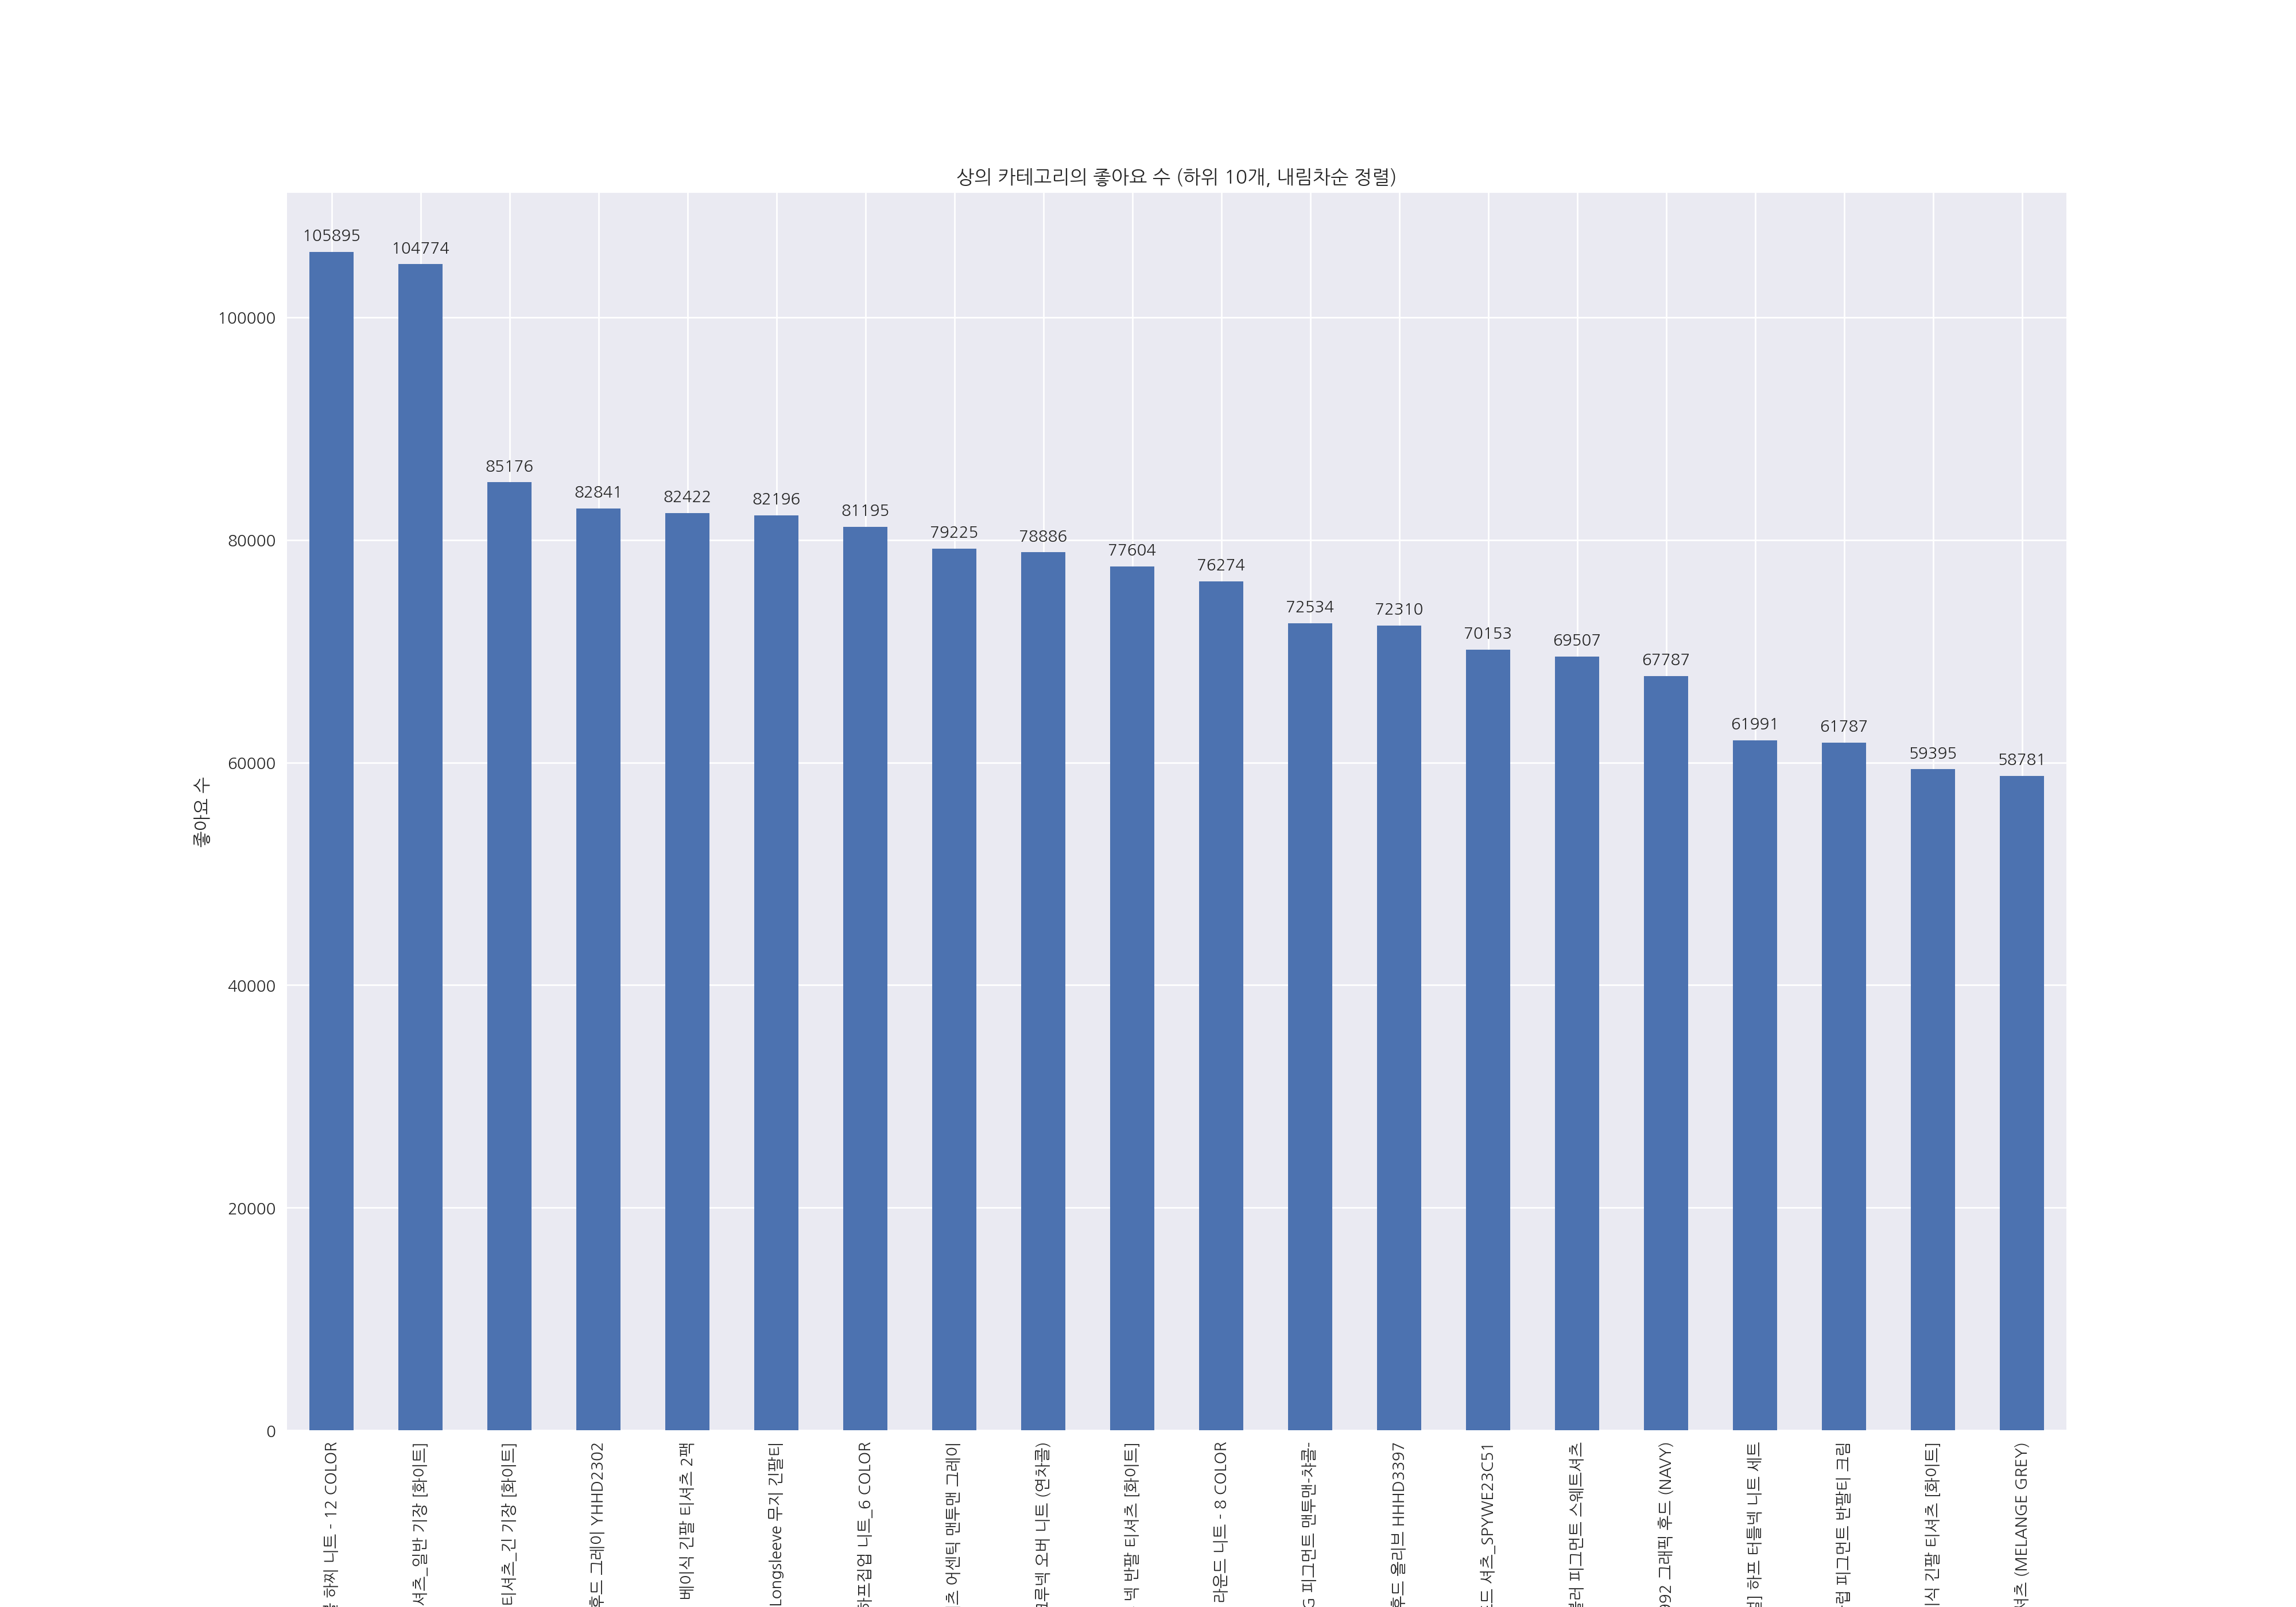

In [ ]:
from matplotlib import font_manager, rc
font_path = "/home/addinedu/Downloads/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
df_subset = df[df['sort'] == '상의']
# 좋아요 수를 기준으로 내림차순 정렬
df_sorted = df_subset.sort_values(by='likes', ascending=False).head(20)
# 'brand' 열을 x 값으로 사용하여 그래프 그리기
fig, ax = plt.subplots(figsize=(20, 14))
bar_plot = df_sorted.plot(kind='bar', x='name', y='likes', ax=ax, legend=False)
# 각 막대 위에 숫자 표시
for p in bar_plot.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# 그래프 꾸미기
ax.set_title('상의 카테고리의 좋아요 수 (하위 10개, 내림차순 정렬)')
ax.set_xlabel('브랜드')
ax.set_ylabel('좋아요 수')
# 그래프 표시
plt.show()